# **Python Data Analysis Project <br> *Churn Project***


# 1. EDA (Exploratory data analysis)

## Load Data

In [637]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

telecom=pd.read_csv('churn.csv')
telecom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [638]:
# Convert all column names to lowercase
telecom = telecom.rename(columns=str.lower)
#Convert churn column to binary
telecom.churn=telecom.churn.map({'Yes':1, 'No':0}).astype('Int64')
telecom.head()

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      multiplelines internetservice onlinesecurity  ... deviceprotection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  techsupport streamingtv streamingmovies        contract paperlessbilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               paymentmethod monthlycharges  totalcharges churn  
0           Electronic check          29.85         29.85     0  
1               Mailed check          56.95        1889.5     0  
2               Mailed check          53.85        108.15     1  
3  Bank transfer (automatic)          42.30       1840.75     0  
4           Electronic check          70.70        151.65     1  

[5 rows x 21 columns]

## Check how many examples and how many features are in the dataset

In [639]:
telecom.drop(['customerid','churn'],axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [640]:
telecom.shape

print(f'''The dataset contains {telecom.shape[0]} entries and {telecom.shape[1]} columns: 
{telecom.shape[1]-1} features 
one label (churn)''')
telecom.shape


The dataset contains 7043 entries and 21 columns: 
20 features 
one label (churn)


(7043, 21)

## 'Churn' distribution

In [641]:
duplicated = telecom.duplicated().sum()
print(duplicated) # There are no duplicate entries in the dataset.

0


In [642]:
categorical=[]
numerical=[]
for col in telecom.columns:
    if telecom[col].dtype==object:
        categorical.append(col)
    else:
        numerical.append(col)

In [643]:
categorical_summary = telecom[categorical].describe()

categorical_summary.loc['Percentage'] = (categorical_summary.loc['freq'] / categorical_summary.loc['count']) * 100
categorical_summary.loc['Percentage'] = categorical_summary.loc['Percentage'].apply(lambda x: f"{x:.2f}%")

categorical_summary.loc[['count', 'unique', 'top', 'Percentage']]

customerid  gender partner dependents phoneservice multiplelines  \
count             7043    7043    7043       7043         7043          7043   
unique            7043       2       2          2            2             3   
top         7590-VHVEG    Male      No         No          Yes            No   
Percentage       0.01%  50.48%  51.70%     70.04%       90.32%        48.13%   

           internetservice onlinesecurity onlinebackup deviceprotection  \
count                 7043           7043         7043             7043   
unique                   3              3            3                3   
top            Fiber optic             No           No               No   
Percentage          43.96%         49.67%       43.84%           43.94%   

           techsupport streamingtv streamingmovies        contract  \
count             7043        7043            7043            7043   
unique               3           3               3               3   
top                 No          No              No  Month-to-month   
Percentage      49.31%      39.90%          39.54%          55.02%   

           paperlessbilling     paymentmethod totalcharges  
count                  7043              7043         7043  
unique                    2                 4         6531  
top                     Yes  Electronic check               
Percentage           59.22%            33.58%        0.16%

*****Categorical Features:*****
* **Gender**: Distribution is nearly even between male and female.
* **Partner** and **Dependents**: 48% have a partner and approximately 30% have dependents.
* **PhoneService**: A majority, over 90%, have phone service.
* **MultipleLines**, **InternetService**, **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV**, and **StreamingMovies** show diverse distributions that suggest varying levels of service engagement among customers.
* **Contract**: Most customers (55%) are on a month-to-month contract.
* **PaperlessBilling**: 59% of the customers use paperless billing.
* **PaymentMethod**: 'Electronic check' is the most common method, used by about 34% of the customers.
* **TotalCharges**: it's seem there is a blank values- should be float!!


In [644]:
numerical_summary=telecom[numerical].describe()
numerical_summary.loc['mean',['seniorcitizen','churn']]=numerical_summary.loc['mean',['seniorcitizen','churn']]*100
numerical_summary.loc[['count','mean','min','max','25%','50%','75%']]

seniorcitizen       tenure  monthlycharges      churn
count    7043.000000  7043.000000     7043.000000     7043.0
mean       16.214681    32.371149       64.761692  26.536987
min         0.000000     0.000000       18.250000        0.0
max         1.000000    72.000000      118.750000        1.0
25%         0.000000     9.000000       35.500000        0.0
50%         0.000000    29.000000       70.350000        0.0
75%         0.000000    55.000000       89.850000        1.0


*****Numerical Features:*****
* **SeniorCitizen**: About 16% of the customers are senior citizens.
* **Tenure**: Ranges from 0 to 72 months, with an average of about 32 months.
* **MonthlyCharges**: Vary between $18.25 and $118.75, with a mean of approximately $64.76.
* **Churn**: About 27% of the customers have churned.



*****Categorical Features  -  Uniqe values:*****

In [645]:
telecom_dropped = telecom.drop(columns=['customerid','seniorcitizen', 'tenure', 'monthlycharges', 'churn'], errors='ignore')

unique_values_list = []

for col in telecom_dropped.columns:
    unique_values = telecom_dropped[col].unique()
    unique_values_list.append({'Column': col, 'Unique Values': np.array_str(unique_values)})

unique_values_df = pd.DataFrame(unique_values_list)
unique_values_df

Column                                      Unique Values
0             gender                                  ['Female' 'Male']
1            partner                                       ['Yes' 'No']
2         dependents                                       ['No' 'Yes']
3       phoneservice                                       ['No' 'Yes']
4      multiplelines                    ['No phone service' 'No' 'Yes']
5    internetservice                         ['DSL' 'Fiber optic' 'No']
6     onlinesecurity                 ['No' 'Yes' 'No internet service']
7       onlinebackup                 ['Yes' 'No' 'No internet service']
8   deviceprotection                 ['No' 'Yes' 'No internet service']
9        techsupport                 ['No' 'Yes' 'No internet service']
10       streamingtv                 ['No' 'Yes' 'No internet service']
11   streamingmovies                 ['No' 'Yes' 'No internet service']
12          contract           ['Month-to-month' 'One year' 'Two year']
13  paperlessbilling                                       ['Yes' 'No']
14     paymentmethod  ['Electronic check' 'Mailed check' 'Bank trans...
15      totalcharges  ['29.85' '1889.5' '108.15' ... '346.45' '306.6...

* Categorical Features-Uniqe values

 <table>
    <tr><th> customerid </th><td> string identifying each customer </td></tr>
    <tr><th> gender </th><td> 'Male' / 'Female' </td></tr>
    <tr><th> partner </th><td> 'Yes' / 'No' </td></tr>
    <tr><th> dependents </th><td> 'Yes' / 'No' </td></tr>
    <tr><th> paperlessbilling </th><td> 'Yes' / 'No' <br></td></tr>
    <tr><th> phoneservice </th><td> 'Yes' / 'No' </td></tr>
    <tr><th> multiplelines </th><td> 'Yes' / 'No' / 'No phone service' </td></tr>
    <tr><th> internetservice </th><td> 'DSL' / 'Fiber optic' / 'No' </td></tr>   
    <tr><th> onlinesecurity </th><td> 'No' / 'Yes' / 'No internet service' <br></td></tr>
    <tr><th> onlinebackup </th><td> 'No' / 'Yes' / 'No internet service' <br></td></tr>
    <tr><th> deviceprotection </th><td> 'No' / 'Yes' / 'No internet service' <br></td></tr>
    <tr><th> techsupport </th><td> 'No' / 'Yes' / 'No internet service' <br></td></tr>
    <tr><th> streamingtv </th><td> 'No' / 'Yes' / 'No internet service' <br></td></tr> 
    <tr><th> streamingmovies </th><td> 'No' / 'Yes' / 'No internet service' <br></td></tr> 
    <tr><th> contract </th><td> 'Month-to-month' / 'One year' / 'Two year' <br></td></tr>
    <tr><th> paymentmethod </th><td> 'Electronic check' / 'Mailed check' / 'Bank transfer (automatic)' / 'Credit card (automatic)' <br></td></tr>
    <tr><th> totalcharges </th><td> Object (should be a float; possible data handling needed)(amount charged monthly) </td></tr>    
</table>


### Percentage of Churn in the given Data

We have 7043 customers but only 1869 of them churn!! 26.5% 


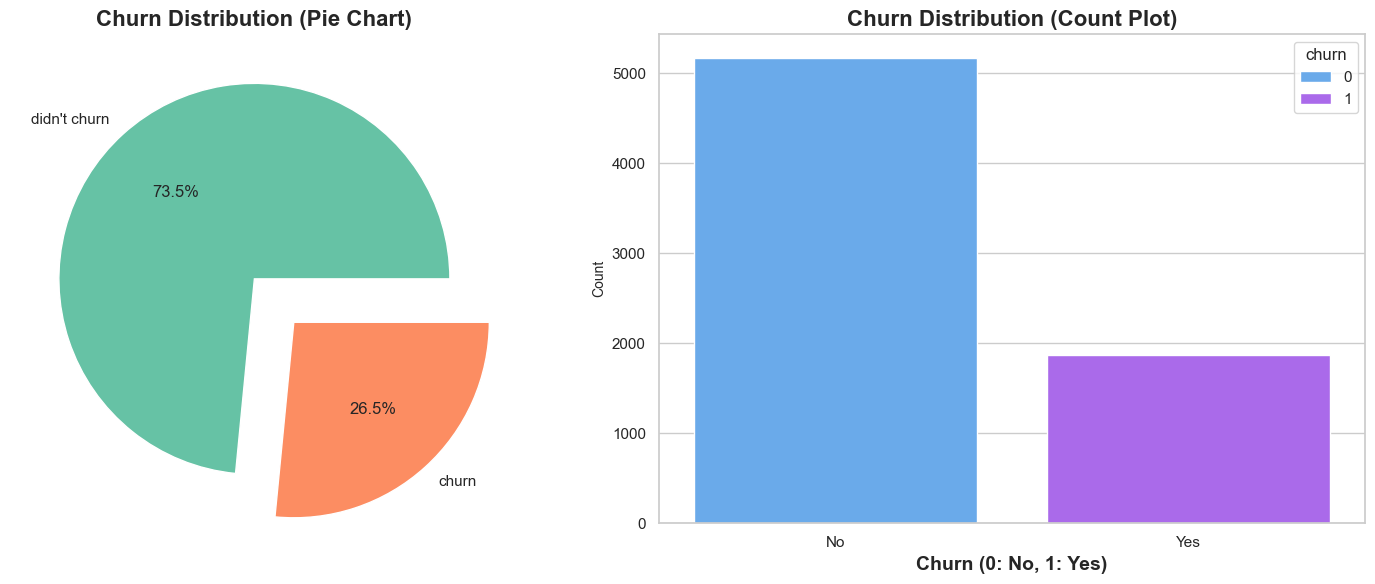

churn
0    5174
1    1869
Name: count, dtype: Int64

In [646]:
churn_dist = telecom.churn.value_counts(normalize=True)
churn_dist.index = ["didn't churn", 'churn']

print(f"We have {len(telecom)} customers but only {telecom.churn.sum()} of them churn!! {((telecom.churn.sum()/len(telecom))*100):.1f}% ")

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].pie(churn_dist, labels=churn_dist.index, autopct='%1.1f%%', explode=[0, 0.3], colors=['#66c2a5', '#fc8d62'])
axs[0].set_title('Churn Distribution (Pie Chart)',fontsize=16, fontweight='bold')
axs[0].set_ylabel('')


sns.countplot(x='churn', data=telecom, palette='cool', ax=axs[1], hue='churn')
axs[1].set_title("Churn Distribution (Count Plot)",fontsize=16, fontweight='bold')
axs[1].set_xlabel("Churn (0: No, 1: Yes)",fontsize=14, fontweight='bold')
axs[1].set_ylabel("Count", fontsize=10)
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['No', 'Yes'])


plt.tight_layout()
plt.show()
telecom.churn.value_counts()

## Missing values

In [647]:
def missing_values(data):
    df = pd.DataFrame(columns=['Variable', 'Unique values', 'Nan %', 'Zeros %', 'Empty %'])

    for col in data.columns:
        unique_values = data[col].nunique()
        nans = round(data[col].isnull().sum() / data.shape[0] * 100, 1)
        zeros = round((data[col] == 0).sum() / data.shape[0] * 100, 1)
        empty = round((data[col] == " ").sum() / data.shape[0] * 100, 1)  

        df.loc[len(df)] = [col, unique_values, nans, zeros, empty]  

    df = df.sort_values('Empty %', ascending=False)
    return df


result = missing_values(telecom)
result

Variable  Unique values  Nan %  Zeros %  Empty %
19      totalcharges           6531    0.0      0.0      0.2
0         customerid           7043    0.0      0.0      0.0
11  deviceprotection              3    0.0      0.0      0.0
18    monthlycharges           1585    0.0      0.0      0.0
17     paymentmethod              4    0.0      0.0      0.0
16  paperlessbilling              2    0.0      0.0      0.0
15          contract              3    0.0      0.0      0.0
14   streamingmovies              3    0.0      0.0      0.0
13       streamingtv              3    0.0      0.0      0.0
12       techsupport              3    0.0      0.0      0.0
10      onlinebackup              3    0.0      0.0      0.0
1             gender              2    0.0      0.0      0.0
9     onlinesecurity              3    0.0      0.0      0.0
8    internetservice              3    0.0      0.0      0.0
7      multiplelines              3    0.0      0.0      0.0
6       phoneservice              2    0.0      0.0      0.0
5             tenure             73    0.0      0.2      0.0
4         dependents              2    0.0      0.0      0.0
3            partner              2    0.0      0.0      0.0
2      seniorcitizen              2    0.0     83.8      0.0
20             churn              2    0.0     73.5      0.0

In [648]:
telecom.totalcharges.value_counts()

totalcharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

We'll handle the 'Empty' in TotalCharges

### 'TotalCharges' column is of object type- let's change it to float
* There are 11 entries in the TotalCharges column that couldn't be converted to numeric values
* These issues occur for customers with a tenure = 0 and churn=0, assuming they represent new customers who have not yet been invoiced
* Total charges calculate by tenure*monthlycharges, so we handle these missing values by the same calculation

In [649]:
telecom.loc[telecom.totalcharges==' ',['churn','tenure','monthlycharges','totalcharges']]

churn  tenure  monthlycharges totalcharges
488       0       0           52.55             
753       0       0           20.25             
936       0       0           80.85             
1082      0       0           25.75             
1340      0       0           56.05             
3331      0       0           19.85             
3826      0       0           25.35             
4380      0       0           20.00             
5218      0       0           19.70             
6670      0       0           73.35             
6754      0       0           61.90

In [650]:
#telecom.totalcharges.astype(float)  # ValueError: could not convert string to float: ' ' 
telecom.loc[telecom.totalcharges==' ','totalcharges']=None 
telecom.totalcharges=telecom.totalcharges.astype(float)
telecom.totalcharges.value_counts() #  11 missing values in 'totalcharges'
telecom.loc[telecom.totalcharges.isnull(),'totalcharges']

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: totalcharges, dtype: float64

In [651]:
#telecom.totalcharges.astype(float)  # ValueError: could not convert string to float: ' ' 
telecom.loc[telecom.totalcharges==' ','totalcharges']=None 
telecom.totalcharges=telecom.totalcharges.astype(float)
telecom.totalcharges.value_counts() #  11 missing values in 'totalcharges'
telecom.loc[telecom.totalcharges.isnull(),'totalcharges']=(telecom.loc[telecom.totalcharges.isnull(),'tenure'])*(telecom.loc[telecom.totalcharges.isnull(),'monthlycharges'] )    


In [652]:
telecom.loc[telecom.totalcharges.isnull(),'totalcharges']=(telecom.loc[telecom.totalcharges.isnull(),'tenure'])*(telecom.loc[telecom.totalcharges.isnull(),'monthlycharges'] )    
telecom.loc[telecom.totalcharges==0,'totalcharges']
telecom.totalcharges.value_counts()

totalcharges
0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6531, dtype: int64

## Categorical Features - Bar Charts

**Shows how churned customers compare to the total number of customers within each category.**<br>
**Helps identify which categories have higher or lower churn rates relative to their size.**

Provide both the distribution of all customers and the churn rate within each category of a feature. They are useful for comparing how each category contributes to churn relative to its size in the overall customer base.

In [653]:
#### Functions

# Function to Calculate Distribution and Churn Rate 
# This function calculates the distribution and churn rate for each category within each feature.
# The results are stored in a DataFrame with columns 'Feature', 'Category', 'Distribution', and 'Churn Rate'.

def cal_dist_Churn_Rate(features,df):
    data = {
        'Feature': [],
        'Category': [],
        'Distribution': [],
        'Churn Rate': []
    }

    for feature in features:
        categories = df[feature].unique()
        for category in categories:
            data['Feature'].append(feature)
            data['Category'].append(category)
            distribution = (df[df[feature] == category].shape[0] / df.shape[0]) * 100
            churn_rate = (df[(df[feature] == category) & (df['churn'] == 1)].shape[0] / df[df[feature] == category].shape[0]) * 100
            data['Distribution'].append(distribution)
            data['Churn Rate'].append(churn_rate)

    return pd.DataFrame(data)


# Function to Create Bar Chart of Distribution and Churn Rate with plt.text()
# Takes a list of features and the DataFrame output from cal_dist_Churn_Rate as input.


def bar_chart_dist_rate(features,df):
    rows = int(np.ceil(len(features) / 2)) # round up the number of rows - we create a subplots when each row have 2 columns

    fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows), squeeze=False)  
    axes = axes.flatten()   # Convert the axes array to a 1D array for easy iteration


    for idx, feature in enumerate(features):
        ax = axes[idx]
        feature_data = df[df['Feature'] == feature]
        bar_width = 0.35
        index = np.arange(len(feature_data['Category']))

        bars1 = ax.bar(index, feature_data['Distribution'], bar_width, label='Distribution (%)', color='skyblue')
        bars2 = ax.bar(index + bar_width, feature_data['Churn Rate'], bar_width, label='Churn Rate (%)', color='salmon')

        for bars in [bars1, bars2]:
            for bar in bars:
                yval = bar.get_height()
                ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12)

        ax.set_xlabel('Category', fontsize=14)
        ax.set_ylabel('Percentage', fontsize=14)
        ax.set_title(f'Distribution and Churn Rate by {feature}', fontsize=16, fontweight='bold')  # Bold title
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(feature_data['Category'], fontsize=12)
        ax.legend()

        plt.xticks(rotation=45)

    if len(features) % 2 != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()


# The HighestChurn_2_combination function aims to identify the combination of two categorical features in a dataset 
# that results in the highest customer churn rate. 
# The function iterates over a given list of features and evaluates their combinations with a specified primary feature, 
# then finds and returns the combination with the highest churn rate.

def HighestChurn_2_combination(df, features,F1):
    data ={'Feature1': [],'Category1': [],'Feature2': [],'Category2': [],'Distribution': [],'Churn Rate': []}
    for col in features:
        if col!=F1:
            Churn_Rate=(df.groupby([col,F1],as_index=False,observed=True).churn.mean()).sort_values(by='churn',ascending=False).head(1)
            Churn_Rate.churn=Churn_Rate.churn*100
            Distribution=(df[(df[col]==Churn_Rate.iloc[0,0])&(df[F1]==(Churn_Rate.iloc[0,1]))].shape[0]/df.shape[0])*100
            data['Feature1'].append(Churn_Rate.columns[1])
            data['Category1'].append(Churn_Rate.iloc[0,1])
            data['Feature2'].append(Churn_Rate.columns[0])
            data['Category2'].append(Churn_Rate.iloc[0,0])
            data['Churn Rate'].append(Churn_Rate.iloc[0,2])
            data['Distribution'].append(Distribution)
        continue
    summary=pd.DataFrame(data).sort_values(by='Churn Rate',ascending=False).head(1)   
    return summary


Feature          Category  Distribution  Churn Rate
0      paymentmethod  Electronic check     33.579441   45.285412
1           contract    Month-to-month     55.019168   42.709677
2    internetservice       Fiber optic     43.958540   41.892765
3     onlinesecurity                No     49.666335   41.766724
4      seniorcitizen                 1     16.214681   41.681261
5        techsupport                No     49.311373   41.635474
6       onlinebackup                No     43.844952   39.928756
7   deviceprotection                No     43.944342   39.127625
8    streamingmovies                No     39.542808   33.680431
9   paperlessbilling               Yes     59.221922   33.565092
10       streamingtv                No     39.897771   33.523132
11           partner                No     51.696720   32.957979
12        dependents                No     70.041176   31.279140
13     multiplelines               Yes     42.183729   28.609896
14            gender            Female     49.524350   26.920872
15      phoneservice               Yes     90.316626   26.709637

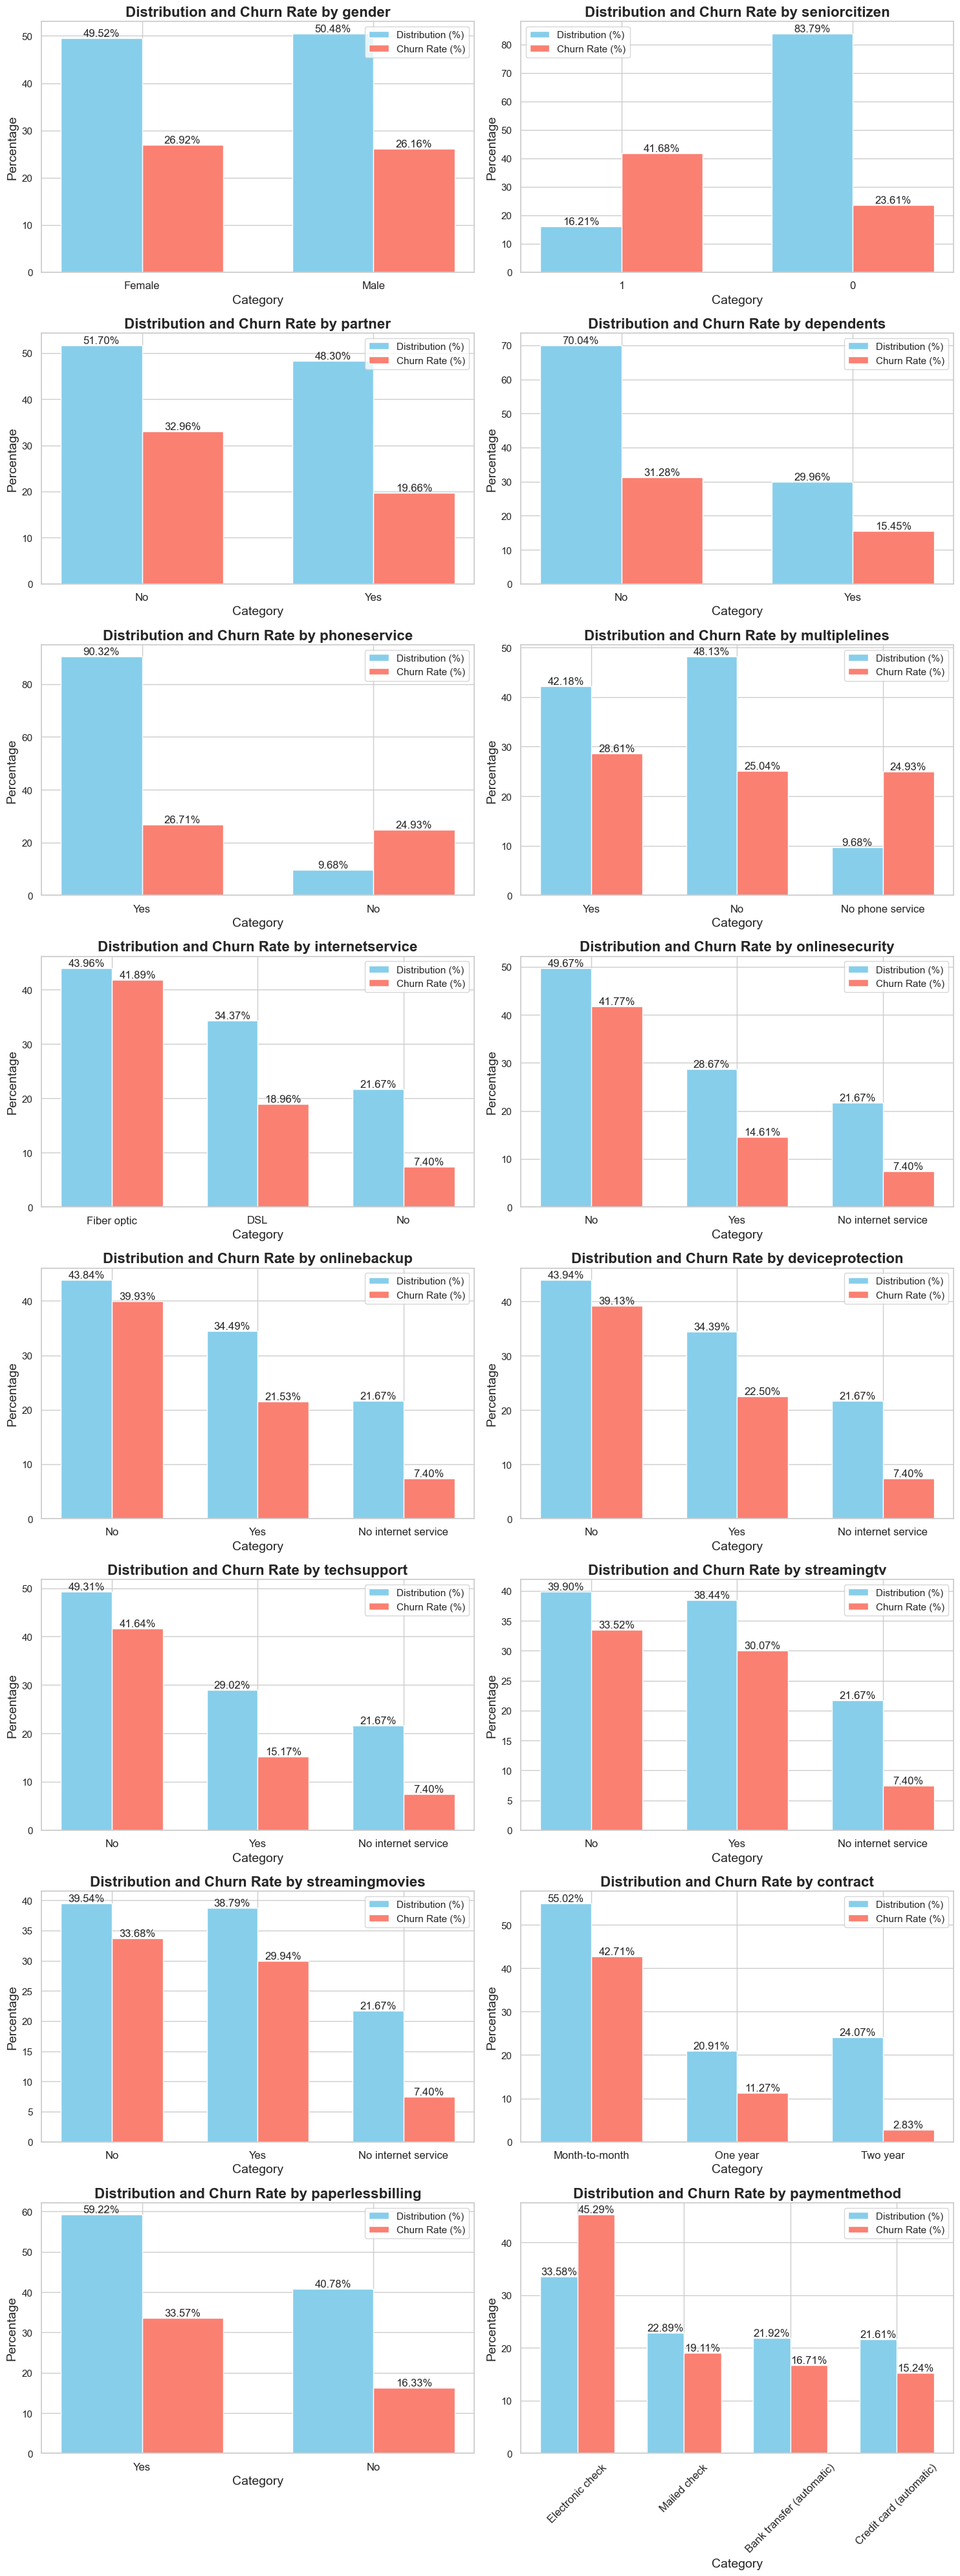

In [654]:

features = ['gender', 'seniorcitizen', 'partner', 'dependents',
            'phoneservice', 'multiplelines', 'internetservice',
            'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
            'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
            'paymentmethod']

# Using cal_dist_Churn_Rate to calculate distrabutions and churn rate for all features
# df sort all the features by=['Feature','Churn Rate'] in decending 
df = (cal_dist_Churn_Rate(features,telecom).reset_index()).drop(columns='index',axis=1).sort_values(by=['Feature','Churn Rate'],ascending=[False,False]) 

#  Function to Create Bar Chart of Distribution and Churn Rate- Takes a list of features and the DataFrame output from cal_dist_Churn_Rate as input
bar_chart_dist_rate(features,df)

data=pd.DataFrame({'Feature': [],'Category': [],'Distribution': [], 'Churn Rate': []})

# creating dataFrame 'data' that take for each feature the highest churn rate
for col in features:
    x=df[df.Feature==col].head(1).reset_index().drop('index',axis=1)
    data=pd.concat([data,x],ignore_index=True)

# top_features - sorting 'data' in decending order
top_features=data.sort_values('Churn Rate',ascending=False).reset_index().drop(columns='index',axis=1)

top_features

1. **Payment Method:** Customers who pay via electronic check have a much higher churn rate than those using other methods.
2. **Contract:** Month-to-month contracts have the highest churn rate. <br> two-year contracts have significantly lower churn rates (2.83%)
3. **Internet Service:** Customers with fiber optic internet service show a significantly higher churn rate compared to those with DSL or no internet, suggesting dissatisfaction or cost issues with the fiber optic service.
4. **Online Security, Online Backup,Tech Support, deviceprotection, streamingmovies and streamingtv:** Customers without these services have markedly higher churn rates, indicating that security and support features may be key factors in customer retention.
5. **Senior Citizens:** Senior citizens have a higher churn rate compared to non-senior citizens
6. **Paperless Billing:** Customers using paperless billing are more prone to churn.
7. **Partner and Dependents:** Customers without partners or dependents have higher churn rates, possibly indicating that individuals without family ties are less likely to remain with the service.
8. **Multiple Lines:** Customers with multiple lines (single line users) tend to churn more compared to those without multiple lines or no phone service.
9. **Phone Service:** Churn rate is slightly higher among customers with phone service, although the difference is not substantial.



Combinations

In [655]:

features = ['gender', 'seniorcitizen', 'partner', 'dependents', 
            'phoneservice', 'multiplelines', 'internetservice', 
            'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 
            'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 
            'paymentmethod']

Top = pd.DataFrame({'Feature1': [], 'Category1': [], 'Feature2': [], 'Category2': [], 'Distribution': [], 'Churn Rate': []})
for feature in features:
# Unsing HighestChurn_2_combination function - calculate distrabutions and churn rate with 2 combinations     
    TopComb = HighestChurn_2_combination(telecom, features, feature) 
    Top = pd.concat([Top, TopComb], ignore_index=True)


Top_comb = Top[~Top['Churn Rate'].duplicated()].sort_values('Churn Rate', ascending=False)

Top_comb.reset_index(drop=True, inplace=True)

Top_comb.sort_values(by=['Category2', 'Churn Rate'], ascending=[False, False], inplace=True)

Top_comb

Feature1    Category1       Feature2         Category2  \
0      seniorcitizen            1       contract    Month-to-month   
1    internetservice  Fiber optic       contract    Month-to-month   
7        streamingtv          Yes       contract    Month-to-month   
8    streamingmovies          Yes       contract    Month-to-month   
10     multiplelines          Yes       contract    Month-to-month   
2       onlinebackup           No  paymentmethod  Electronic check   
3        techsupport           No  paymentmethod  Electronic check   
4     onlinesecurity           No  paymentmethod  Electronic check   
5   deviceprotection           No  paymentmethod  Electronic check   
6            partner           No  paymentmethod  Electronic check   
9   paperlessbilling          Yes  paymentmethod  Electronic check   
11        dependents           No  paymentmethod  Electronic check   
12            gender         Male  paymentmethod  Electronic check   
13      phoneservice          Yes  paymentmethod  Electronic check   

    Distribution  Churn Rate  
0      11.458185   54.646840  
1      30.214397   54.605263  
7      18.429646   50.616333  
8      18.514837   50.306748  
10     21.042170   48.717949  
2      20.275451   53.921569  
3      24.563396   53.179191  
4      24.620190   53.171857  
5      20.374840   52.055749  
6      19.338350   50.807636  
9      24.733778   49.770379  
11     26.778361   48.621421  
12     16.967201   45.941423  
13     30.370581   45.582048

1. **Contract Type & Payment Method:**<br>
Customers with month-to-month contracts and those paying via electronic check are more likely to churn.
The combination of both factors further increases churn rates.
2. **Senior Citizens & Internet Service:**<br>
Senior citizens, especially those using fiber optic internet, tend to churn more, likely due to higher costs.
3. **Add-On Services:**<br>
Lack of additional services (online security, tech support, etc.) correlates with higher churn rates.

In [656]:
telecom.groupby(['seniorcitizen','contract']).agg({'churn':['sum','count','mean']})


churn                
                               sum count      mean
seniorcitizen contract                            
0             Month-to-month  1214  3068  0.395698
              One year         137  1283  0.106781
              Two year          42  1550  0.027097
1             Month-to-month   441   807  0.546468
              One year          29   190  0.152632
              Two year           6   145  0.041379

seniorcitizen_contract     churn
3      senior_Month-to-month  0.546468
0  Not_senior_Month-to-month  0.395698
1                   One year  0.112695
2                   Two year  0.028319

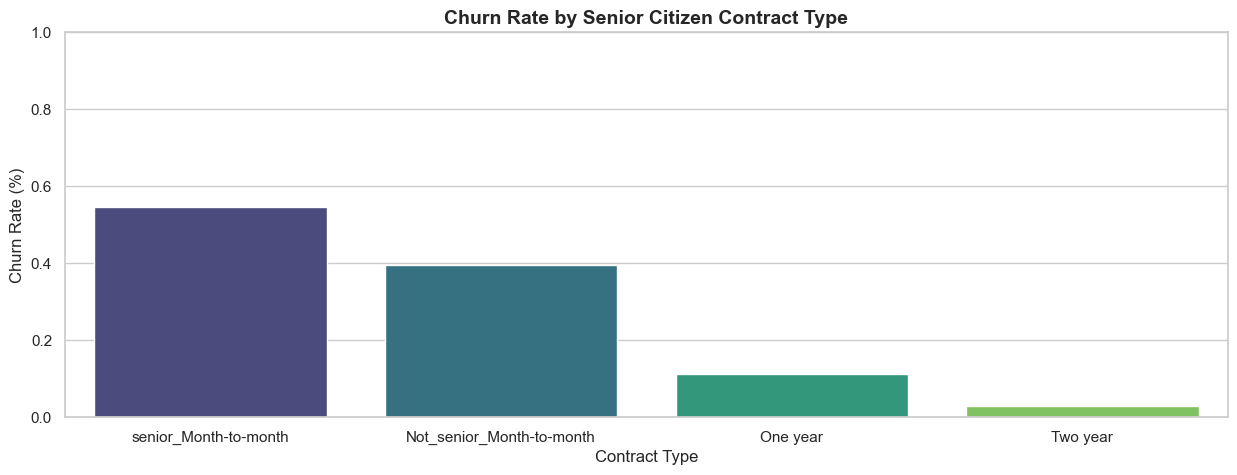

In [657]:
telecom['seniorcitizen_contract']='One year'
telecom.loc[(telecom.seniorcitizen==1)&(telecom.contract=='Month-to-month'),'seniorcitizen_contract']='senior_Month-to-month'
telecom.loc[(telecom.seniorcitizen==0)&(telecom.contract=='Month-to-month'),'seniorcitizen_contract']='Not_senior_Month-to-month'
telecom.loc[(telecom.contract=='One year'),'seniorcitizen_contract']='One year'
telecom.loc[(telecom.contract=='Two year'),'seniorcitizen_contract']='Two year'

seniorcitizen_contract=telecom.groupby('seniorcitizen_contract').churn.mean().reset_index().sort_values(by='churn' ,ascending=False)
seniorcitizen_contract
plt.figure(figsize=(15, 5))
barplot = sns.barplot(data=seniorcitizen_contract, x='seniorcitizen_contract', y='churn', palette='viridis',hue='seniorcitizen_contract')
plt.title('Churn Rate by Senior Citizen Contract Type', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.ylim(0, 1)  # Assuming churn rate is a proportion
seniorcitizen_contract

* Customers with longer contracts (one year and two years) tend to churn less compared to those with month-to-month contracts.
* Senior citizens with month-to-month contracts are the most likely to churn, suggesting that this group might benefit from targeted retention strategies.
* Non-senior citizens with month-to-month contracts also have a high churn rate, indicating a possible need for engagement or retention initiatives for this segment as well.

seniorcitizen       tenure  monthlycharges  totalcharges     churn
count    1850.000000  1850.000000     1850.000000   1850.000000    1850.0
mean        0.277297    17.971351       74.989486   1471.328541  0.537297
std         0.447786    17.749008       22.707583   1654.219374  0.498742
min         0.000000     1.000000       18.850000     18.850000       0.0
25%         0.000000     3.000000       60.075000    198.125000       0.0
50%         0.000000    12.000000       79.725000    810.450000       1.0
75%         1.000000    29.000000       91.837500   2208.562500       1.0
max         1.000000    72.000000      117.450000   7713.550000       1.0

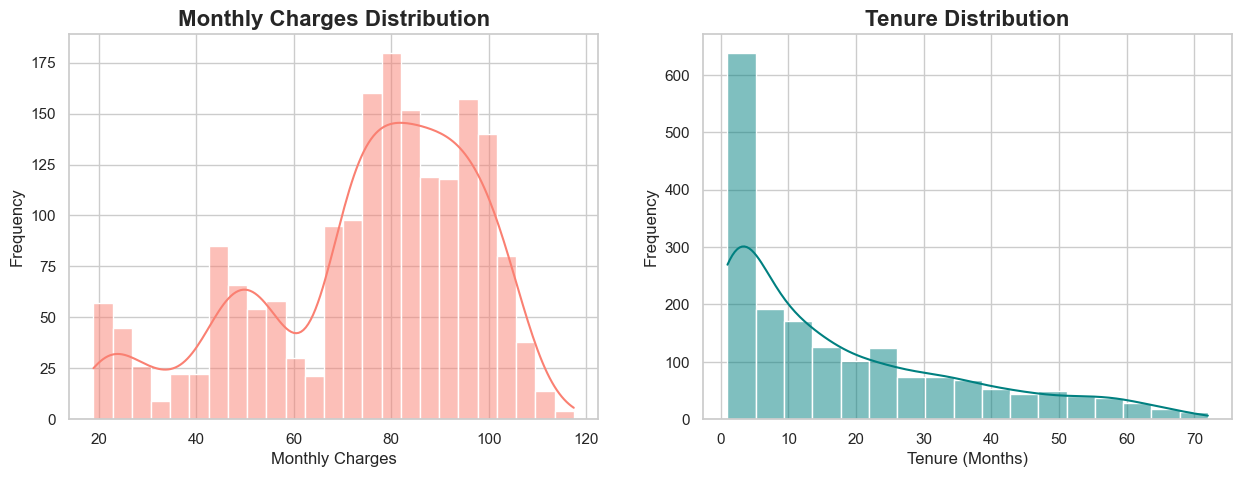

In [658]:
electronic_check_month_to_month=telecom[(telecom.contract=='Month-to-month') & (telecom.paymentmethod=='Electronic check')]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.histplot(electronic_check_month_to_month['monthlycharges'], kde=True, color='salmon',bins=25)
plt.title('Monthly Charges Distribution',fontsize=16, fontweight='bold')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

plt.subplot(1,2,2)

sns.histplot(electronic_check_month_to_month.tenure, kde=True, color='teal')
plt.title('Tenure Distribution',fontsize=16, fontweight='bold')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
electronic_check_month_to_month.describe()



* **Tenure and Churn Relationship:** <br>
Most customers have a tenure below 12 months, indicating early-stage churn.
* **Monthly Charges:** <br>
High monthly charges may contribute to churn, as indicated by an average of $74.99.
* **Total Charges and Tenure:** <br>
The disparity between max and min total charges indicates a wide range of tenures.




**The combination of Electronic check and Month-to-month contract is the most prone to customer churn. Automatic payment methods, especially with longer contract terms, seem to enhance customer retention.**

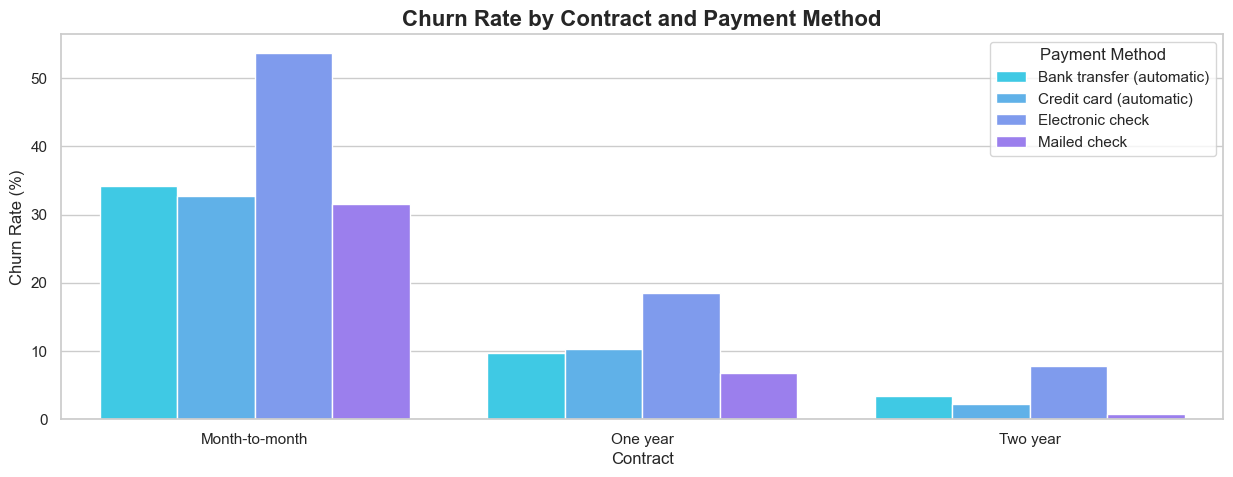

contract              paymentmethod  customer_count  churn_rate
0   Month-to-month  Bank transfer (automatic)             589   34.125637
1   Month-to-month    Credit card (automatic)             543   32.780847
2   Month-to-month           Electronic check            1850    53.72973
3   Month-to-month               Mailed check             893   31.578947
4         One year  Bank transfer (automatic)             391     9.71867
5         One year    Credit card (automatic)             398   10.301508
6         One year           Electronic check             347   18.443804
7         One year               Mailed check             337    6.824926
8         Two year  Bank transfer (automatic)             564    3.368794
9         Two year    Credit card (automatic)             581    2.237522
10        Two year           Electronic check             168    7.738095
11        Two year               Mailed check             382     0.78534

In [659]:
contract_payment_churn = telecom.groupby(['contract', 'paymentmethod']).agg(
    customer_count=('customerid', 'count'),
    churn_rate=('churn', 'mean')).reset_index()

contract_payment_churn['churn_rate'] = contract_payment_churn['churn_rate'] * 100

plt.figure(figsize=(15, 5))
sns.barplot(x='contract', y='churn_rate', hue='paymentmethod', data=contract_payment_churn)
plt.xlabel('Contract')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Contract and Payment Method',fontsize=16, fontweight='bold')
plt.legend(title='Payment Method')
plt.xticks(rotation=0)
plt.show()

contract_payment_churn

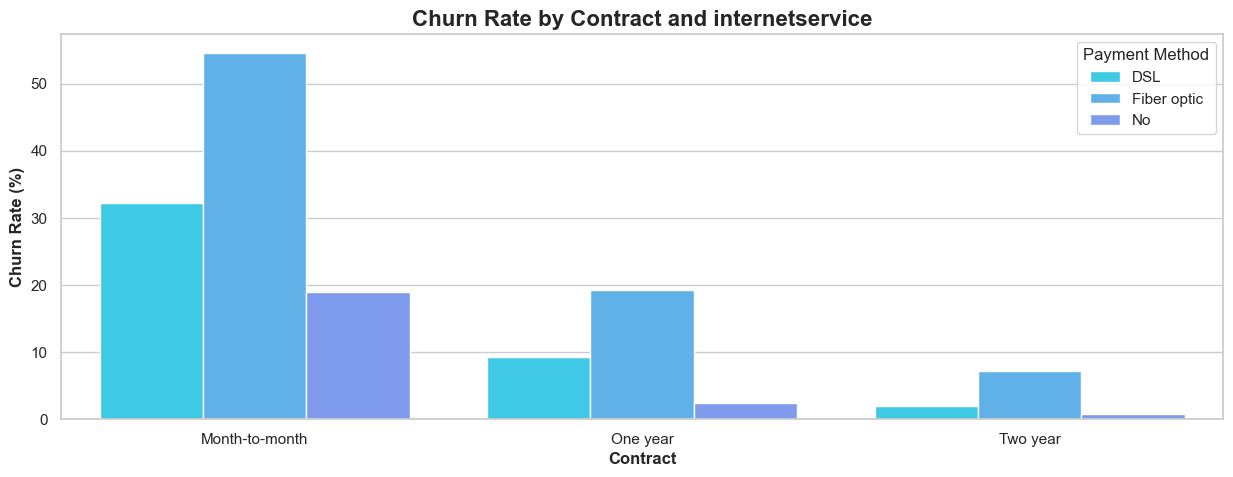

internetservice        contract  customer_count  churn_rate
0             DSL  Month-to-month            1223   32.215863
1             DSL        One year             570    9.298246
2             DSL        Two year             628    1.910828
3     Fiber optic  Month-to-month            2128   54.605263
4     Fiber optic        One year             539   19.294991
5     Fiber optic        Two year             429    7.226107
6              No  Month-to-month             524    18.89313
7              No        One year             364    2.472527
8              No        Two year             638    0.783699

In [660]:
contract_internetservice_churn=telecom.groupby(['internetservice','contract']).agg(customer_count=('customerid', 'count'),churn_rate=('churn', 'mean')).reset_index()
contract_internetservice_churn['churn_rate']=contract_internetservice_churn['churn_rate']*100

plt.figure(figsize=(15, 5))
sns.barplot(x='contract', y='churn_rate', hue='internetservice', data=contract_internetservice_churn)
plt.xlabel('Contract',fontweight='bold')
plt.ylabel('Churn Rate (%)',fontweight='bold')
plt.title('Churn Rate by Contract and internetservice',fontsize=16, fontweight='bold')
plt.legend(title='Payment Method')
plt.xticks(rotation=0)
plt.show()

contract_internetservice_churn




* Contract Length: Longer contract lengths (one year and two years) are associated with lower churn rates across all internet service types, suggesting that longer-term commitments reduce churn.
* Fiber Optic Service: Fiber optic users have consistently higher churn rates compared to DSL and no internet service across all contract lengths. This could indicate issues with service satisfaction, pricing, or competition in the fiber optic segment.
* Month-to-month Contracts: Customers with month-to-month contracts are at higher risk of churn, especially those using fiber optic services. 

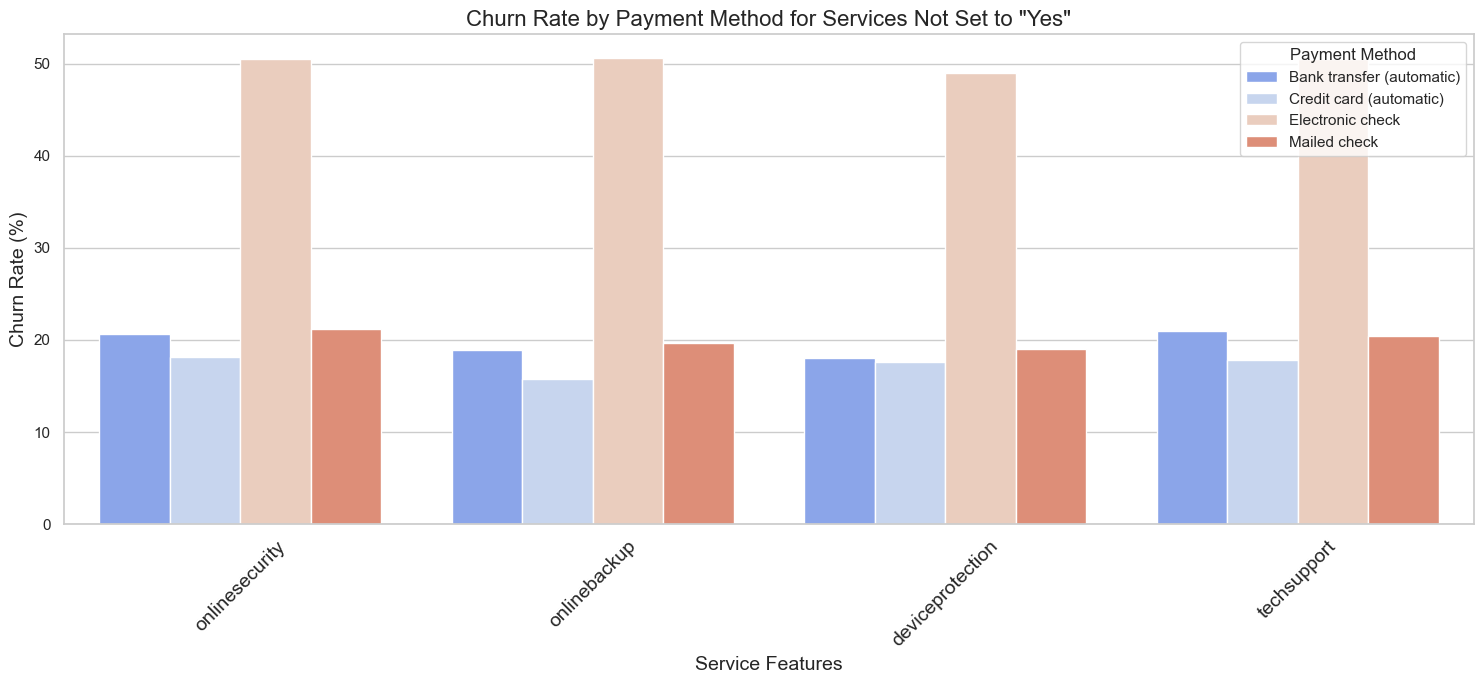

In [661]:

features = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport']

# Prepare the DataFrame to store results
results = pd.DataFrame()

# Calculate churn rate by payment method for each service where the service is not 'Yes'
for feature in features:
    filtered_data = telecom[telecom[feature] != 'Yes']
    churn_rate_data = filtered_data.groupby('paymentmethod', as_index=False).churn.mean()
    churn_rate_data['Feature'] = feature  # Add a column for the feature name
    churn_rate_data['Churn Rate'] = churn_rate_data['churn'] * 100  # Convert proportion to percentage
    results = pd.concat([results, churn_rate_data[['paymentmethod', 'Churn Rate', 'Feature']]], ignore_index=True)

# Visualization
plt.figure(figsize=(15, 7))
sns.barplot(data=results, x='Feature', y='Churn Rate', hue='paymentmethod', palette='coolwarm')
plt.title('Churn Rate by Payment Method for Services Not Set to "Yes"', fontsize=16)
plt.xlabel('Service Features', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.legend(title='Payment Method')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()


## Categorical Features - Pie

**Show the proportion of churned customers within each category relative to all churned customers** <br>
**Helps understand the composition of churned customers by categories**

They are useful for understanding the composition of churned customers.

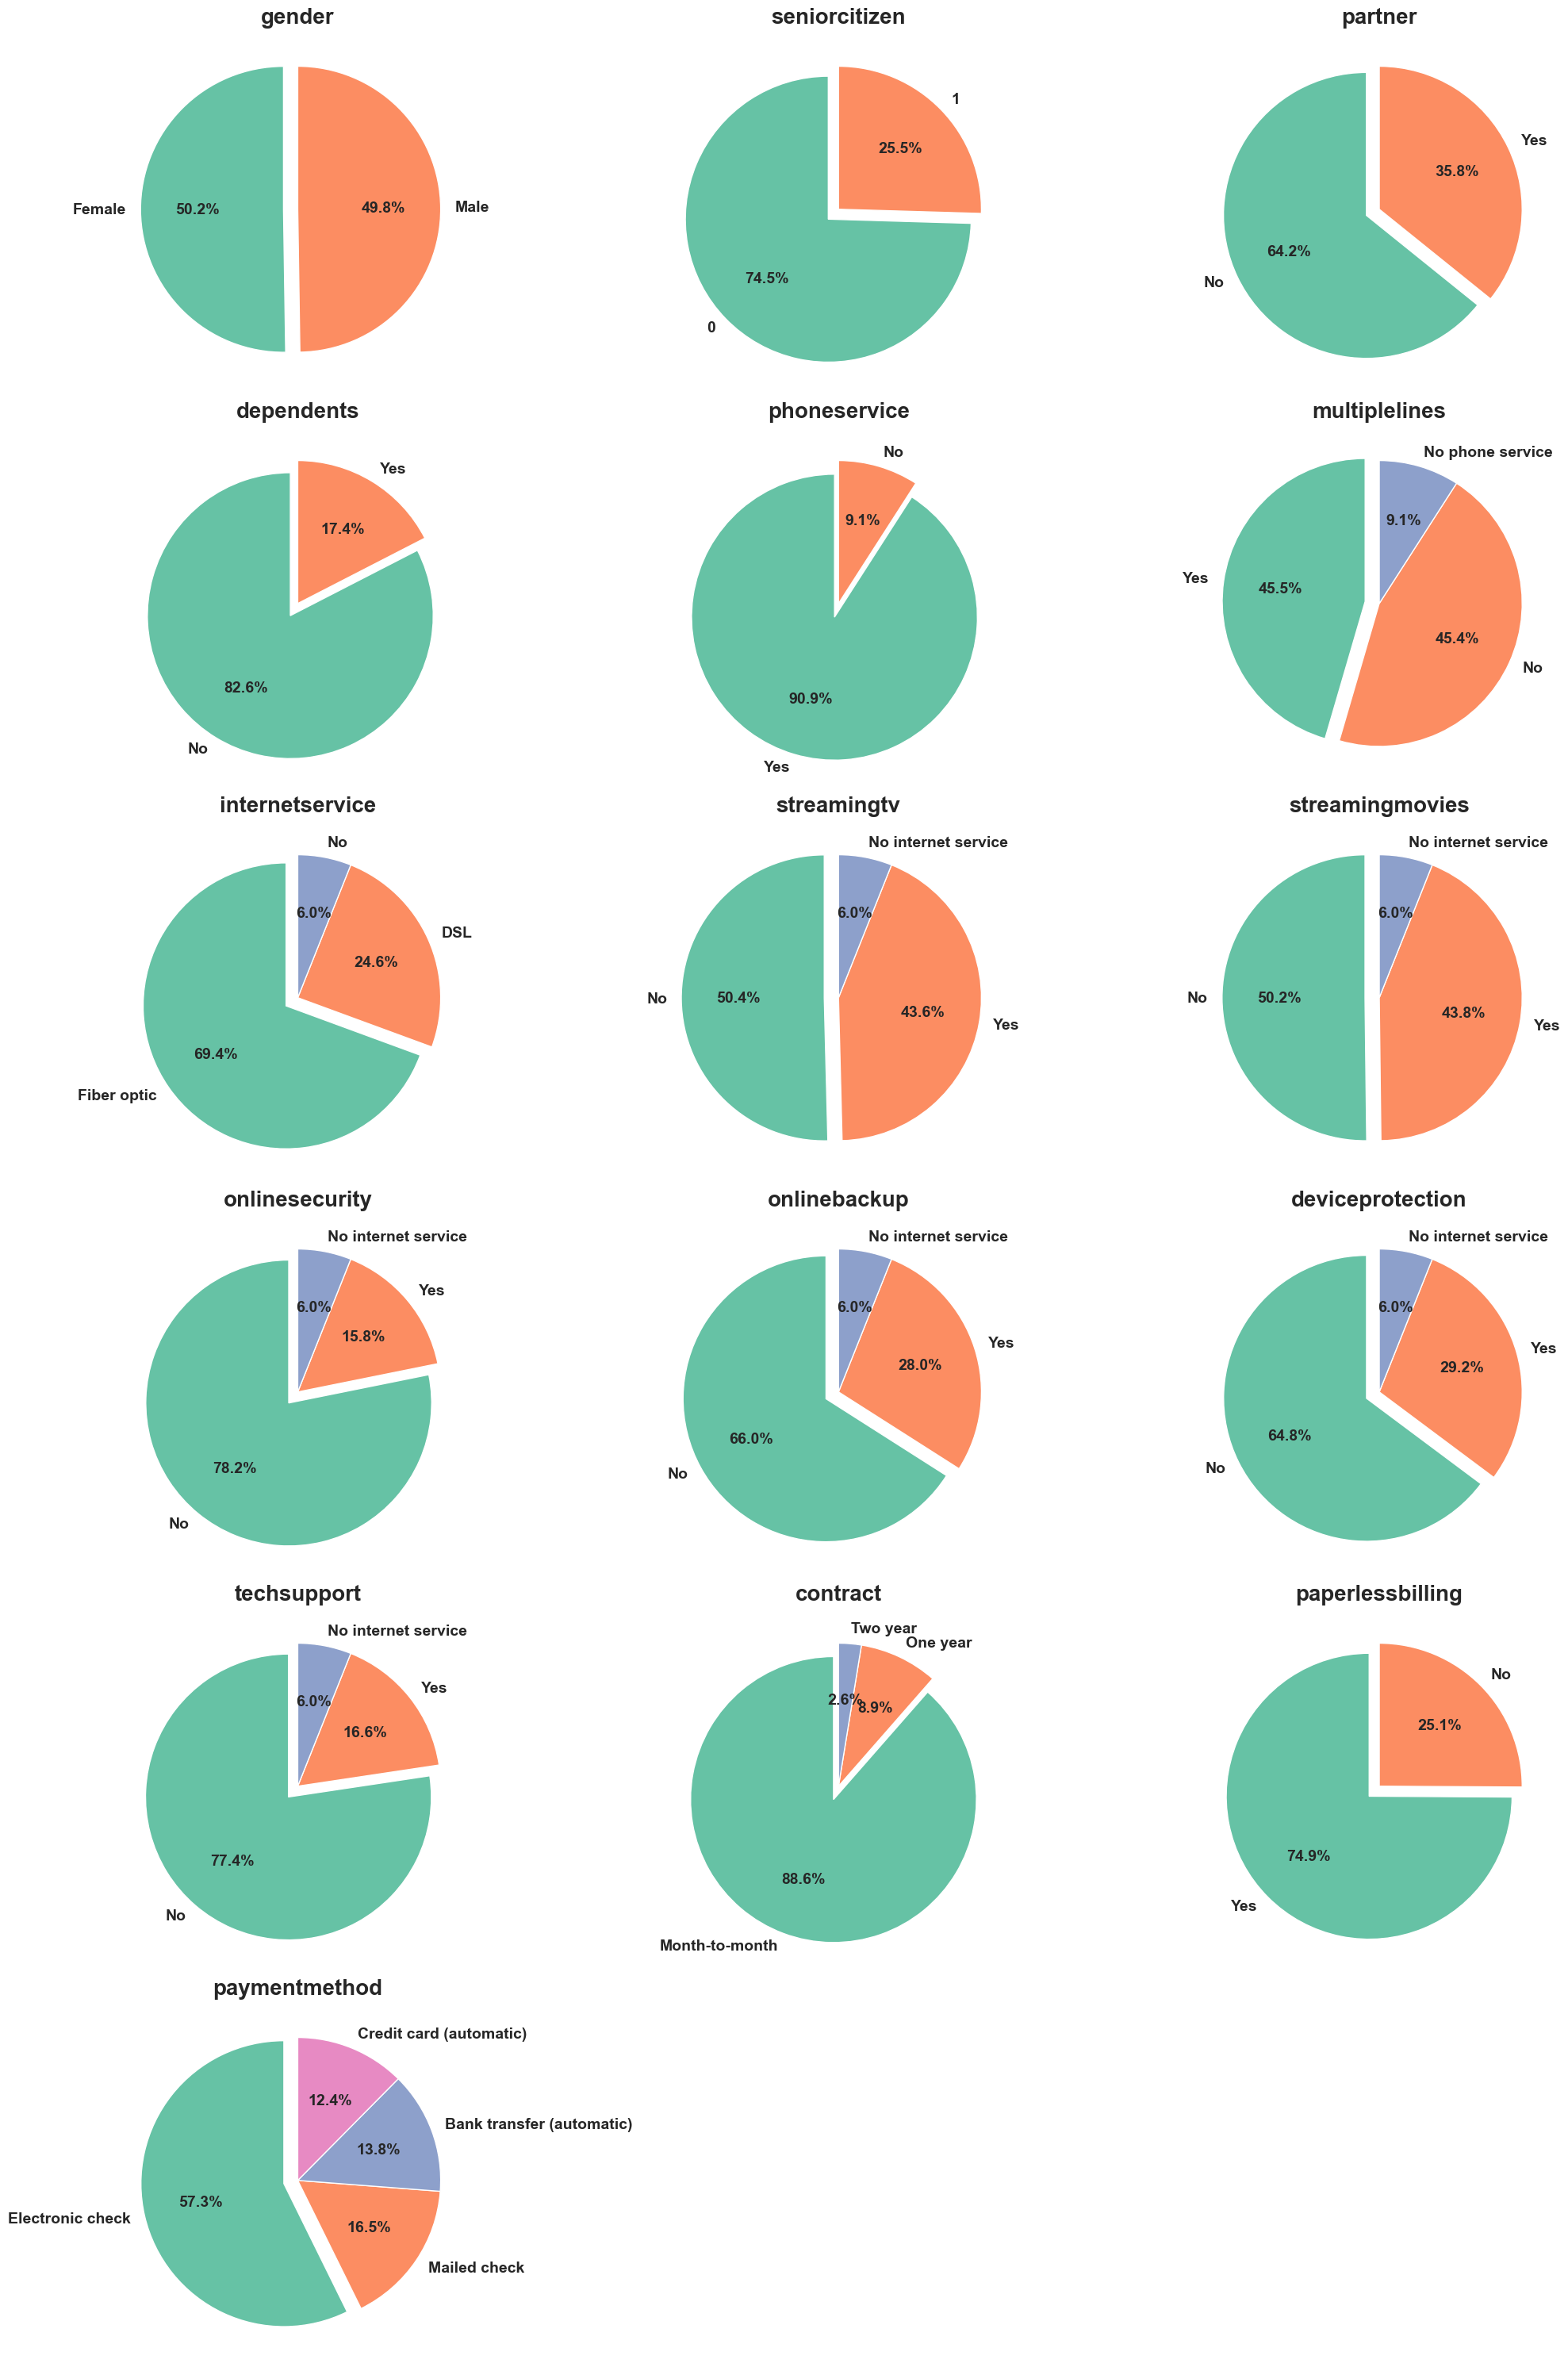

In [662]:
features = ['gender', 'seniorcitizen', 'partner', 'dependents', 
            'phoneservice', 'multiplelines', 'internetservice', 'streamingtv', 'streamingmovies', 
            'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 
             'contract', 'paperlessbilling', 
            'paymentmethod']

cols = 3
rows = (len(features) + cols - 1) // cols  # Calculate the number of rows needed

palette = sns.color_palette("Set2", as_cmap=False)


# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for idx, feature in enumerate(features):
    # Calculate value counts of the feature for churned customers
    feature_counts = telecom[telecom['churn'] == 1][feature].value_counts()
    
    # Calculate the percentage of each category
    feature_percentages = (feature_counts / feature_counts.sum()) * 100
    
    # Convert to a list for plotting
    feature_percentages_list = feature_percentages.tolist()
    

    colors = palette[:len(feature_percentages_list)]

    # Create pie chart in the corresponding subplot
    ax = axes[idx]
    ax.pie(feature_percentages_list, labels=feature_percentages.index, autopct='%1.1f%%',textprops={'fontsize': 14,'fontweight':'bold'} ,startangle=90, explode=[0.1] + [0] * (len(feature_percentages) - 1),colors=colors)
    ax.set_title(feature,fontweight='bold',fontsize=20)

# Remove any unused subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



* **Gender Analysis:** A distinct 50% - 50% split is observed between male and female customers who have switched services. This suggests that the reasons for switching are likely related to service quality or specific processes that elicited negative reactions from customers.

* **SeniorCitizen:** A substantial 75% of churned customers are not classified as SeniorCitizens. This highlights a critical area where the company should focus its attention for customer retention strategies.

* **partners & dependents:** Customers living independently, without partners or dependents, have prominently discontinued services. The data indicates that, on average, 73.4% of customers who churned were living independently.

* **PhoneService:** Despite the provision of PhoneService, a significant percentage of customers switched, suggesting dissatisfaction or other service-related issues.

* **MultipleLines:** The availability of MultipleLines did not significantly affect customer unsubscription, indicating its limited impact on churn.

* **InternetService:** A notable 70% of customers opted out from services involving Fiber Optic cables for InternetService, signaling a strong preference against this technology.

* **Streaming Services:** While customers without StreamingTV and StreamingMovies services tended to cancel their subscriptions, an average of 43.7% of customers with these services switched. This suggests that other factors beyond streaming content contribute to customer churn.

* **onlinesecurity onlinebackup deviceprotection techsupport:** critical importance of providing OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport services. On average, a substantial 71.6% of customers terminated their services due to the absence of these essential features. This highlights a clear correlation between the provision of robust security and support services and customer retention, emphasizing the need for strategic enhancements in these areas.

* **Contract Duration:** Monthly contracts dominate customer churn, with a substantial 88.6% share. This highlights the need to explore alternatives or incentives for longer-term commitments.

* **PaperlessBilling:** PaperlessBilling does not garner positive sentiment among customers, evident from the significant churn associated with this billing method.

* **PaymentMethod:** Electronic check emerges as a significant concern, contributing to 57.3% of churn. Addressing issues with this payment method is crucial. Mailed check, Bank Transfer (automatic), and Credit Card (automatic) follow, necessitating attention to improve the overall payment experience for customers.

## Totalcharges

In [671]:
telecom.groupby('churn').totalcharges.describe()
telecom.totalcharges.describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: totalcharges, dtype: float64

The distribution shows a wide range, with a significant number of customers having lower total charges


count         mean          std    min    25%       50%      75%  \
churn                                                                      
0      5174.0  2549.911442  2329.954215   0.00  572.9  1679.525  4262.85   
1      1869.0  1531.796094  1890.822994  18.85  134.5   703.550  2331.30   

           max  
churn           
0      8672.45  
1      8684.80

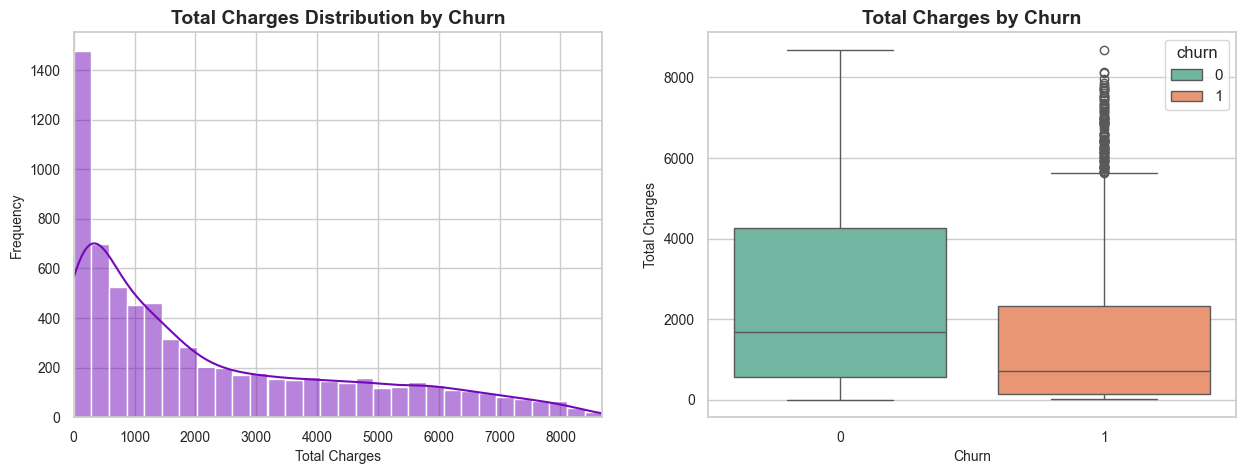

In [672]:
total_charges_statistics = telecom['totalcharges'].describe()
average_charges_by_churn = telecom.groupby('churn')['totalcharges'].describe()

print('The distribution shows a wide range, with a significant number of customers having lower total charges')

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=telecom, x='totalcharges', color='#7209B7',bins=30,kde=True)
plt.title('Total Charges Distribution by Churn',fontsize=14, fontweight='bold')
plt.xlabel('Total Charges',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0,8684.8)

plt.subplot(1,2,2)

sns.boxplot(data=telecom, x="churn", y="totalcharges" ,hue='churn',palette="Set2")
plt.title('Total Charges by Churn',fontsize=14, fontweight='bold')
plt.xlabel('Churn',fontsize=10)
plt.ylabel('Total Charges',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
average_charges_by_churn


1. **High Frequency of Low Total Charges**: The histogram illustrates customer distribution across TotalCharges, showing most customers have lower total charges and a larger proportion of non-churned customers.<br> There’s a decline in frequency as charges increase.

2. **Churn Distribution**: Customers who churn tend to have lower total charges compared to those who do not churn.<br> This suggests that newer customers or those with less financial commitment to the service are more likely to leave.


* The mean total charges are approximately $2279.73, but there is a wide variation, as indicated by the standard deviation of $2266.79.
* The median (50% quantile) is significantly lower than the mean, at $1394.55, highlighting the skewness of the distribution.







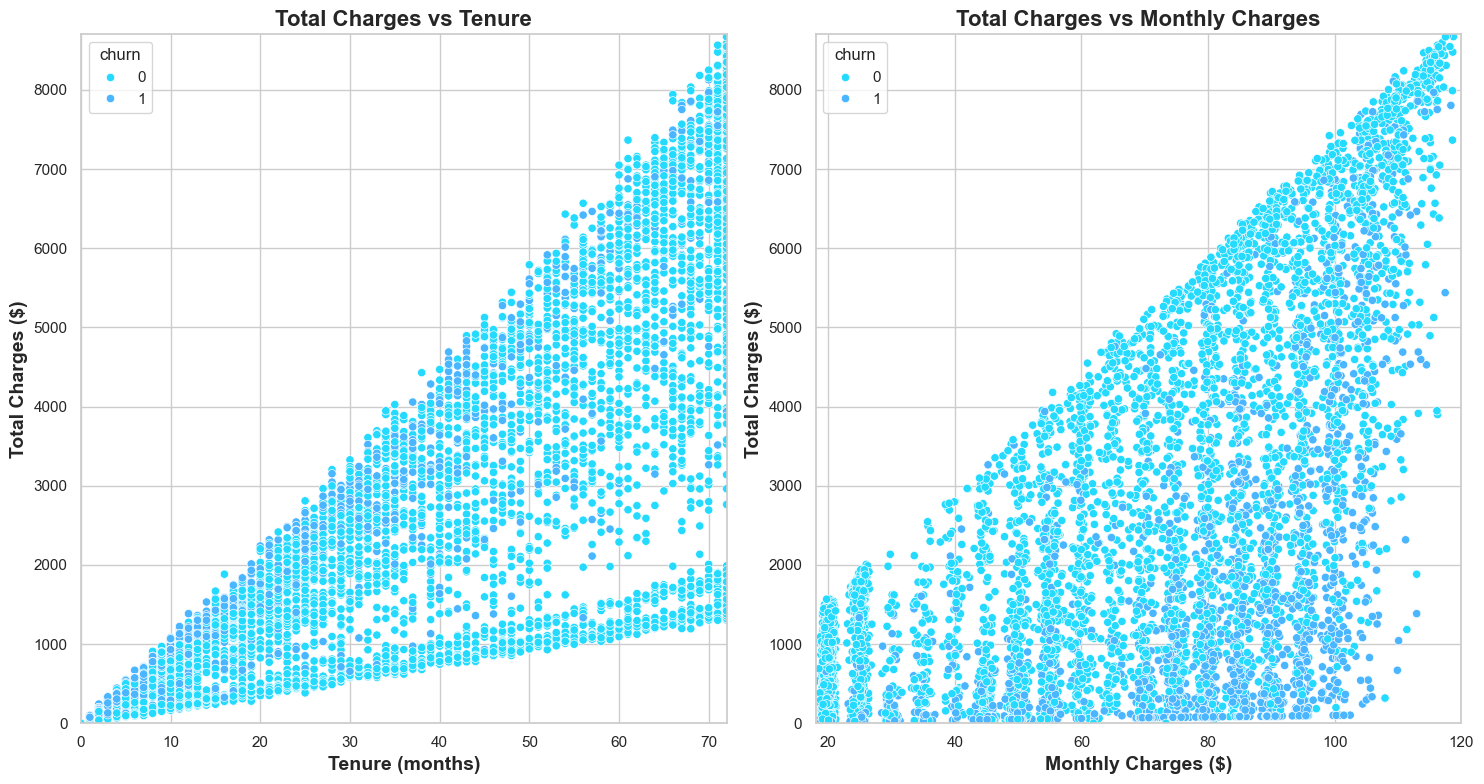

In [665]:
# Scatter plots to visualize the relationships
plt.figure(figsize=(15, 8))

# Scatter plot for TotalCharges vs tenure
plt.subplot(1, 2, 1)
sns.scatterplot(x='tenure', y='totalcharges', hue='churn', data=telecom)
plt.title('Total Charges vs Tenure',fontsize=16,fontweight='bold')
plt.xlabel('Tenure (months)',fontsize=14,fontweight='bold')
plt.ylabel('Total Charges ($)',fontsize=14,fontweight='bold')
plt.xlim(0,72)
plt.ylim(0,8700)
plt.grid(True)

# Scatter plot for TotalCharges vs MonthlyCharges
plt.subplot(1, 2, 2)
sns.scatterplot(x='monthlycharges', y='totalcharges', hue='churn', data=telecom )
plt.title('Total Charges vs Monthly Charges',fontsize=16,fontweight='bold')
plt.xlabel('Monthly Charges ($)',fontsize=14,fontweight='bold')
plt.ylabel('Total Charges ($)',fontsize=14,fontweight='bold')
plt.xlim(18,120)
plt.ylim(0,8700)
plt.grid(True)

plt.tight_layout()
plt.show()




1. **TotalCharges vs Tenure**
<br> The relationship between TotalCharges and tenure shows a clear trend: as tenure increases, total charges also increase. This is expected since customers with a longer relationship with the company will have had more billing cycles.<br>
Churned customers (indicated by orange dots) are scattered throughout but seem to be more prevalent in the lower to mid-range of tenure. This suggests that while customers churn at various tenure stages, there might be a concentration of churned customers who leave before accumulating very high total charges, possibly indicating service or price dissatisfaction within a certain tenure range.
2. **TotalCharges vs MonthlyCharges**<br>
The relationship between TotalCharges and MonthlyCharges shows that as monthly charges increase, total charges also increase. This spread is much broader, reflecting the compounding effect of time on monthly charges.<br>
Churned customers (orange dots) are prevalent across the spectrum of monthly charges but are particularly noticeable at the higher end of monthly charges. This indicates that customers with higher monthly charges might be at a higher risk of churning, possibly due to perceived value or competitive offers. 
Linear relationship between total and monthly charges is evident.

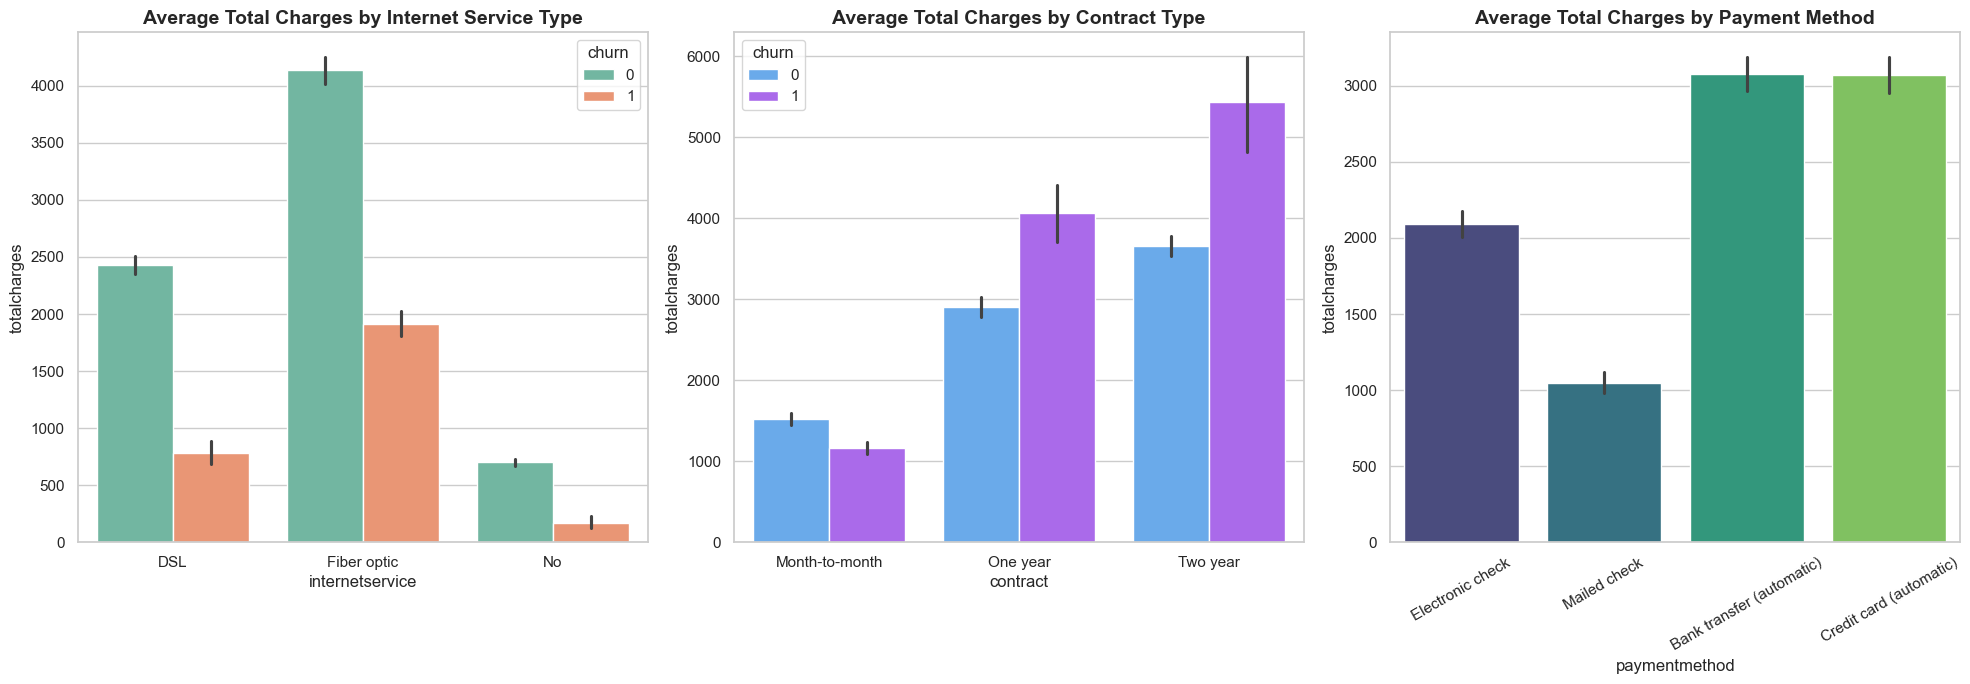

In [666]:
# Create a figure to host the plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

# Average Total Charges by Internet Service Type
sns.barplot(data=telecom, x='internetservice', y='totalcharges', hue='churn', ax=axes[0], palette='Set2')
axes[0].set_title('Average Total Charges by Internet Service Type',fontsize=14,fontweight='bold')

# Average Total Charges by Contract Type
sns.barplot(data=telecom, x='contract', y='totalcharges', hue='churn', ax=axes[1], palette='cool')
axes[1].set_title('Average Total Charges by Contract Type',fontsize=14,fontweight='bold')

# Average Total Charges by Payment Method
sns.barplot(data=telecom, x='paymentmethod', y='totalcharges',  ax=axes[2], palette='viridis',hue='paymentmethod')
axes[2].set_title('Average Total Charges by Payment Method',fontsize=14,fontweight='bold')
axes[2].tick_params(axis='x', rotation=30)  # Rotate labels to improve readability

plt.tight_layout()
plt.show()


Average Total Charges by Internet Service Type:
* Customers with fiber optic services tend to accumulate higher total charges compared to those with DSL or no internet service, regardless of churn status. This could indicate that fiber optic services are either priced higher or adopted by longer-tenure customers.
* Interestingly, churned customers with fiber optic service have accumulated significant charges, suggesting that dissatisfaction may arise despite the higher financial commitment, possibly due to expectations not being met.

Average Total Charges by Contract Type:

* Customers on two-year contracts have the highest average total charges, which is expected given the longer commitment. Churn in this group is less compared to month-to-month contracts, indicating that longer contracts might encourage retention through higher sunk costs.
* Month-to-month contracts show a substantial difference in total charges between those who churn and those who don't, reinforcing the idea that short-term customers are quicker to leave when less is at stake financially.

Average Total Charges by Payment Method:

* There is considerable variation in average total charges based on payment methods. Customers using electronic checks have lower average total charges, which might reflect a demographic that prefers flexible payment options but might also be more sensitive to service dissatisfaction.
* Automatic payment methods (bank transfer and credit card) are associated with higher total charges, likely reflecting a more committed customer base.


### BoxPlot & Outliers totalcharges

In [667]:
### Function
# BoxPlot Prameters

def boxPlot(Data,var):
    x= Data[var].describe()[['25%','50%','75%']].reset_index()
    x.index=x.index.map({0:'Q1',1:'median',2:'Q3'})
    x.drop('index',axis=1,inplace=True)
    Q1=x.loc['Q1',var] 
    median=x.loc['median',var]  
    Q3=x.loc['Q3',var]  
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    lower_whisker = Data.loc[Data[var] >= lower_bound,var ].min() 
    upper_whisker = Data.loc[Data[var] <= upper_bound,var].max() 
    return {'Q1':Q1,'median':median,'Q3':Q3,'IQR':IQR,'lower_bound':lower_bound,'upper_bound':upper_bound,'lower_whisker':lower_whisker,'upper_whisker':upper_whisker}

# find Outliers

def outliers(df,NomCol):
    box=boxPlot(df,NomCol)
    OL = df.loc[(df[NomCol] < box['lower_bound']) | (df[NomCol]  > box['upper_bound'])]
    return OL

                 churn  Not churn
Q1              134.50    572.900
median          703.55   1679.525
Q3             2331.30   4262.850
IQR            2196.80   3689.950
lower_bound   -3160.70  -4962.025
upper_bound    5626.50   9797.775
lower_whisker    18.85      0.000
upper_whisker  5624.85   8672.450
There is 109 outliers when customers churn over then 5626.5


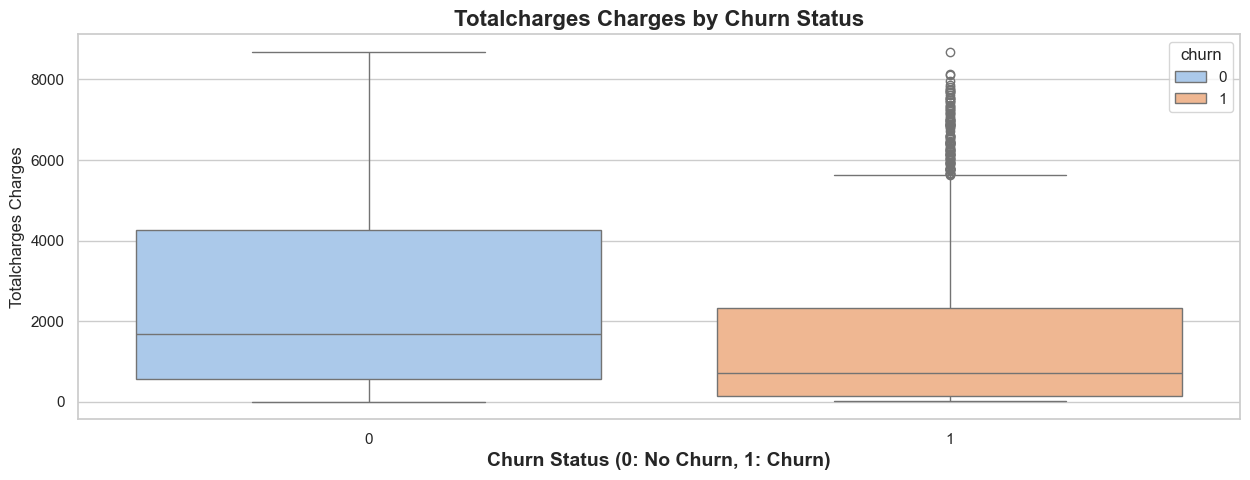

In [668]:
x1=telecom[telecom.churn==1]
y1=boxPlot(x1,'totalcharges') # Using Function boxPlot
outliers_1 = outliers(x1,'totalcharges') # Using Function outliers

x0=telecom[telecom.churn==0]
y0=boxPlot(x0,'totalcharges')
outliers_0 = outliers(x0,'totalcharges')


z1=pd.DataFrame(list(zip(pd.Series(y1),pd.Series(y0))),index=['Q1', 'median', 'Q3', 'IQR', 'lower_bound', 'upper_bound', 'lower_whisker', 'upper_whisker'])
z1.columns=['churn','Not churn']


print(z1)
print(f'There is {len(outliers_1)} outliers when customers churn over then {y1['upper_bound']}')
plt.figure(figsize=(15, 5))
sns.boxplot(x='churn', y='totalcharges', data=telecom,palette='pastel',hue='churn')
plt.title('Totalcharges Charges by Churn Status',fontsize=16,fontweight='bold')
plt.xlabel('Churn Status (0: No Churn, 1: Churn)',fontsize=14,fontweight='bold')
plt.ylabel('Totalcharges Charges')
plt.show()

In [669]:
outliers_1.describe()

seniorcitizen      tenure  monthlycharges  totalcharges  churn
count     109.000000  109.000000      109.000000    109.000000  109.0
mean        0.247706   63.880734      104.147706   6670.281193    1.0
std         0.433674    5.483519        6.574359    695.562975    0.0
min         0.000000   52.000000       83.000000   5638.300000    1.0
25%         0.000000   59.000000      100.200000   6125.400000    1.0
50%         0.000000   65.000000      105.000000   6579.050000    1.0
75%         0.000000   68.000000      108.600000   7176.550000    1.0
max         1.000000   72.000000      118.350000   8684.800000    1.0

There is 109 outliers among the churned customers (0 outliers among not churned customers), which make up 5.83% of all churned customers, have the following characteristics:

* Their TotalCharges are over $5,626.5.
* They have a tenure ranging from 59 to 68 months, indicating they are relatively long-term customers.
* All of them have PhoneService.
* A vast majority, 99%, have Fiber optic InternetService, suggesting they subscribe to a higher-tier service which is typically more expensive.
* Nearly half, 47.7%, have a One year contract
* Contract Type: A relatively smaller proportion of these customers are on a 'Month-to-month' contract. This may imply that customers on shorter-term contracts are more likely to churn, which aligns with standard churn predictors in the telecom industry.
* Service Usage: A large number of these customers are subscribed to multiple service features such as 'StreamingTV' and 'StreamingMovies', which may contribute to higher TotalCharges.


## Monthlycharges

In [ ]:
telecom['monthlycharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlycharges, dtype: float64

* Mean: $64.76, indicating the average monthly charge across all customers.
* Standard Deviation: $30.09, which shows substantial variability in monthly charges.
* Minimum: $18.25, the lowest monthly charge.
* 25th Percentile: $35.50, indicating that 25% of the charges are below this amount.
* Median (50th Percentile): $70.35, suggesting that half of the customers pay more than this amount and half pay less.
* 75th Percentile: $89.85, indicating that 75% of the charges are below this amount.
* Maximum: $118.75, the highest monthly charge.

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlycharges, dtype: float64

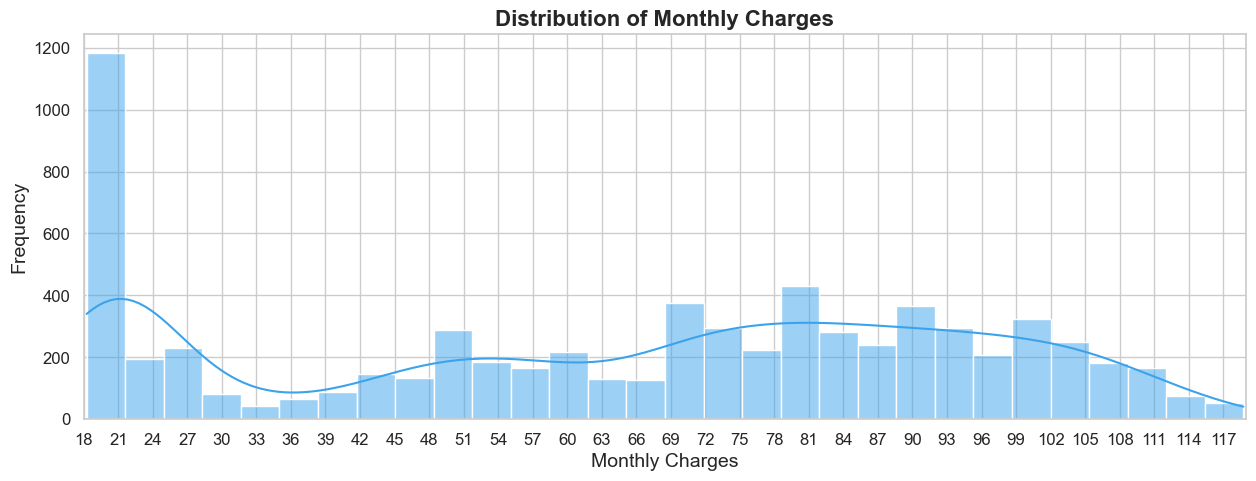

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(telecom['monthlycharges'], bins=30, kde=True,color='#3ba3ec')
plt.xticks(list(range(18,119,3)),fontsize=12)
plt.xlim(18,119)
plt.yticks(fontsize=12)
plt.title('Distribution of Monthly Charges',fontsize=16,fontweight='bold')
plt.xlabel('Monthly Charges',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
telecom['monthlycharges'].describe()

The histogram indicates a wide range of monthly charges among customers, with a notable concentration of charges between roughly $20 and $30, and another significant grouping around $70 to $100. This suggests multiple common pricing tiers.


count       mean        std    min    25%     50%   75%     max
churn                                                                  
0      5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35

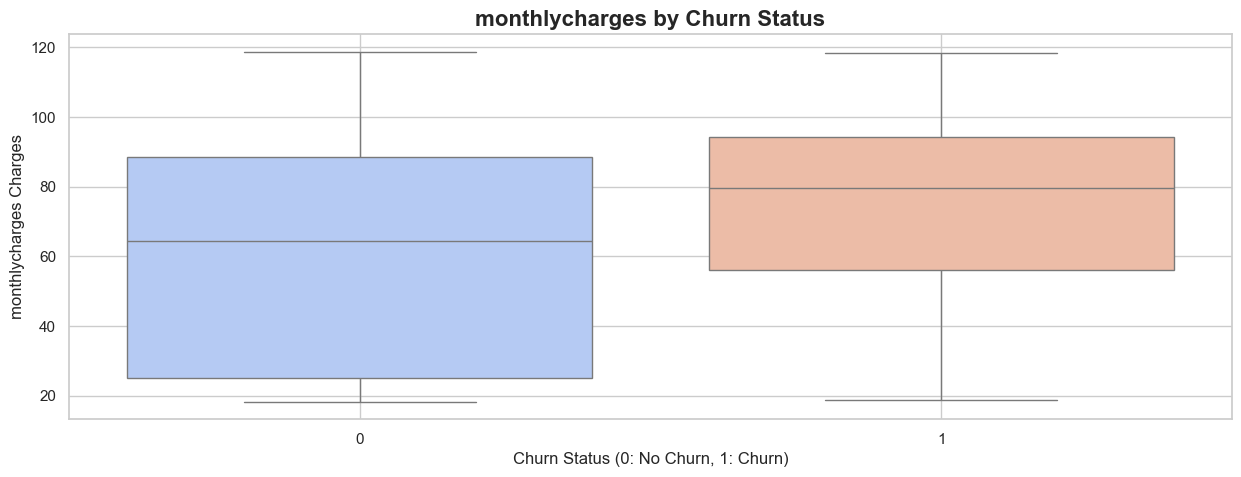

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='churn', y='monthlycharges', data=telecom, palette='coolwarm',hue='churn',legend=False)

plt.title('monthlycharges by Churn Status',fontsize=16,fontweight='bold')
plt.xlabel('Churn Status (0: No Churn, 1: Churn)')
plt.ylabel('monthlycharges Charges')
plt.grid(True)
telecom.groupby('churn')['monthlycharges'].describe()

* The box plot indicates a difference in the distribution of **'MonthlyCharges'** between customers who have churned and those who have not:<br>
Customers who churned generally had higher monthly charges.<br>
The spread and median are higher for churned customers, indicating that higher charges could be a factor in churn.<br>
Average MonthlyCharges for customers who have not churned: $61.27<br>
Average MonthlyCharges for customers who have churned: $74.44<br>


****************Monthly charges bin****************

Binning the MonthlyCharges into meaningful categories can help analyze customer behavior and preferences based on different spending levels. Let's define some bins for MonthlyCharges that might reflect different service levels or customer segments:
* **Low** - under 35.5$
* **Medium**- between 35.6$ to 70.35$
* **High** - between 70.36$- 89.85$
* **Very High** - up to 89.86$


In [ ]:
telecom['monthlycharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlycharges, dtype: float64

In [ ]:
monthly_bins = telecom['monthlycharges'].quantile([0, 0.25, 0.5, 0.75, 1]).values
monthly_labels = ['Low', 'Medium', 'High', 'Very High']

telecom['monthlycharges_bin'] = pd.cut(telecom['monthlycharges'], bins=monthly_bins, labels=monthly_labels, include_lowest=True)
grouped = telecom.groupby('monthlycharges_bin', observed=False).churn.describe()
grouped

count      mean       std  min  25%  50%  75%  max
monthlycharges_bin                                                     
Low                 1762.0  0.112372  0.315914  0.0  0.0  0.0  0.0  1.0
Medium              1766.0  0.245753  0.430655  0.0  0.0  0.0  0.0  1.0
High                1757.0  0.375071  0.484279  0.0  0.0  0.0  1.0  1.0
Very High           1758.0  0.328783  0.469905  0.0  0.0  0.0  1.0  1.0

Churn rates increase as monthly charges rise up to $35.55 after which they slightly decrease for the highest tier.

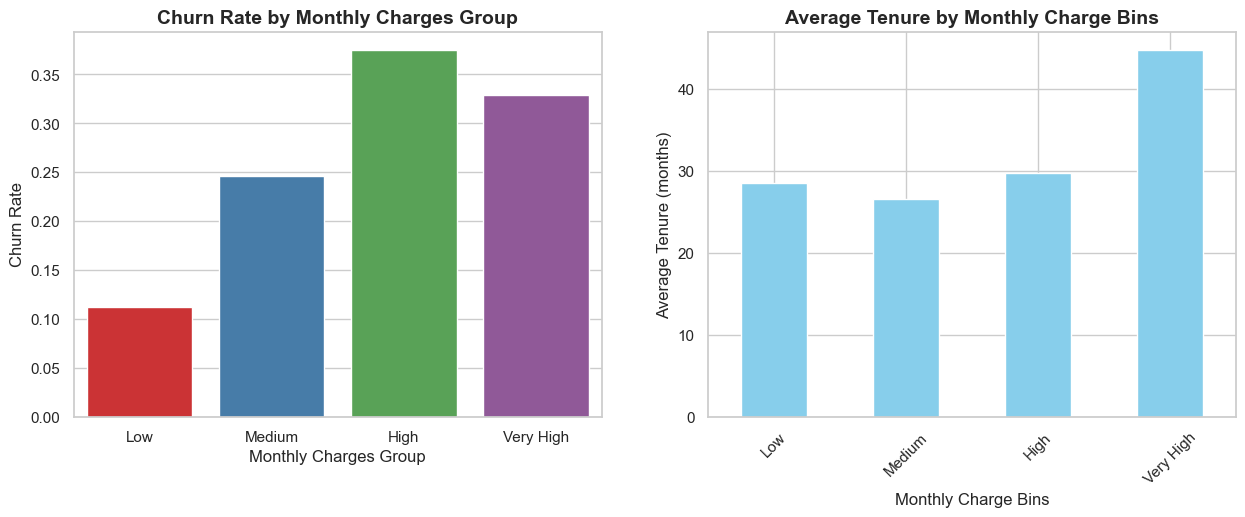

(monthlycharges_bin
 Low          0.112372
 Medium       0.245753
 High         0.375071
 Very High    0.328783
 Name: churn, dtype: Float64,
 monthlycharges_bin
 Low          28.542565
 Medium       26.560023
 High         29.672168
 Very High    44.743458
 Name: tenure, dtype: float64)

In [ ]:
plt.figure(figsize=(15,5))
# Churn rate by monthly charges group
plt.subplot(1, 2, 1)
monthly_charges_churn_rate = telecom.groupby('monthlycharges_bin',observed=True)['churn'].mean()
sns.barplot(x=monthly_charges_churn_rate.index,hue=monthly_charges_churn_rate.index, y=monthly_charges_churn_rate.values, palette='Set1')
plt.title('Churn Rate by Monthly Charges Group',fontsize=14,fontweight='bold')
plt.xlabel('Monthly Charges Group', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)

# Analyze average tenure by monthly charge bins
plt.subplot(1, 2, 2)
avg_tenure_by_bin = telecom.groupby('monthlycharges_bin',observed=True)['tenure'].mean()
avg_tenure_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Tenure by Monthly Charge Bins',fontsize=14,fontweight='bold')
plt.xlabel('Monthly Charge Bins', fontsize=12)
plt.ylabel('Average Tenure (months)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


monthly_charges_churn_rate , avg_tenure_by_bin



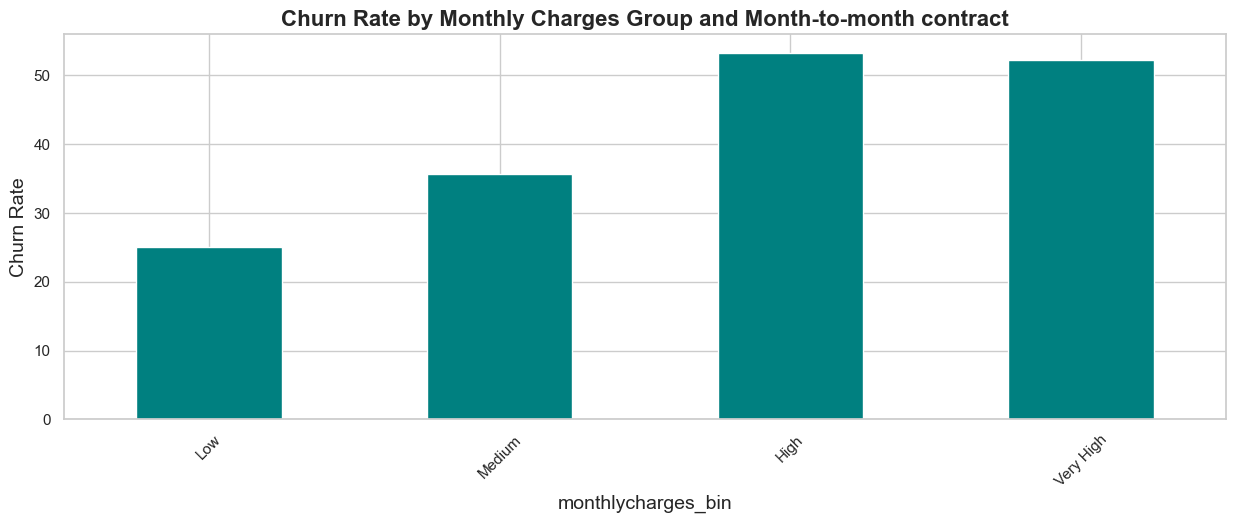

monthlycharges_bin
Low          25.034578
Medium       35.617674
High         53.282182
Very High    52.183908
Name: churn, dtype: Float64

In [ ]:
plt.figure(figsize=(15,5))
monthlycharges_bin_MTM=telecom[telecom.contract =='Month-to-month'].groupby('monthlycharges_bin',observed=True)['churn'].mean()*100
monthlycharges_bin_MTM.plot(kind='bar', color='teal')
plt.title('Churn Rate by Monthly Charges Group and Month-to-month contract',fontsize=16,fontweight='bold')
plt.ylabel('Churn Rate', fontsize=14)
plt.xlabel('monthlycharges_bin',fontsize=14)
plt.xticks(rotation=45)
plt.show()
monthlycharges_bin_MTM

month-to-month contracts correlate with higher churn, particularly for customers in 70-90 $ monthly charges group. This might reflect dissatisfaction or perceived lack of value at higher price points without the security of a fixed-term contract.

Churn by Payment Method and Monthly Charges Group:

In [ ]:
monthlycharges_bin_paymentmethod=telecom.groupby(['monthlycharges_bin','paymentmethod'],observed=True)['churn'].mean()*100
monthlycharges_bin_paymentmethod


monthlycharges_bin  paymentmethod            
Low                 Bank transfer (automatic)     7.629428
                    Credit card (automatic)       4.851752
                    Electronic check              29.70297
                    Mailed check                 11.192214
Medium              Bank transfer (automatic)    13.279133
                    Credit card (automatic)       15.29745
                    Electronic check             37.889273
                    Mailed check                 24.034335
High                Bank transfer (automatic)    21.276596
                    Credit card (automatic)       19.57672
                    Electronic check                  55.0
                    Mailed check                 34.080717
Very High           Bank transfer (automatic)     23.37963
                    Credit card (automatic)       20.47619
                    Electronic check             45.093168
                    Mailed check                 27.722772
Name: chur

High churn rates are evident among customers who pay with electronic checks, especially those with high monthly charges. This points to potential issues with perceived value or service expectations not being met.

## Tenure

In [ ]:
tenure_stats = telecom['tenure'].describe()
tenure_churnRate=telecom.groupby('churn').tenure.describe()
tenure_stats, tenure_churnRate

(count    7043.000000
 mean       32.371149
 std        24.559481
 min         0.000000
 25%         9.000000
 50%        29.000000
 75%        55.000000
 max        72.000000
 Name: tenure, dtype: float64,
         count       mean        std  min   25%   50%   75%   max
 churn                                                           
 0      5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
 1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0)

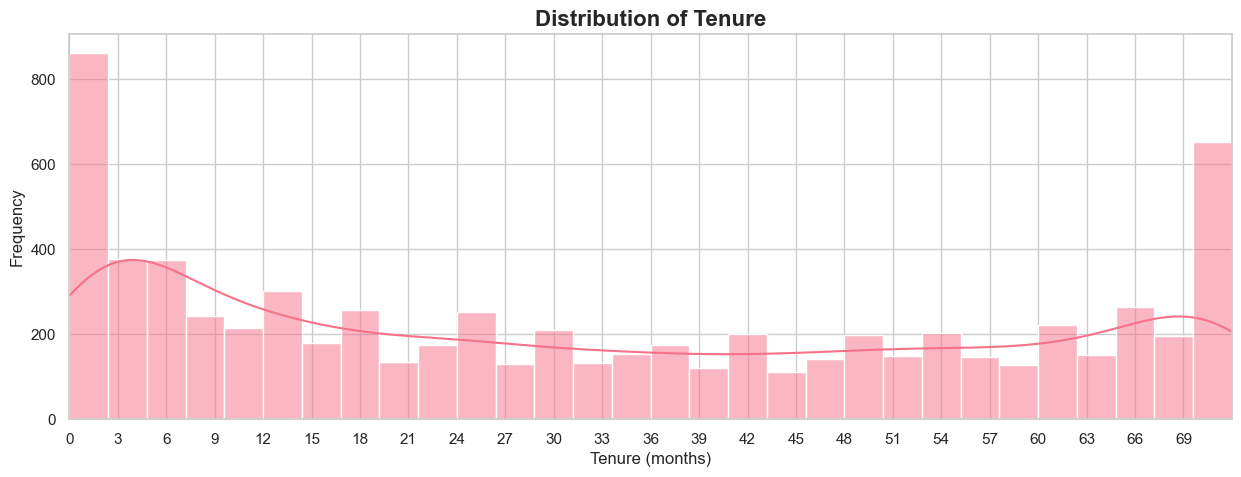

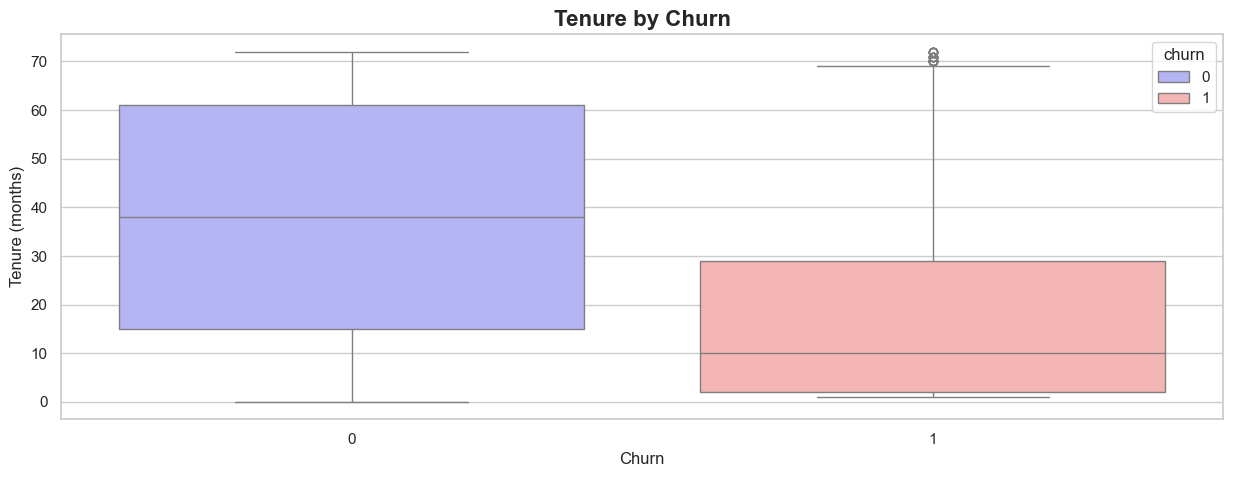

count       mean        std  min   25%   50%   75%   max
churn                                                           
0      5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

In [ ]:

plt.figure(figsize=(15, 5))
sns.histplot(telecom['tenure'], bins=30, kde=True,color='#f77189')
plt.xticks(list(range(0,72,3)))
plt.title('Distribution of Tenure',fontsize=16,fontweight='bold')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.xlim(0,72)
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x='churn', y='tenure', data=telecom, palette='bwr',hue='churn')
plt.title('Tenure by Churn',fontsize=16,fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()

telecom.groupby('churn').tenure.describe()

This distribution suggests a wide range of customer relationships with the company, from new to very long-standing. The large standard deviation indicates significant variability in how long customers stay with the company.

50% of the churned customers their tenure is less then 10 months!!
 ​​

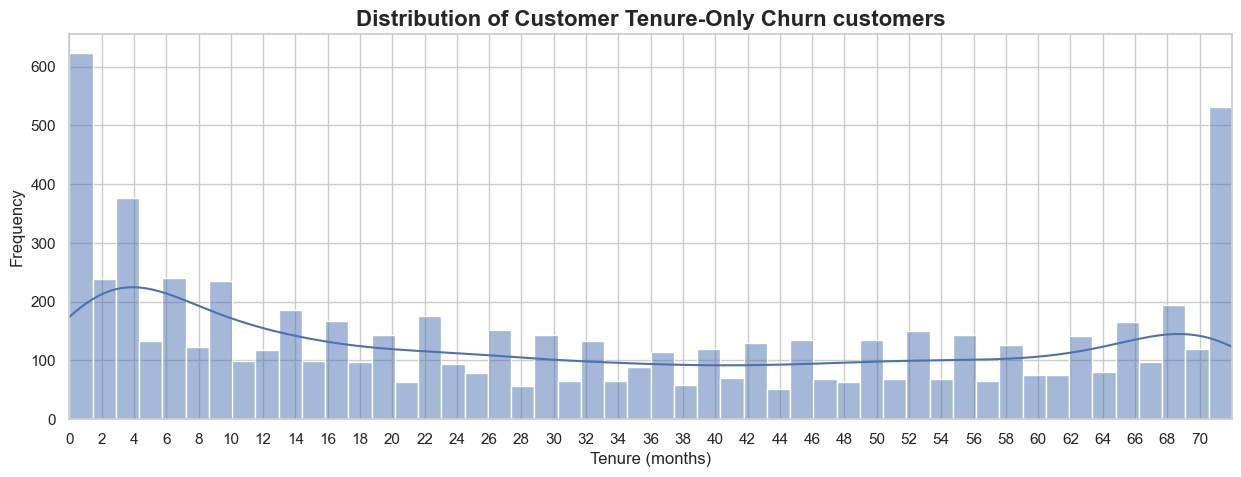

In [ ]:
# Plot distribution of tenure
plt.figure(figsize=(15, 5))
sns.histplot(x=telecom['tenure'], bins=50, kde=True,data=telecom[telecom.churn==1])
plt.title('Distribution of Customer Tenure-Only Churn customers',fontsize=16,fontweight='bold')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.xlim(0,72)
plt.xticks(list(range(0,72,2)))
plt.show()


The histogram shows a bimodal distribution:
There is a significant peak at the lower end (0-10 months), indicating a large number of customers who are relatively new.<br>
A second peak occurs around the maximum tenure (around 70 months), suggesting another group of customers who have stayed with the company for a long time.


count       mean        std   min    25%   50%   75%  \
churn contract                                                                
0     Month-to-month  2220.0  21.033333  18.398051   1.0   5.00  16.0  33.0   
      One year        1307.0  41.674063  19.094012   0.0  26.00  43.0  58.0   
      Two year        1647.0  56.602914  18.362330   0.0  48.00  64.0  71.0   
1     Month-to-month  1655.0  14.016918  15.828615   1.0   2.00   7.0  21.0   
      One year         166.0  44.963855  18.367261   2.0  33.00  48.0  59.0   
      Two year          48.0  61.270833  11.004331  25.0  55.75  65.5  70.0   

                       max  
churn contract              
0     Month-to-month  72.0  
      One year        72.0  
      Two year        72.0  
1     Month-to-month  71.0  
      One year        72.0  
      Two year        72.0

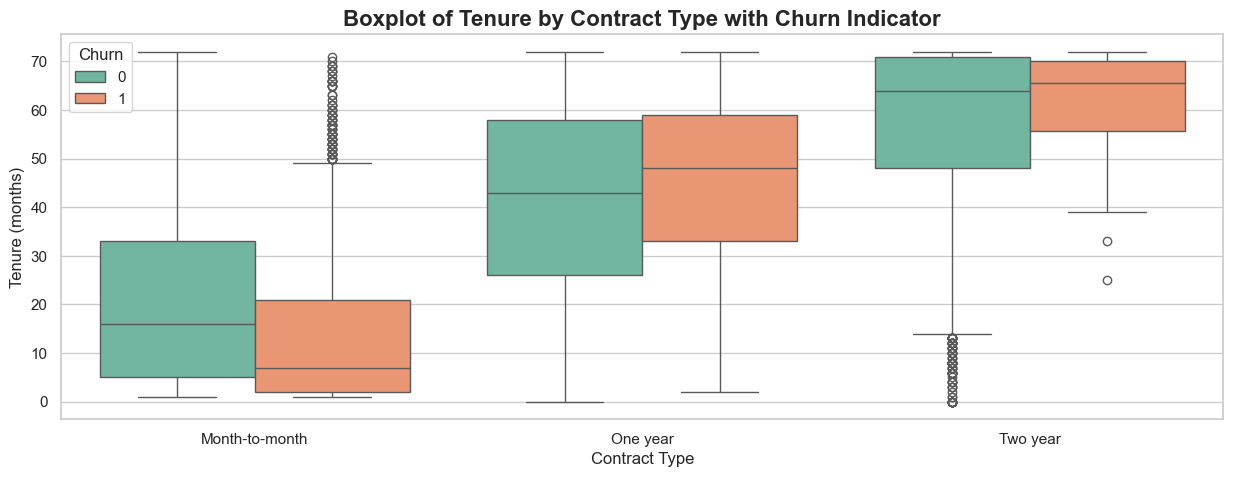

In [ ]:
contract_tenure_group = telecom.groupby(['churn','contract'])['tenure'].describe()

# Plotting a boxplot to visualize the distribution of tenure by contract type with churn as a hue
plt.figure(figsize=(15, 5))
sns.boxplot(data=telecom, x='contract', y='tenure', hue='churn', palette='Set2')
plt.title('Boxplot of Tenure by Contract Type with Churn Indicator',fontsize=16,fontweight='bold')
plt.xlabel('Contract Type')
plt.ylabel('Tenure (months)')
plt.legend(title='Churn')
contract_tenure_group



The longer-term contracts are associated with greater customer retention. The substantial difference in average and median tenures across contract types underscores the potential value of encouraging customers to commit to longer-term contracts to enhance stability and reduce churn.

1. **Month-to-Month Contracts:**<br>
* Customers who churn have significantly shorter tenures compared to those who do not churn, indicating that churn is more prevalent among newer customers in this contract type.
* Non-churned customers in month-to-month contracts have a broader spread of tenure, highlighting some level of retention despite the flexible nature of the contract.

.2. **One-Year Contracts:**<br>
* Churned customers also have shorter tenures here, but the difference between churned and non-churned customers is less stark than in month-to-month contracts.
* Non-churned customers generally have longer tenures, indicating better retention for this contract type.

3. **Two-Year Contracts:**<br>
* The distinction between churned and non-churned customers' tenures is much less noticeable, suggesting that customers who opt for two-year contracts tend to stay with the company longer, regardless of churn status.
* Both churned and non-churned customers show a high median tenure, underscoring strong retention and possibly higher satisfaction among these customers.

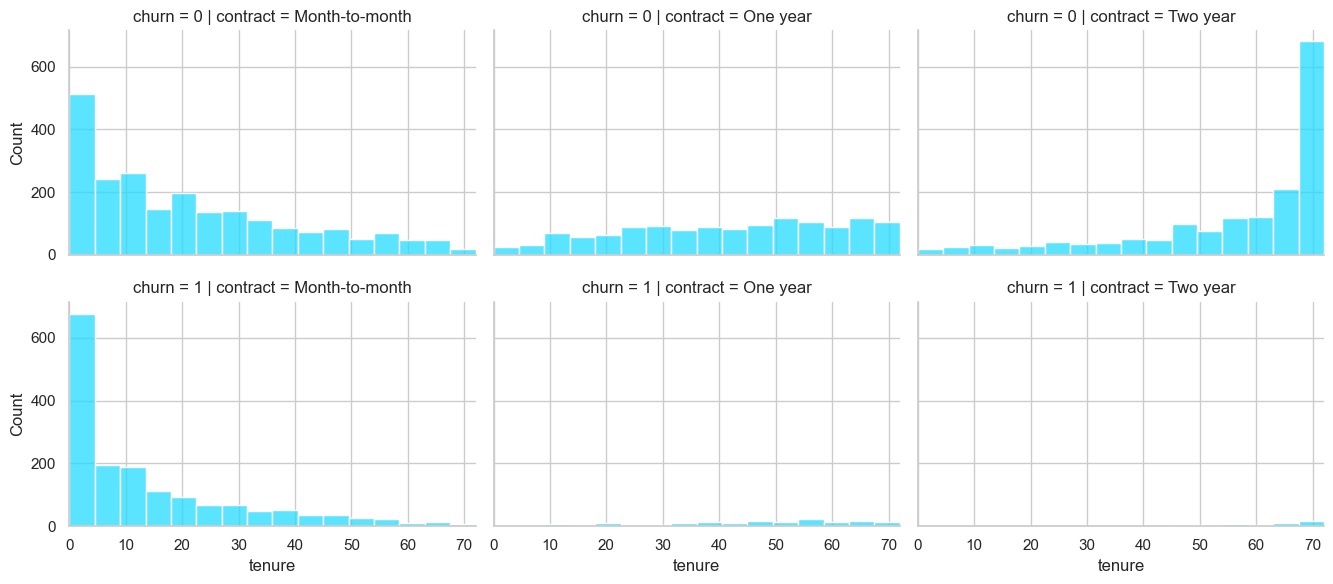

In [538]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved displot with appropriate sizing and aspect ratios
sns.displot(
    data=telecom,
    x='tenure',
    bins='auto',
    col='contract',
    row='churn',
    height=3,  # Adjust height of each facet
    aspect=1.5)
plt.xlim(0,72)
plt.show()


## Tenure_Group

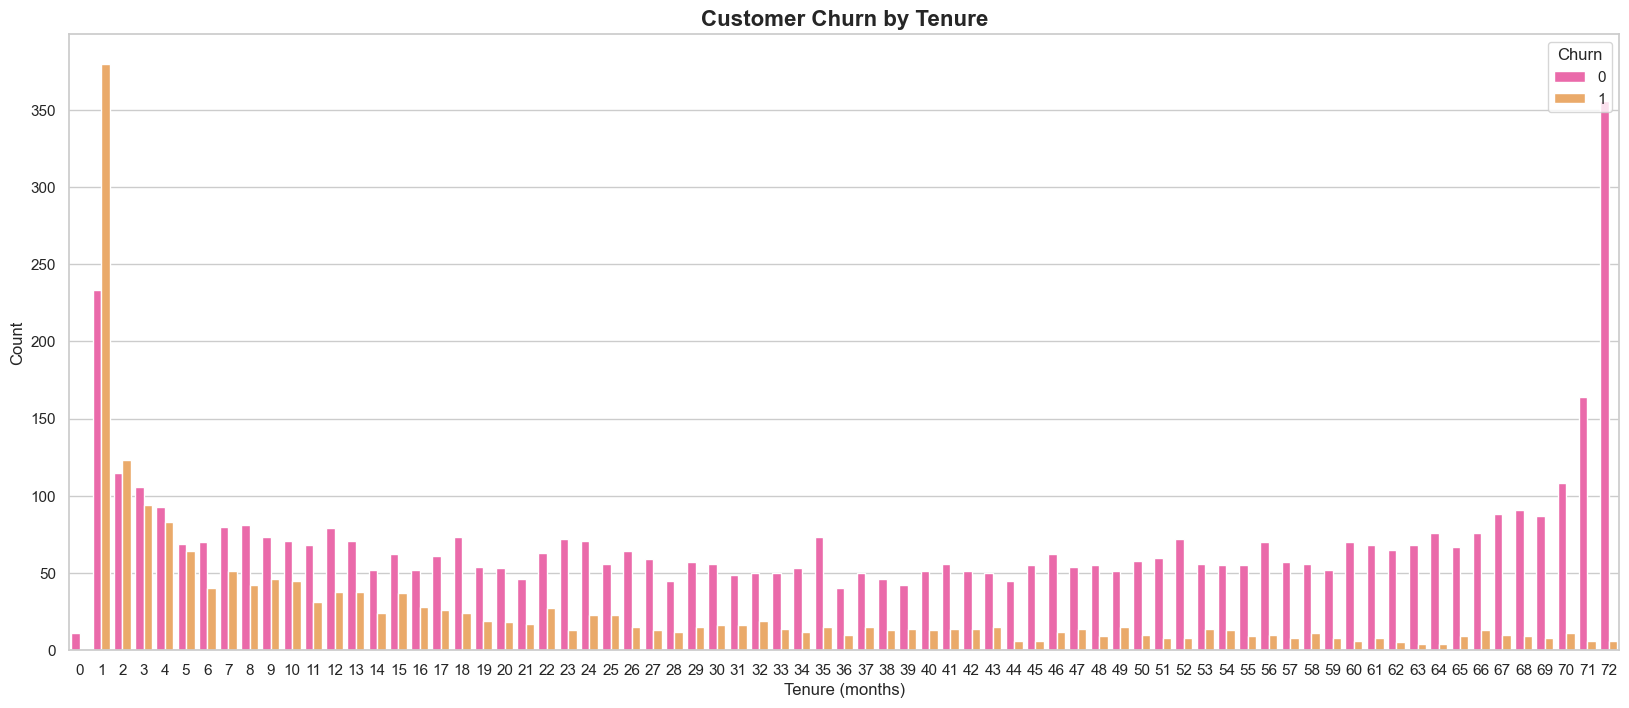

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(data=telecom, x='tenure', hue='churn', palette='spring')
plt.title('Customer Churn by Tenure',fontsize=16,fontweight='bold')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


**Tenure is categorized into:**
* 0-12 months
* 13-24 months
* 25-36 months
* 37-48 months
* 49-60 months
* 61-72 months

Tenure_Group_churn_rate  Tenure_Group_distribution
Tenure_Group                                                    
0-12 months                 47.438243                  31.037910
13-24 months                28.710938                  14.539259
25-36 months                21.634615                  11.813148
37-48 months                19.028871                  10.819253
49-60 months                14.423077                  11.813148
61-72 months                 6.609808                  19.977282

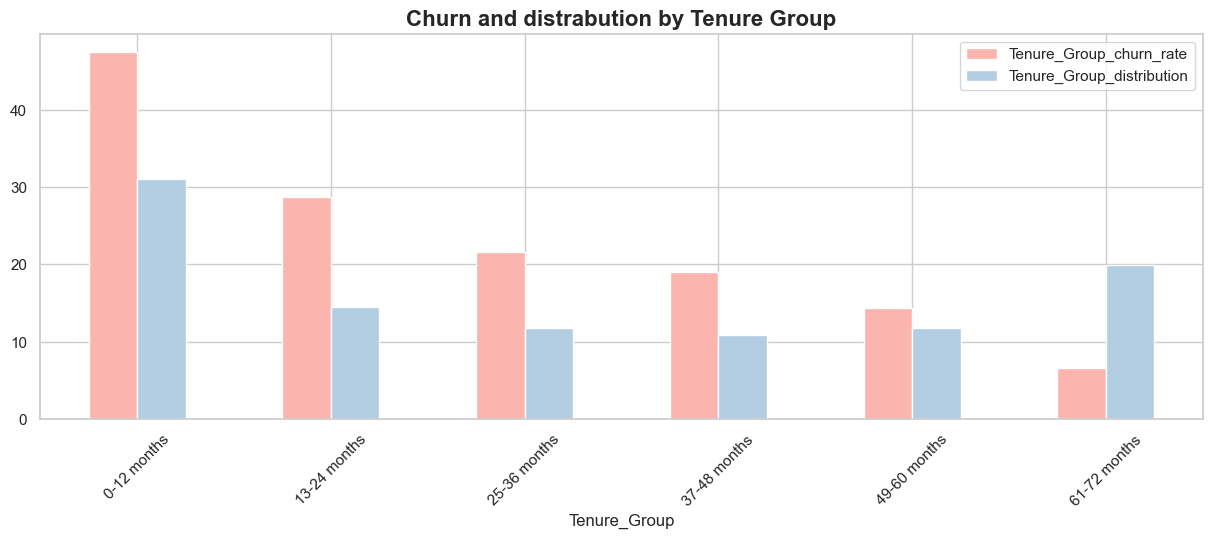

In [ ]:
# Define the bins and labels based on the revised churn pattern
revised_bins = [0,13,25,37,49,61,73]
revised_labels = ['0-12 months', '13-24 months', '25-36 months','37-48 months','49-60 months','61-72 months']


# Create a new column 'tenure_revised_group' based on the defined bins

telecom['Tenure_Group'] = pd.cut(telecom['tenure'], bins=revised_bins, labels=revised_labels, right=False, include_lowest=True)

Tenure_Group_distribution  = (telecom.Tenure_Group.value_counts(normalize=True)*100).sort_index()
Tenure_Group_churn_rate=telecom.groupby('Tenure_Group',observed=True).churn.mean()*100
TenureGroup=pd.DataFrame({'Tenure_Group_churn_rate':Tenure_Group_churn_rate,'Tenure_Group_distribution':Tenure_Group_distribution})
palette = sns.color_palette('Pastel1')
TenureGroup.plot(kind='bar',figsize=(15,5),color=palette)
plt.title('Churn and distrabution by Tenure Group',fontsize=16,fontweight='bold')
plt.xticks(rotation=45)
TenureGroup


**clear trend** the churn rate decreases significantly as the tenure increases. Customers are more likely to churn in the initial months (0-12 months) with the churn rate being the highest, and it gradually decreases as they continue their services beyond 13 months.


contract      Month-to-month  One year  Two year
Tenure_Group                                    
0-12 months         0.513541  0.104839       0.0
13-24 months        0.377205  0.081218       0.0
25-36 months        0.325103      0.08  0.020833
37-48 months        0.335443  0.130597  0.022472
49-60 months        0.277778  0.137072  0.039711
61-72 months        0.222222  0.121406   0.03144

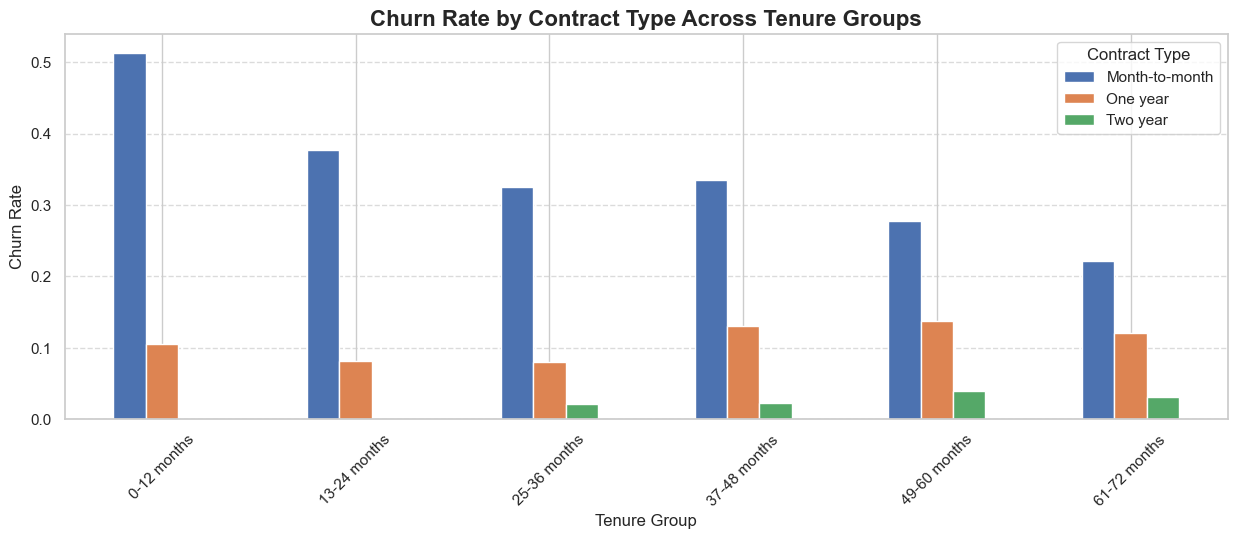

In [ ]:
contract_churn = telecom.pivot_table(values='churn', index='Tenure_Group', columns='contract', aggfunc='mean',observed=True)

# Plotting churn rate by Contract type across Tenure Groups
contract_churn.plot(kind='bar', figsize=(15, 5))
plt.title('Churn Rate by Contract Type Across Tenure Groups',fontsize=16,fontweight='bold')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.legend(title='Contract Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
contract_churn


**The churn rates by contract type across different tenure groups are as follows:**

* **Month-to-month** contracts tend to have the highest churn rates across all tenure groups, with a marked decrease as tenure increases.
* **One-year** contracts show lower churn rates than month-to-month contracts, indicating greater stability.
* **Two-year** contracts have the lowest churn rates, which are nearly negligible in the early tenure groups and remain low in longer tenure groups.

This analysis suggests that customers on month-to-month contracts are more likely to churn, especially in the early stages of their tenure. Offering incentives to switch to longer-term contracts could be a key strategy in reducing churn rates.

paymentmethod  Bank transfer (automatic)  Credit card (automatic)  \
Tenure_Group                                                        
0-12 months                     0.449782                     0.36   
13-24 months                    0.220339                 0.232044   
25-36 months                    0.159341                 0.154255   
37-48 months                    0.159794                 0.162304   
49-60 months                    0.142259                 0.084444   
61-72 months                    0.042065                 0.058594   

paymentmethod  Electronic check  Mailed check  
Tenure_Group                                   
0-12 months            0.619632      0.327586  
13-24 months           0.484211      0.101399  
25-36 months           0.369718      0.095506  
37-48 months           0.300847      0.085106  
49-60 months           0.263158      0.016529  
61-72 months           0.166667      0.007576

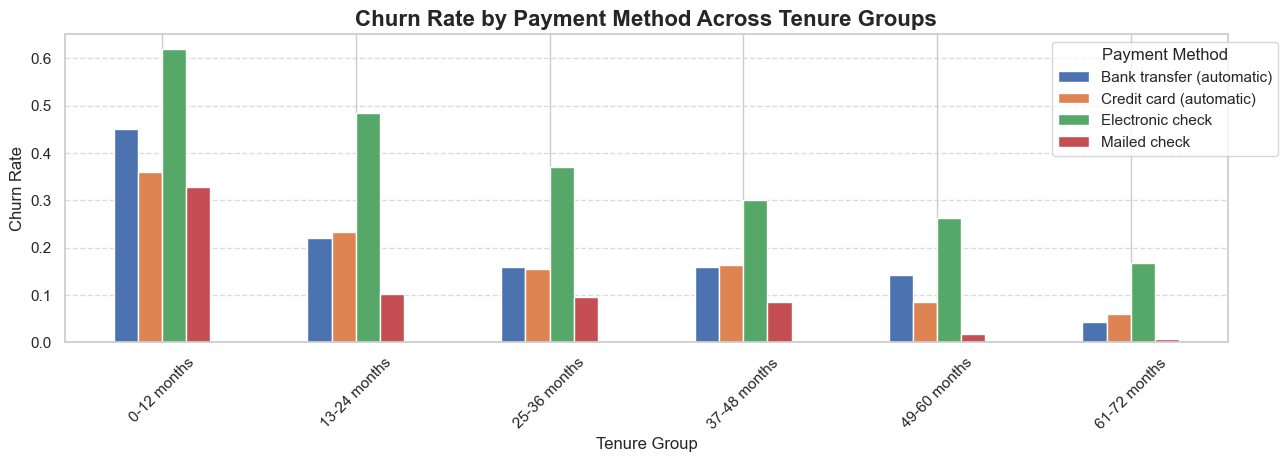

In [ ]:
# Analyzing churn rate by Payment Method within each tenure group
payment_method_churn = telecom.pivot_table(values='churn', index='Tenure_Group', columns='paymentmethod', aggfunc='mean',observed=True)

# Plotting churn rate by Payment Method across Tenure Groups
payment_method_churn.plot(kind='bar', figsize=(15, 4))
plt.title('Churn Rate by Payment Method Across Tenure Groups',fontsize=16,fontweight='bold')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
payment_method_churn



* **Electronic check** payment method has consistently higher churn rates across all tenure groups compared to other payment methods. This suggests that customers using electronic checks might be experiencing issues or might represent a demographic that is more prone to churn.
* **Mailed check** payment method has moderate churn rates in shorter tenures but significantly lower rates as tenure increases.
* **Bank transfer** (automatic) and **Credit card** (automatic) methods generally have the lowest churn rates across all groups.
* **The automatic** nature of these payment methods might contribute to lower churn rates due to convenience and less frequent active decision-making required from customers.


****This analysis suggests potential areas for intervention, such as promoting automatic payment methods to customers who currently use electronic checks, especially in the early stages of their tenure.****

seniorcitizen         0         1
Tenure_Group                     
0-12 months    0.439443  0.678125
13-24 months   0.246495  0.494048
25-36 months   0.172107  0.405063
37-48 months    0.14554  0.422764
49-60 months   0.122628  0.244898
61-72 months   0.058425  0.106195

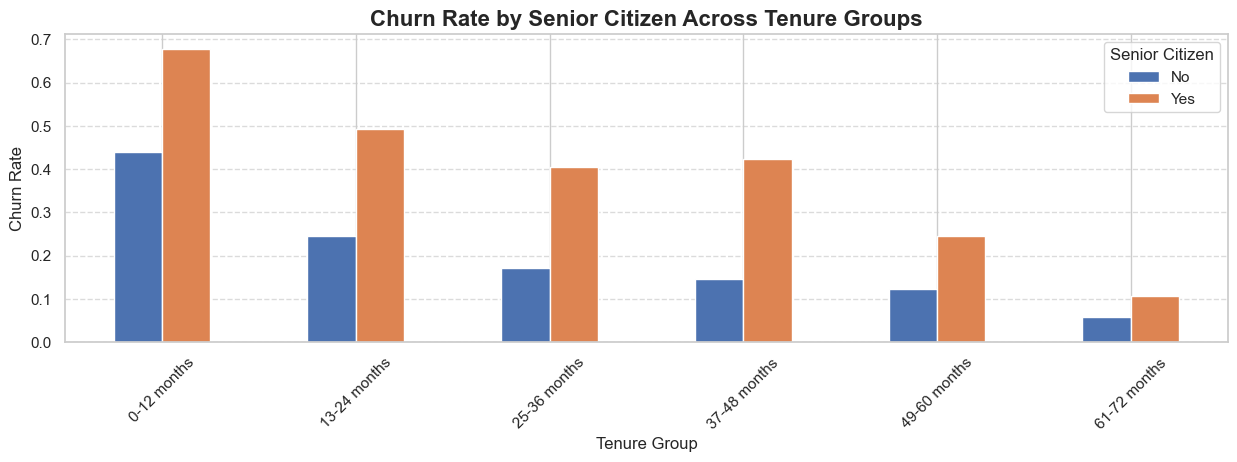

In [ ]:
seniorcitizen_churn = telecom.pivot_table(values='churn', index='Tenure_Group', columns='seniorcitizen', aggfunc='mean',observed=True)

seniorcitizen_churn.plot(kind='bar', figsize=(15, 4))
plt.title('Churn Rate by Senior Citizen Across Tenure Groups',fontsize=16,fontweight='bold')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.legend(title='Senior Citizen', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
seniorcitizen_churn

Senior citizens exhibit higher churn rates compared to non-senior citizens in all tenure groups. The highest churn rates for senior citizens are seen in the '0-12 months' and '13-24 months' groups, indicating that they are more likely to churn early in their tenure.

(partner             No       Yes
 Tenure_Group                    
 0-12 months   0.488601  0.433393
 13-24 months   0.29661  0.274194
 25-36 months  0.213115  0.219753
 37-48 months  0.202247  0.179803
 49-60 months  0.141479  0.145873
 61-72 months   0.07485  0.063374,
 dependents          No       Yes
 Tenure_Group                    
 0-12 months   0.510333  0.333333
 13-24 months  0.329167    0.1875
 25-36 months   0.24216  0.158915
 37-48 months  0.228963  0.111554
 49-60 months  0.177858  0.078292
 61-72 months  0.075449  0.052448)

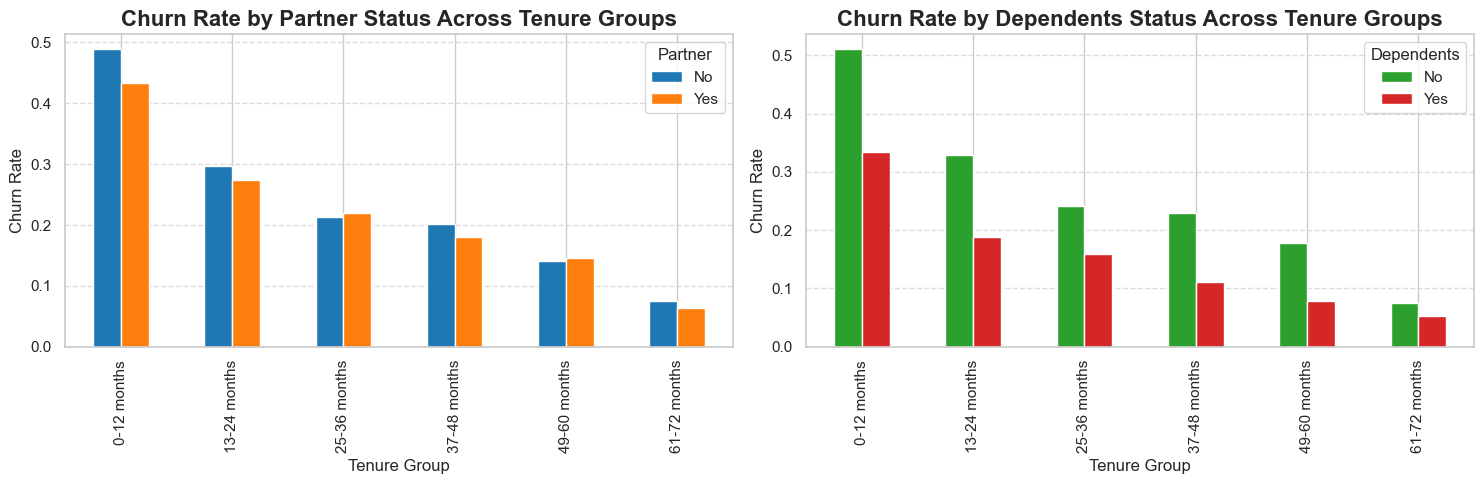

In [ ]:

# Analyzing churn rate by Partner and Dependents status within each tenure group for all customers
all_partner_churn = telecom.pivot_table(values='churn', index='Tenure_Group', columns='partner', aggfunc='mean',observed=True)
all_dependents_churn = telecom.pivot_table(values='churn', index='Tenure_Group', columns='dependents', aggfunc='mean',observed=True)

# Plotting churn rate by Partner status across Tenure Groups for all customers
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

all_partner_churn.plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Churn Rate by Partner Status Across Tenure Groups',fontsize=16,fontweight='bold')
axes[0].set_xlabel('Tenure Group')
axes[0].set_ylabel('Churn Rate')
axes[0].legend(title='Partner')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plotting churn rate by Dependents status across Tenure Groups for all customers
all_dependents_churn.plot(kind='bar', ax=axes[1], color=['#2ca02c', '#d62728'])
axes[1].set_title('Churn Rate by Dependents Status Across Tenure Groups',fontsize=16,fontweight='bold')
axes[1].set_xlabel('Tenure Group')
axes[1].set_ylabel('Churn Rate')
axes[1].legend(title='Dependents')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

all_partner_churn , all_dependents_churn



* Customers with partners tend to have slightly lower churn rates across all tenure groups:
* Customers with dependents consistently show lower churn rates compared to those without dependents, particularly as tenure increases

* The analysis shows that both having a partner and having dependents are associated with lower churn rates, suggesting that these customers might have more stability or less inclination to change service providers, possibly due to shared service utilization or the complexities of changing services for a household rather than an individual


internetservice       DSL  Fiber optic        No
Tenure_Group                                    
0-12 months           0.4     0.698808  0.179337
13-24 months     0.196429     0.487751  0.037657
25-36 months     0.085409     0.396325  0.029412
37-48 months     0.131579     0.331307  0.005988
49-60 months     0.070175     0.246114  0.031056
61-72 months     0.027833     0.124204  0.003623

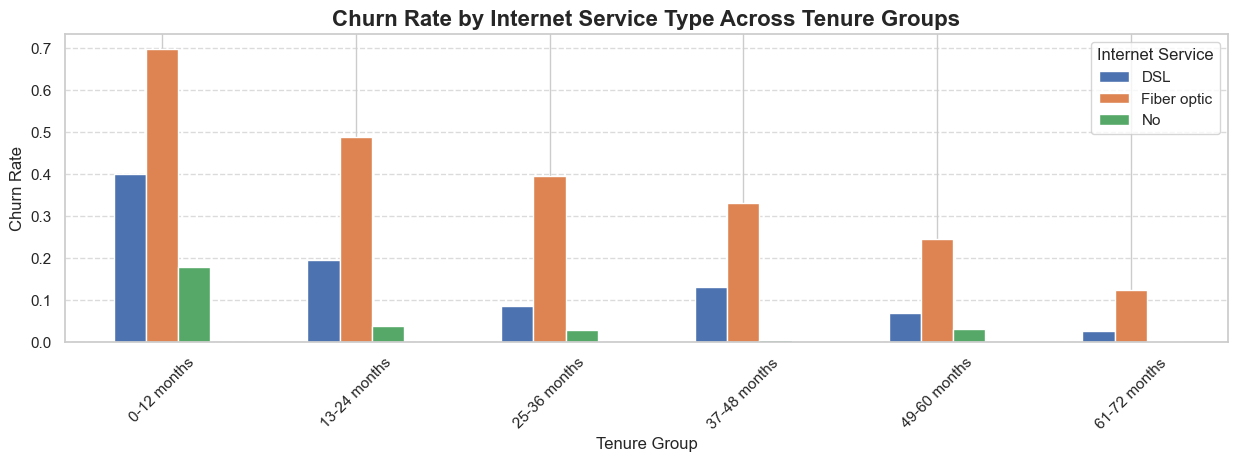

In [ ]:
internet_service_churn = telecom.pivot_table(values='churn', index='Tenure_Group', columns='internetservice', aggfunc='mean',observed=True)

# Plotting churn rate by Internet Service type across Tenure Groups
internet_service_churn.plot(kind='bar', figsize=(15,4))
plt.title('Churn Rate by Internet Service Type Across Tenure Groups',fontsize=16,fontweight='bold')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.legend(title='Internet Service')
plt.grid(axis='y', linestyle='--', alpha=0.7)
internet_service_churn

* *****DSL*****: Generally lower churn rates across all tenure groups.
* *****Fiber optic*****: Significantly higher churn rates, especially in the shorter tenure groups.
* *****No internet service*****: Consistently low churn rates across all tenure groups.

The analysis shows that customers with Fiber optic service tend to churn at much higher rates, particularly in the early stages of their tenure. This could indicate issues with customer expectations, pricing, or service quality associated with Fiber optic services. On the other hand, customers with DSL or no internet service exhibit much lower churn rates, suggesting higher satisfaction or fewer alternatives leading to lower churn.

In [ ]:
telecom[telecom.churn==1].groupby('Tenure_Group',observed=True).tenure.describe()

count       mean       std   min   25%   50%   75%   max
Tenure_Group                                                           
0-12 months   1037.0   4.005786  3.414986   1.0   1.0   3.0   6.0  12.0
13-24 months   294.0  17.789116  3.515410  13.0  15.0  17.0  21.0  24.0
25-36 months   180.0  30.144444  3.454609  25.0  27.0  30.0  33.0  36.0
37-48 months   145.0  42.055172  3.469669  37.0  39.0  42.0  45.0  48.0
49-60 months   120.0  54.033333  3.387901  49.0  51.0  54.0  57.0  60.0
61-72 months    93.0  66.784946  3.202748  61.0  65.0  67.0  69.0  72.0

In [ ]:
# Define the list of features to iterate over
features = ['gender', 'seniorcitizen', 'partner', 'dependents',
            'phoneservice', 'multiplelines', 'internetservice',
            'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
            'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
            'paymentmethod']


data_list = []

# Iterate over each feature to calculate churn rates and proportions
for feature in features:
    # Calculate churn rate for each group
    grouped = telecom.groupby(['Tenure_Group', feature],observed=True)
    churn_rate = grouped['churn'].mean()
    
    # Collect data
    for (tenure_group, category), rate in churn_rate.items():
        data_list.append({
            'Tenure_Group': tenure_group,
            'Feature': feature,
            'Category': category,
            'Churn_Rate': rate,

        })

# Convert list of dictionaries to DataFrame
final_df = pd.DataFrame(data_list)

final_df=final_df.sort_values(by='Churn_Rate',ascending=False)
final_df


Tenure_Group          Feature             Category  Churn_Rate
79    0-12 months  internetservice          Fiber optic    0.698808
13    0-12 months    seniorcitizen                    1    0.678125
62    0-12 months    multiplelines                  Yes    0.639279
170   0-12 months      streamingtv                  Yes    0.637475
188   0-12 months  streamingmovies                  Yes    0.626263
..            ...              ...                  ...         ...
202  61-72 months  streamingmovies  No internet service    0.003623
166  61-72 months      techsupport  No internet service    0.003623
184  61-72 months      streamingtv  No internet service    0.003623
209  13-24 months         contract             Two year    0.000000
206   0-12 months         contract             Two year    0.000000

[258 rows x 4 columns]

totalcharges_0  totalcharges_1  monthlycharges_0  \
Tenure_Group                                                     
0-12 months       263.223803      288.532064         46.714970   
13-24 months     1018.113493     1394.778401         54.449589   
25-36 months     1838.139110     2540.995000         60.415414   
37-48 months     2651.368395     3576.829310         61.977229   
49-60 months     3693.971770     4762.820000         67.579143   
61-72 months     5086.077549     6517.167204         74.440563   

              monthlycharges_1  
Tenure_Group                    
0-12 months          66.493973  
13-24 months         78.509014  
25-36 months         84.266389  
37-48 months         84.790000  
49-60 months         88.182500  
61-72 months         97.317742

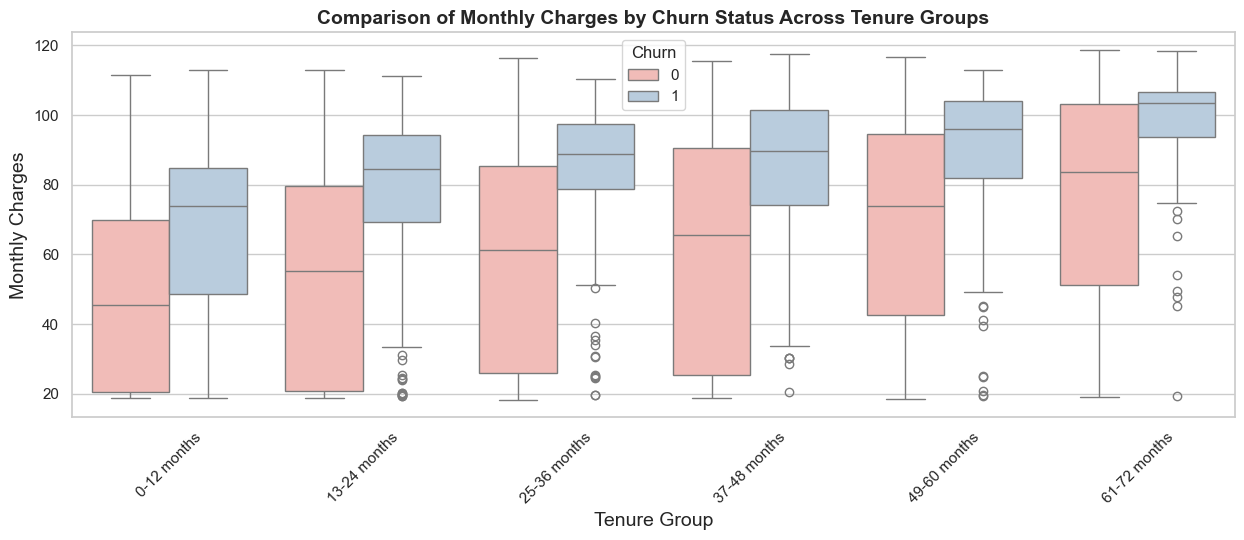

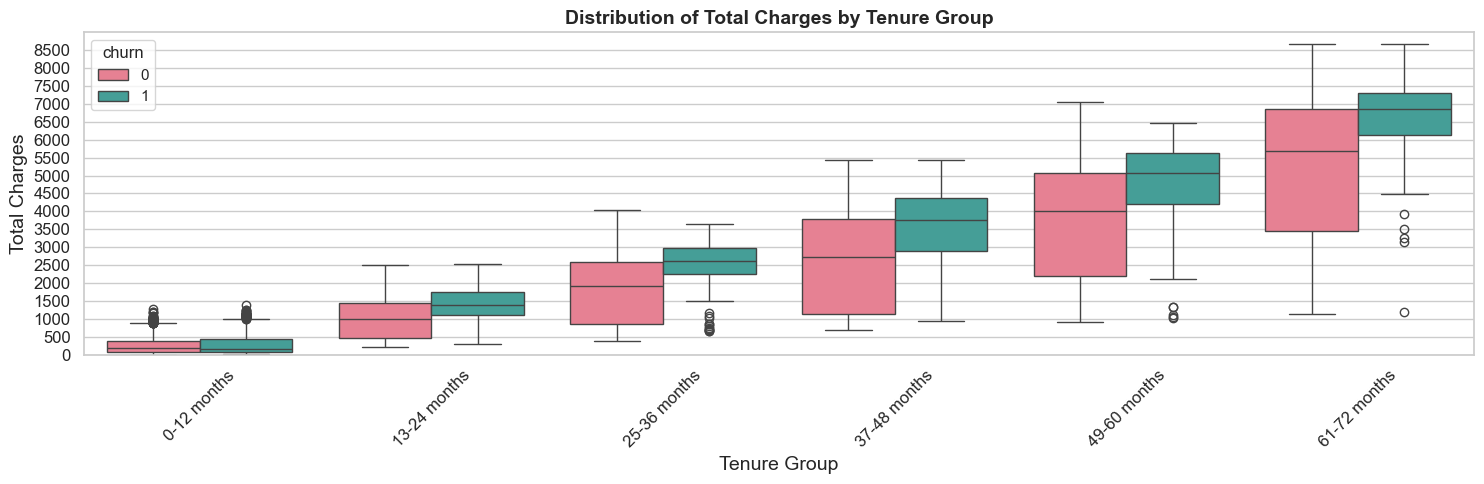

In [ ]:
group_means_totalcharges = telecom.groupby(['churn','Tenure_Group'],observed=True)['totalcharges'].mean().reset_index()
group_means_monthlycharges = telecom.groupby(['churn','Tenure_Group'],observed=True)['monthlycharges'].mean().reset_index()
group_means = pd.merge(group_means_totalcharges, group_means_monthlycharges, on=['churn', 'Tenure_Group'])
group_means_pivot = group_means.pivot(index='Tenure_Group', columns='churn', values=['totalcharges', 'monthlycharges'])
group_means_pivot.columns = ['_'.join(map(str, col)).strip() for col in group_means_pivot.columns.values]
group_means_pivot.reset_index()


plt.figure(figsize=(15, 5))
sns.boxplot(x='Tenure_Group', y='monthlycharges', hue='churn', data=telecom, palette='Pastel1')
plt.title('Comparison of Monthly Charges by Churn Status Across Tenure Groups', fontsize=14,fontweight='bold')
plt.xlabel('Tenure Group', fontsize=14)
plt.ylabel('Monthly Charges', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Churn')


sns.set_theme(style="whitegrid")  

plt.figure(figsize=(15, 5))  
sns.boxplot(x='Tenure_Group', y='totalcharges', hue='churn' ,data=telecom, palette='husl')  
plt.title('Distribution of Total Charges by Tenure Group', fontsize=14, fontweight='bold') 
plt.yticks(list(range(0,9000,500))) 
plt.ylim(0,9000)
plt.xlabel('Tenure Group', fontsize=14)  
plt.ylabel('Total Charges', fontsize=14) 
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
group_means_pivot

* "***Monthly Charges***"-  we observe that customers who churn (churn=1) generally have higher monthly charges across all tenure groups than those who do not churn (churn=0). This trend suggests that higher monthly charges could be a contributing factor to customer churn, particularly in the early tenure stages.

* "***Total Charges***"- customers with longer tenure and who have not churned appear to accumulate significantly higher charges over time, which is expected as these charges would accumulate month over month. Interestingly, churned customers in the longer tenure groups also show relatively high total charges, possibly indicating that a combination of high charges and longer tenure could lead to churn.

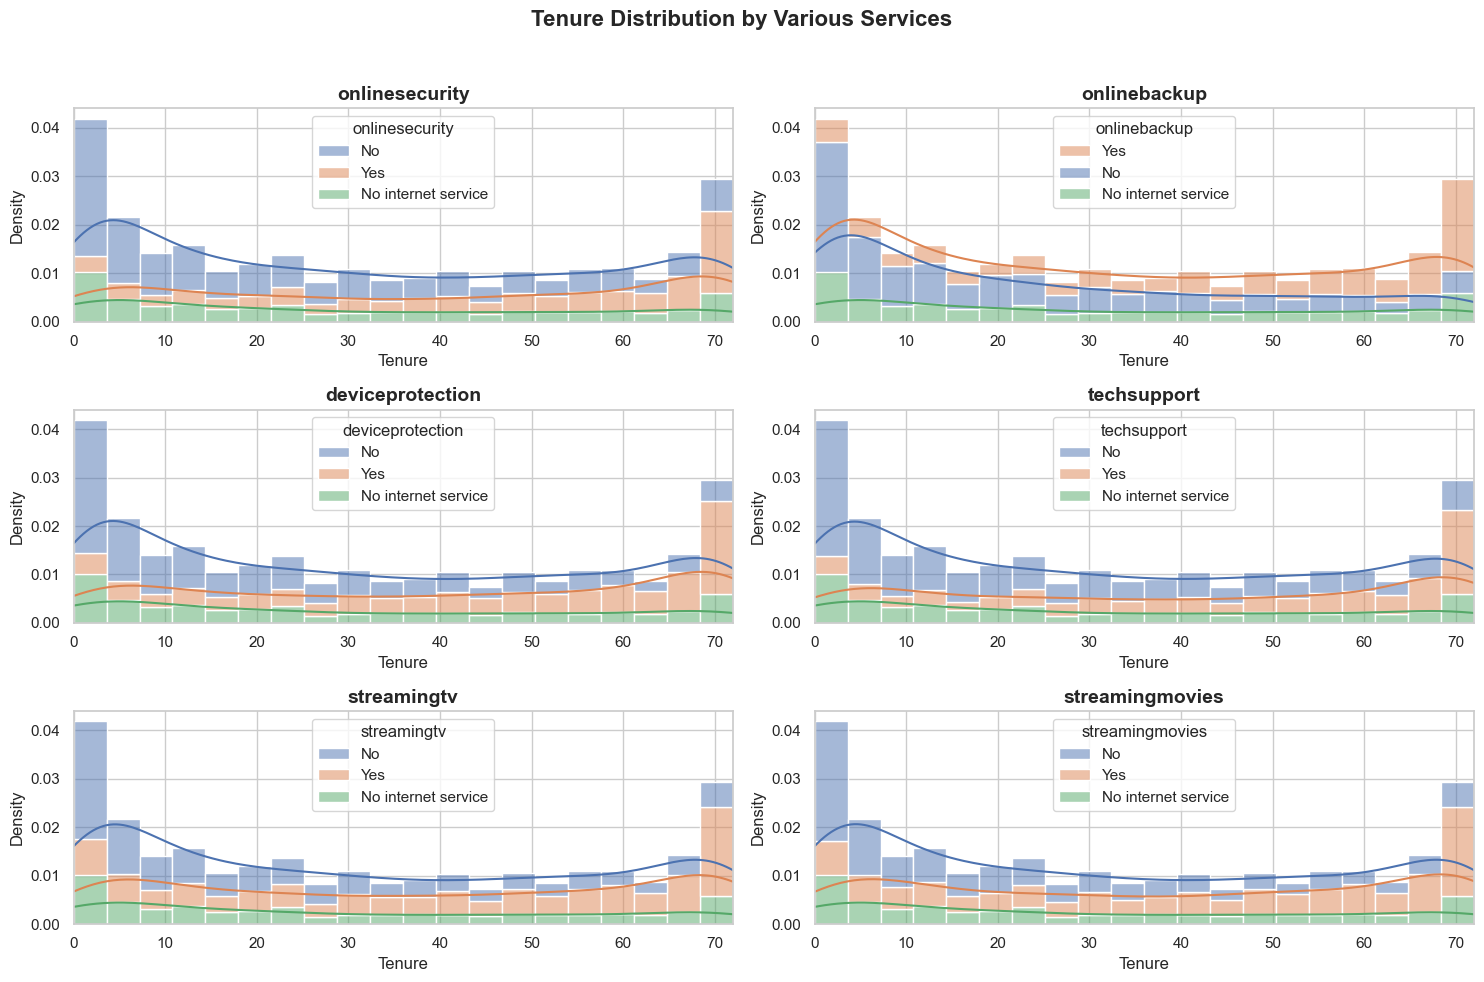

In [ ]:
services = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharex=False)
fig.suptitle('Tenure Distribution by Various Services', fontsize=16, fontweight='bold') 
palette = {'No': 'C0', 'Yes': 'C1', 'No internet service': 'C2'}
# Plot each service in a subplot
for ax, service in zip(axes.flatten(), services):
    sns.histplot(data=telecom, x='tenure', hue=service, multiple='stack', kde=True, stat='density', ax=ax, legend=True,palette=palette,bins=20)
    ax.set_title(service,fontsize=14, fontweight='bold')
    ax.set_xlim(0,72)
    ax.set_xlabel('Tenure')
    ax.set_ylabel('Density')
    plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

* Additional services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies correlate with longer customer tenures and reduced churn rates.
* Significant churn occurs in the first 0-12 months, especially among customers not subscribing to additional services
* As we can see for all various services, new customer tend to avoid subscribing to these services and they simultaneously exhibit high churn rates.

## Additional_services


**Additional Services** - only for customers who have internet service
* Internet Service: Offering connectivity to the internet, which may include different types of technologies such as DSL, fiber optics, or cable.
* Online Security: Security features over the internet connection.
* Online Backup: Backup services for data protection.
* Device Protection: Insurance or protection services for physical devices.
* Tech Support: Technical assistance and customer support.
* Streaming TV: Subscription for television content over the internet.
* Streaming Movies: Subscription for movie content over the internet.


In [ ]:
# Counting additional services directly based on "Yes" answers- this services is only for customers who have internet service

telecom['additional_service'] = (
    (telecom['internetservice'] != 'No').astype(int) + 
    (telecom['onlinesecurity'] == 'Yes').astype(int) + 
    (telecom['onlinebackup'] == 'Yes').astype(int) + 
    (telecom['deviceprotection'] == 'Yes').astype(int) + 
    (telecom['techsupport'] == 'Yes').astype(int) + 
    (telecom['streamingtv'] == 'Yes').astype(int) + 
    (telecom['streamingmovies'] == 'Yes').astype(int)+
    (telecom['multiplelines']=='Yes').astype(int))

telecom.loc[telecom['internetservice'] == 'No','additional_service']=0

additional_service
1    0.087548
2    0.147906
3    0.173464
4    0.177270
5    0.169114
6    0.130868
7    0.076128
8    0.037702
Name: proportion, dtype: float64


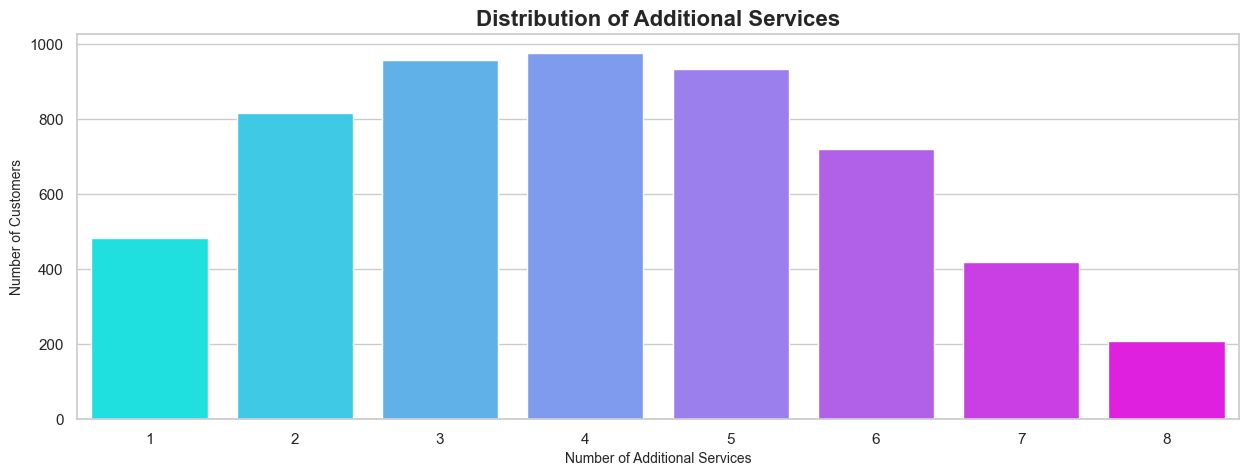

additional_service
1    0.503106
2    0.476716
3     0.37722
4    0.312883
5    0.257235
6    0.217452
7    0.116667
8    0.052885
Name: churn, dtype: Float64


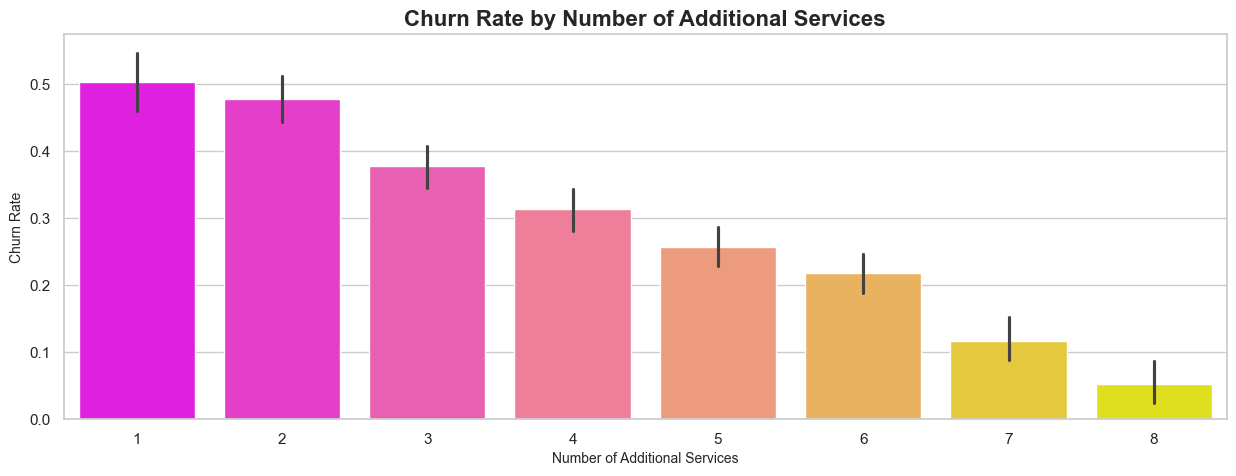

In [ ]:
churn_Rate=telecom[telecom['additional_service']!=0].groupby('additional_service').churn.mean().sort_index()
distrabution=telecom[telecom['additional_service']!=0].additional_service.value_counts(normalize=True).sort_index()

print(distrabution)
plt.figure(figsize=(15, 5))  
sns.countplot(x='additional_service', data=telecom[telecom['additional_service']!=0], palette='cool',hue='additional_service',legend=False)
plt.title('Distribution of Additional Services',fontsize=16,fontweight='bold')
plt.xlabel('Number of Additional Services',fontsize=10)
plt.ylabel('Number of Customers',fontsize=10)
plt.show()

print(churn_Rate)
plt.figure(figsize=(15, 5))  
sns.barplot(x='additional_service', y='churn', data=telecom[telecom['additional_service']!=0], palette='spring',hue='additional_service',legend=False)
plt.title('Churn Rate by Number of Additional Services',fontsize=16,fontweight='bold')
plt.xlabel('Number of Additional Services',fontsize=10)
plt.ylabel('Churn Rate',fontsize=10)
plt.show()



increasing customer engagement with additional services is a key strategy for reducing churn among internet service customers

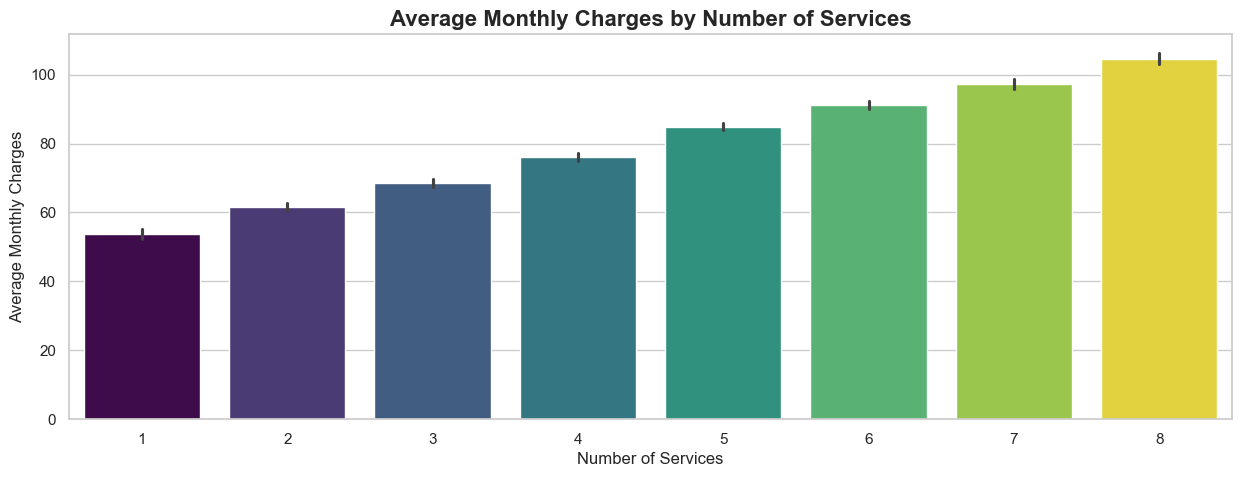

In [ ]:


# Plotting Monthly Charges by Number of Additional Services
plt.figure(figsize=(15, 5))
sns.barplot(x='additional_service', y='monthlycharges', data=telecom[telecom['additional_service']!=0], palette='viridis',hue='additional_service',legend=False)
plt.title('Average Monthly Charges by Number of Services',fontsize=16,fontweight='bold')
plt.xlabel('Number of Services', fontsize=12)
plt.ylabel('Average Monthly Charges', fontsize=12)
plt.show()


* Analysis of Monthly Charges by Number of Services
The bar plot above illustrates the average monthly charges based on the number of additional services (like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies) a customer subscribes to:

* Increase in Charges: There is a clear trend showing that the average monthly charges increase as the number of services increases.
This indicates that each additional service adds a noticeable amount to the monthly bill, which suggests these services are likely premium.


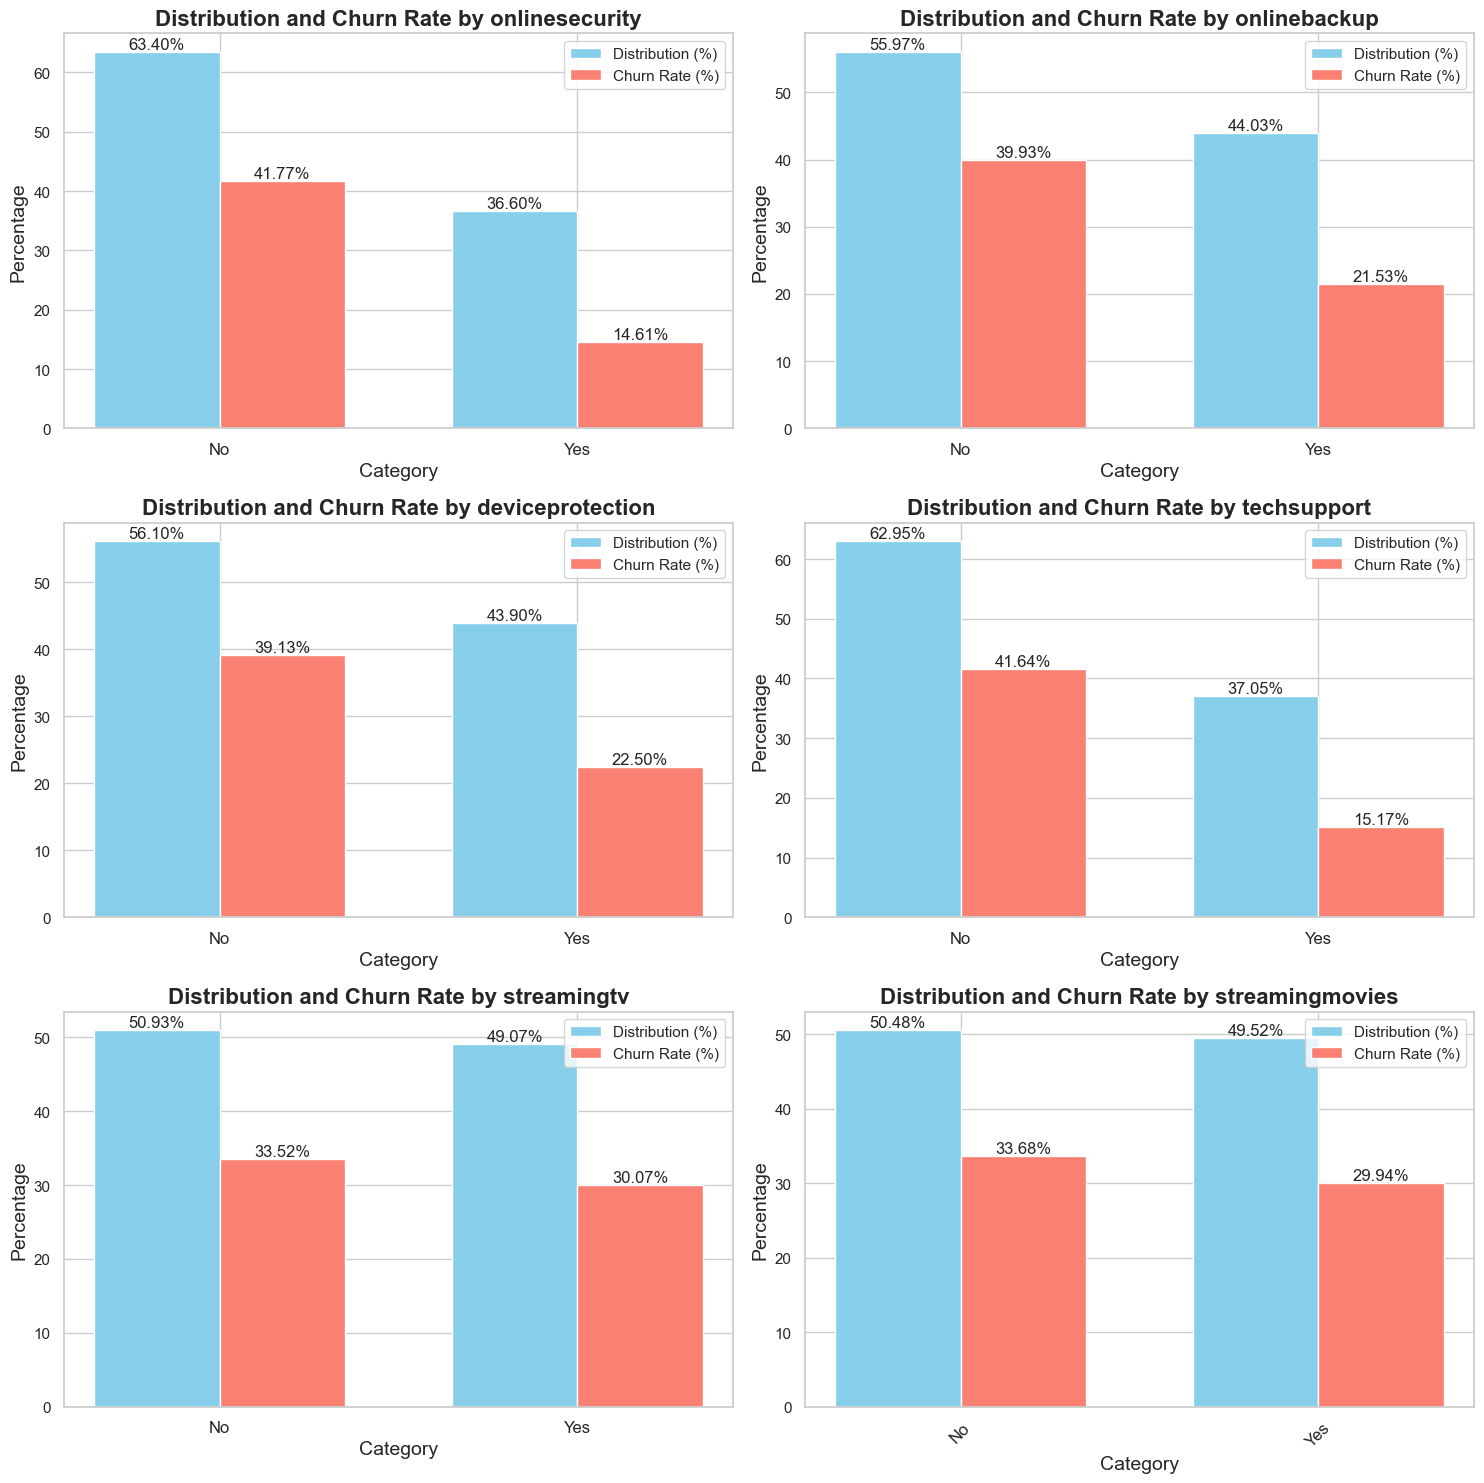

In [ ]:
additional_service_DF=telecom[telecom['additional_service']!=0]
features=['onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies']

df = (cal_dist_Churn_Rate(features,additional_service_DF).reset_index()).drop(columns='index',axis=1).sort_values(by=['Feature','Churn Rate'],ascending=[False,False]) 
bar_chart_dist_rate(features,df)


* Additional services such as online security, online backup, device protection, and tech support have a significant positive impact on reducing customer churn.
* Streaming services (TV and movies) also contribute to lower churn but to a lesser extent.
Promoting and encouraging the adoption of these additional services through targeted marketing, bundling, and highlighting their benefits can enhance customer retention and reduce churn rates.

## Calculate expected total charges based on tenure and monthly charges

count    7043.000000
mean       -0.152953
std        67.202778
min      -373.250000
25%       -28.500000
50%         0.000000
75%        28.600000
max       370.850000
Name: difference, dtype: float64


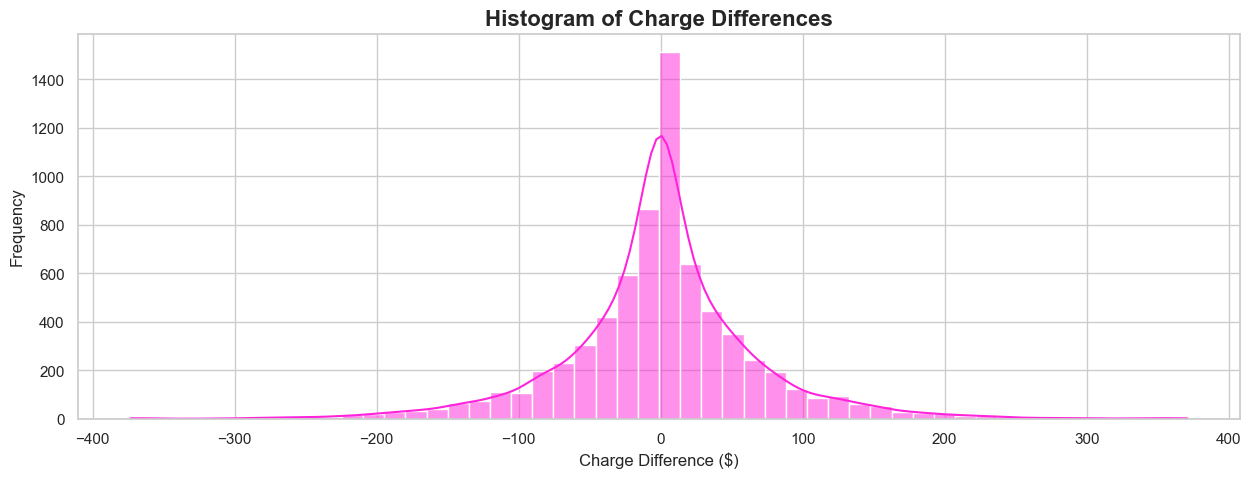

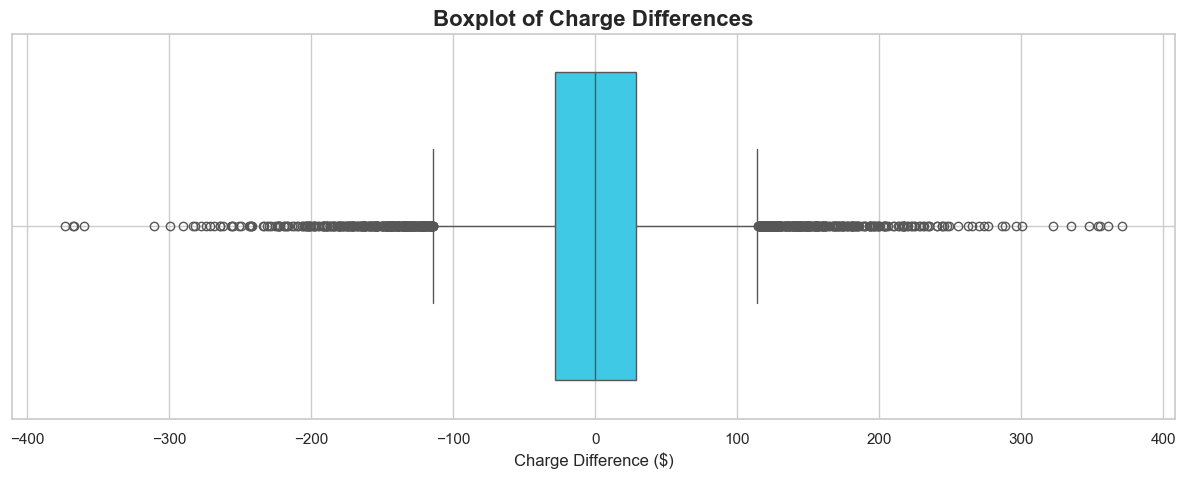

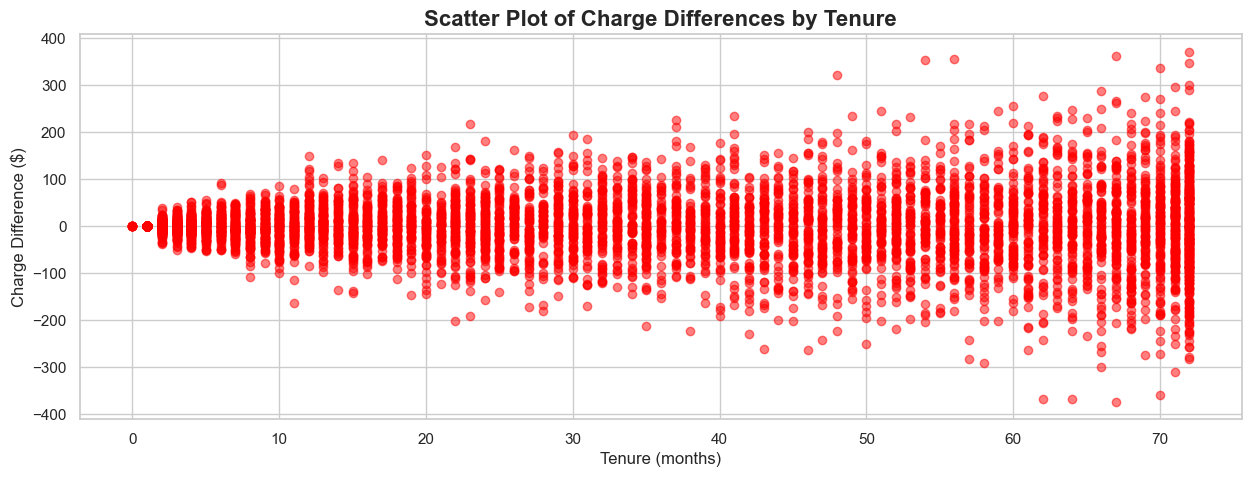

In [ ]:

telecom['expected_charges'] = telecom['tenure'] * telecom['monthlycharges']
telecom['difference'] = telecom['expected_charges'] - telecom['totalcharges']

print(telecom['difference'].describe())

sns.set_palette("spring")

# Histogram for distribution of charge differences
plt.figure(figsize=(15, 5))
sns.histplot(telecom['difference'], bins=50, kde=True)
plt.title('Histogram of Charge Differences',fontsize=16,fontweight='bold')
plt.xlabel('Charge Difference ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


sns.set_palette("cool")

# Boxplot for spread and outliers
plt.figure(figsize=((15, 5)))
sns.boxplot(x=telecom['difference'])
plt.title('Boxplot of Charge Differences',fontsize=16,fontweight='bold')
plt.xlabel('Charge Difference ($)')
plt.grid(True)
plt.show()

# Scatter plot for charge difference by tenure
plt.figure(figsize=(15, 5))
plt.scatter(telecom['tenure'], telecom['difference'], alpha=0.5, color='red')
plt.title('Scatter Plot of Charge Differences by Tenure',fontsize=16,fontweight='bold')
plt.xlabel('Tenure (months)')
plt.ylabel('Charge Difference ($)')
plt.grid(True)
plt.show()






* Histogram of Charge Differences:
The distribution of charge differences is roughly symmetric and centered around zero, which suggests that for the majority of customers, the expected charges based on tenure and monthly charges closely match the actual total charges.
There is a notable frequency of cases where the actual charges are slightly higher than expected (positive difference) as well as cases where they are lower (negative difference), indicating some level of discrepancy in billing or data entry.
* Boxplot of Charge Differences:
The median line in the boxplot is very close to zero, which supports the finding that for most customers, the expected and actual charges are aligned.
There are several outliers on both the positive and negative sides, with discrepancies ranging broadly from  -373 to +370 dollars. 
* Scatter Plot of Charge Differences by Tenure:
The scatter plot does not indicate any clear trend of charge differences increasing or decreasing with tenure. The spread of discrepancies remains fairly consistent across different tenures.
The range of discrepancies remains wide across all tenure lengths, but there's no concentration of high discrepancies at any specific tenure, suggesting that billing issues may not be directly related to the length of customer service.

### paid_status- how the actual payment compares to the expected charges

paid_status
paid less       3214
paid more       3204
paid exactly     625
Name: count, dtype: int64


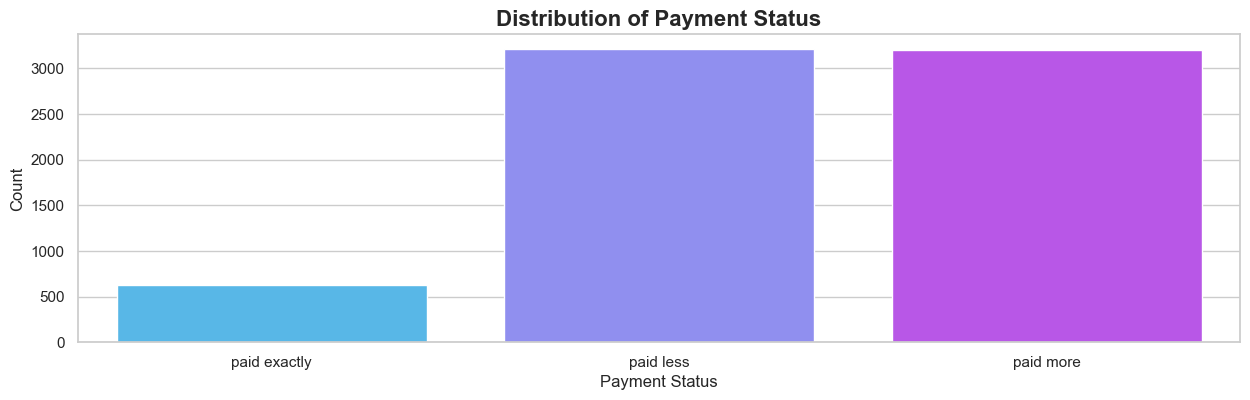

paid_status
paid exactly        60.96
paid less       23.335408
paid more       23.033708
Name: churn, dtype: Float64


difference                  totalcharges               \
                    sum       mean count          sum         mean   
paid_status                                                          
paid exactly       0.00   0.000000   625      32459.0    51.934400   
paid less     157994.85  49.158323  3214    7780092.6  2420.688426   
paid more    -159072.10 -49.647971  3204    8243617.1  2572.914201   

             expected_charges               
                          sum         mean  
paid_status                                 
paid exactly         32459.00    51.934400  
paid less          7938087.45  2469.846749  
paid more          8084545.00  2523.266230

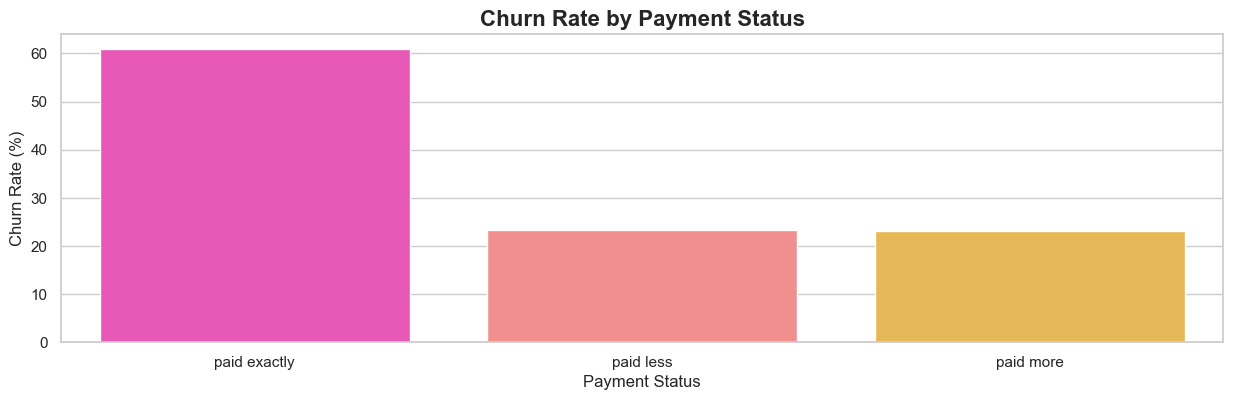

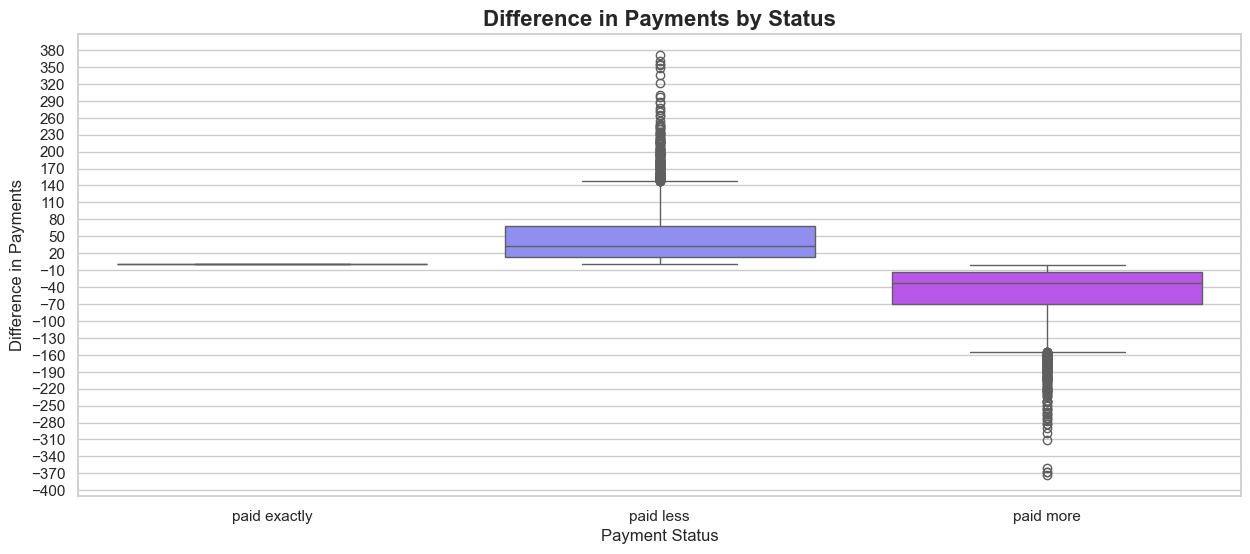

In [ ]:
telecom['paid_status']='None'
telecom.loc[telecom.difference>0,'paid_status']='paid less'
telecom.loc[telecom.difference<0,'paid_status']='paid more'
telecom.loc[telecom.difference==0,'paid_status']='paid exactly'

paid_status_distribution = telecom.loc[telecom.paid_status!='None','paid_status'].value_counts() 

churn_rates = telecom.groupby('paid_status',observed=True)['churn'].mean() * 100

# Create a count plot for the 'paid_status' column
plt.figure(figsize=(15, 4))
sns.countplot(x='paid_status', data=telecom, order=['paid exactly', 'paid less', 'paid more'],palette='cool',hue='paid_status')
plt.title('Distribution of Payment Status',fontsize=16,fontweight='bold')
plt.xlabel('Payment Status')
plt.ylabel('Count')
print(paid_status_distribution)
plt.show()

# Plot the churn rate by payment status
plt.figure(figsize=(15, 4))
sns.barplot(x=churn_rates.index, y=churn_rates.values, order=['paid exactly', 'paid less', 'paid more'],palette='spring',hue=churn_rates.index)
plt.title('Churn Rate by Payment Status',fontsize=16,fontweight='bold')
plt.xlabel('Payment Status')
plt.ylabel('Churn Rate (%)')
print(churn_rates)

# Boxplot to see the spread of differences by 'paid_status'
plt.figure(figsize=(15, 6))
sns.boxplot(x='paid_status', y='difference', data=telecom, order=['paid exactly', 'paid less', 'paid more'],palette='cool',hue='paid_status')
plt.title('Difference in Payments by Status',fontsize=16,fontweight='bold')
plt.xlabel('Payment Status')
plt.yticks(list(range(-400,400,30)))
plt.ylabel('Difference in Payments')


telecom.groupby('paid_status').agg({'difference':['sum','mean','count'],'totalcharges':['sum','mean'],'expected_charges':['sum','mean']})



In [ ]:
telecom[['totalcharges','expected_charges']].corr()


totalcharges  expected_charges
totalcharges          1.000000          0.999561
expected_charges      0.999561          1.000000

# 2. Data Preperation & Correlations

## Load Data & Data Cleaning & Checking missing values

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
telecom=pd.read_csv('churn.csv')
telecom=telecom.rename(columns=str.lower)
telecom.churn=telecom.churn.map({'Yes':1,'No':0})
telecom['totalcharges'] = telecom['totalcharges'].replace(" ", 0).astype(float) # As shown in EDA
customerid=telecom.customerid #  we kept 'customerid' column
telecom.isnull().sum() 
telecom.drop(columns='customerid',axis=1,inplace=True) # customerid-doesn't provide predictive power for churn analysis and can be dropped.

**Checking missing values!**

In [216]:
# No missing values!
telecom.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

**One-Hot Encoding Categorical Variables**

In [217]:
telecom_dummies = pd.get_dummies(telecom)

# No missing values!
telecom_dummies.isnull().sum().sort_values(ascending=False)

seniorcitizen                              0
streamingmovies_No                         0
deviceprotection_No                        0
deviceprotection_No internet service       0
deviceprotection_Yes                       0
techsupport_No                             0
techsupport_No internet service            0
techsupport_Yes                            0
streamingtv_No                             0
streamingtv_No internet service            0
streamingtv_Yes                            0
streamingmovies_No internet service        0
tenure                                     0
streamingmovies_Yes                        0
contract_Month-to-month                    0
contract_One year                          0
contract_Two year                          0
paperlessbilling_No                        0
paperlessbilling_Yes                       0
paymentmethod_Bank transfer (automatic)    0
paymentmethod_Credit card (automatic)      0
paymentmethod_Electronic check             0
onlineback

In [218]:
# Check data type for all colums- there is 41 columns with data type boolean 
telecom_dummies.dtypes.value_counts()

bool       41
int64       3
float64     2
Name: count, dtype: int64

Convert all boolean columns to int64

In [219]:
boolean=pd.DataFrame(telecom_dummies.dtypes[telecom_dummies.dtypes==bool])
boolean=boolean.index.tolist()
for col in boolean:
    telecom_dummies[col]=telecom_dummies[col].astype('int64')

## Data Preperation 

### Drop columns

**According EDA**- onlinesecurity onlinebackup deviceprotection, same correlations- dropping _Yes 

In [220]:
telecom_dummies[['onlinesecurity_Yes','onlinesecurity_No','onlinebackup_Yes','onlinebackup_No','deviceprotection_Yes','deviceprotection_No','techsupport_Yes','techsupport_No','churn']].corr()

onlinesecurity_Yes  onlinesecurity_No  onlinebackup_Yes  \
onlinesecurity_Yes              1.000000          -0.629717          0.283832   
onlinesecurity_No              -0.629717           1.000000          0.057715   
onlinebackup_Yes                0.283832           0.057715          1.000000   
onlinebackup_No                 0.004917           0.378468         -0.641122   
deviceprotection_Yes            0.275438           0.064615          0.303546   
deviceprotection_No             0.013136           0.371808          0.026236   
techsupport_Yes                 0.354931          -0.043911          0.294233   
techsupport_No                 -0.047477           0.470359          0.047336   
churn                          -0.171226           0.342637         -0.082255   

                      onlinebackup_No  deviceprotection_Yes  \
onlinesecurity_Yes           0.004917              0.275438   
onlinesecurity_No            0.378468              0.064615   
onlinebackup_Yes            -0.641122              0.303546   
onlinebackup_No              1.000000              0.025346   
deviceprotection_Yes         0.025346              1.000000   
deviceprotection_No          0.361488             -0.641004   
techsupport_Yes             -0.002642              0.333313   
techsupport_No               0.385341              0.011168   
churn                        0.268005             -0.066160   

                      deviceprotection_No  techsupport_Yes  techsupport_No  \
onlinesecurity_Yes               0.013136         0.354931       -0.047477   
onlinesecurity_No                0.371808        -0.043911        0.470359   
onlinebackup_Yes                 0.026236         0.294233        0.047336   
onlinebackup_No                  0.361488        -0.002642        0.385341   
deviceprotection_Yes            -0.641004         0.333313        0.011168   
deviceprotection_No              1.000000        -0.039850        0.419892   
techsupport_Yes                 -0.039850         1.000000       -0.630692   
techsupport_No                   0.419892        -0.630692        1.000000   
churn                            0.252481        -0.164674        0.337281   

                         churn  
onlinesecurity_Yes   -0.171226  
onlinesecurity_No     0.342637  
onlinebackup_Yes     -0.082255  
onlinebackup_No       0.268005  
deviceprotection_Yes -0.066160  
deviceprotection_No   0.252481  
techsupport_Yes      -0.164674  
techsupport_No        0.337281  
churn                 1.000000

In [221]:
# onlinesecurity onlinebackup deviceprotection, techsupport- choosing no, and drop yes
telecom_dummies.drop(columns=['onlinesecurity_Yes','onlinebackup_Yes','deviceprotection_Yes','techsupport_Yes'],inplace=True)

**Binary Pairs:** - Only one column from each pair is needed because they are perfectly negatively correlated 
* **Partner**, **Dependents**, **PhoneService**, **PaperlessBilling**,**streamingtv**, **streamingmovies**<br>

In [222]:
telecom_dummies[['partner_No', 'partner_Yes','dependents_No', 'dependents_Yes','phoneservice_No','phoneservice_Yes','paperlessbilling_No', 'paperlessbilling_Yes',
            'churn' ]].corr()['churn']

partner_No              0.150448
partner_Yes            -0.150448
dependents_No           0.164221
dependents_Yes         -0.164221
phoneservice_No        -0.011942
phoneservice_Yes        0.011942
paperlessbilling_No    -0.191825
paperlessbilling_Yes    0.191825
churn                   1.000000
Name: churn, dtype: float64

In [223]:
cols_to_drop = ['partner_No', 'dependents_No', 'phoneservice_No', 'paperlessbilling_No',
                'streamingtv_No','streamingmovies_No']
telecom_dummies.drop(cols_to_drop,axis=1,inplace=True)

**'multiplelines_No phone service'** and **'phoneservice_Yes'**  have the same correlation but oppesite, so we drop **multiplelines_No phone service**	<br>

**'internetservice_No'** have the same correlation with: <br> **'onlinesecurity_No internet service'**, **'onlinebackup_No internet service'**, **'deviceprotection_No internet service'**, **'techsupport_No internet service'**, **'streamingtv_No internet service'**, 
**'streamingmovies_No internet service'** <br>

Droping these columns

In [224]:
# have the same correlation but oppesite - dropping multiplelines_No phone service
telecom_dummies[['multiplelines_No phone service','phoneservice_Yes','churn']].corr()['churn']

multiplelines_No phone service   -0.011942
phoneservice_Yes                  0.011942
churn                             1.000000
Name: churn, dtype: float64

In [225]:
# have the same correlation but oppesite
telecom_dummies[['internetservice_No','onlinesecurity_No internet service','onlinebackup_No internet service','deviceprotection_No internet service',
                'techsupport_No internet service', 'streamingtv_No internet service','streamingmovies_No internet service','churn']].corr()['churn']

internetservice_No                     -0.22789
onlinesecurity_No internet service     -0.22789
onlinebackup_No internet service       -0.22789
deviceprotection_No internet service   -0.22789
techsupport_No internet service        -0.22789
streamingtv_No internet service        -0.22789
streamingmovies_No internet service    -0.22789
churn                                   1.00000
Name: churn, dtype: float64

In [226]:

cols_to_drop=['multiplelines_No phone service', 'onlinesecurity_No internet service',
                            'onlinebackup_No internet service','deviceprotection_No internet service',
                              'techsupport_No internet service', 'streamingtv_No internet service',
                              'streamingmovies_No internet service']

telecom_dummies.drop(cols_to_drop,axis=1,inplace=True)

In [227]:
telecom_dummies.shape
# Having 29 columns

(7043, 29)

### Combining partner and dependents- new feature partner_Dependents

**Combining partner_Yes and dependents_Yes into a single feature** 
Partner_Yes and Dependents_Yes are moderately correlated with each other (0.453)

2 option:<br>

**option 1:** <br>
0-  No partner and no dependents.<br>
1- Partner or dependents.<br>
2- Partner and dependents.<br>

 
**option 2:** <br>
0- both no
1- both yes

we'll check the result



In [228]:
telecom_dummies[['partner_Yes','dependents_Yes','churn']].corr()

partner_Yes  dependents_Yes     churn
partner_Yes        1.000000        0.452676 -0.150448
dependents_Yes     0.452676        1.000000 -0.164221
churn             -0.150448       -0.164221  1.000000

In [229]:
telecom_dummies['partner_Dependents_'] = (telecom_dummies['partner_Yes'] * telecom_dummies['dependents_Yes'])
telecom_dummies['partner_Dependents'] = (telecom_dummies['partner_Yes'] + telecom_dummies['dependents_Yes'])

In [230]:
# Creating a new feature 'partner_Dependents' that captures the different combinations of Partner and Dependents

telecom_dummies[['partner_Yes','dependents_Yes','partner_Dependents','partner_Dependents_','churn']].corr()

# partner_Dependents show correlation of -0.184 with Churn
# partner_Dependents_  show correlation of -0.164221 with Churn
# partner_Dependents have stronger correlation with Churn so we'll drop partner_Dependents_,partner_Yes,partner_Yes
# add the new feature partner_Dependents

partner_Yes  dependents_Yes  partner_Dependents  \
partner_Yes             1.000000        0.452676            0.865905   
dependents_Yes          0.452676        1.000000            0.837998   
partner_Dependents      0.865905        0.837998            1.000000   
partner_Dependents_     0.594629        0.878855            0.856909   
churn                  -0.150448       -0.164221           -0.184193   

                     partner_Dependents_     churn  
partner_Yes                     0.594629 -0.150448  
dependents_Yes                  0.878855 -0.164221  
partner_Dependents              0.856909 -0.184193  
partner_Dependents_             1.000000 -0.160124  
churn                          -0.160124  1.000000

In [231]:
telecom_dummies.drop(['partner_Yes', 'dependents_Yes','partner_Dependents_'], axis=1,inplace=True)

### Combine StreamingTV and StreamingMovies- new feature StreamingServices

In [232]:
telecom_dummies.columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn',
       'gender_Female', 'gender_Male', 'phoneservice_Yes', 'multiplelines_No',
       'multiplelines_Yes', 'internetservice_DSL',
       'internetservice_Fiber optic', 'internetservice_No',
       'onlinesecurity_No', 'onlinebackup_No', 'deviceprotection_No',
       'techsupport_No', 'streamingtv_Yes', 'streamingmovies_Yes',
       'contract_Month-to-month', 'contract_One year', 'contract_Two year',
       'paperlessbilling_Yes', 'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'partner_Dependents'],
      dtype='object')

In [233]:
# Create a combined feature 'StreamingServices' by adding the two services

telecom_dummies['StreamingServices'] = telecom_dummies['streamingtv_Yes'] + telecom_dummies['streamingmovies_Yes']

In [234]:
# Calculate the correlation of this new feature with churn
# StreamingServices 0.071162 vs streamingtv_Yes 0.063228 streamingmovies_Yes 0.061382
# The correlation suggests that customers who are more engaged with the provider's streaming offerings tend to not stay with the service longer

telecom_dummies[['streamingtv_Yes','streamingmovies_Yes','StreamingServices','churn']].corr()['churn']

streamingtv_Yes        0.063228
streamingmovies_Yes    0.061382
StreamingServices      0.071162
churn                  1.000000
Name: churn, dtype: float64

In [235]:
telecom_dummies.drop(['streamingtv_Yes','streamingmovies_Yes'],axis=1,inplace=True)

### Dropping Tenure


In [236]:
telecom_dummies[['totalcharges','monthlycharges','tenure','churn']].corr()

totalcharges  monthlycharges    tenure     churn
totalcharges        1.000000        0.651174  0.826178 -0.198324
monthlycharges      0.651174        1.000000  0.247900  0.193356
tenure              0.826178        0.247900  1.000000 -0.352229
churn              -0.198324        0.193356 -0.352229  1.000000

High correlation (0.83) likely because total charges accumulate over time. While both are important, TotalCharges might be considered more comprehensive as it inherently includes tenure information (higher tenure typically leads to higher total charges). so We drop tenure.
In addition, as we saw in the EDA analysis - calculated value of tenure * monthlycharges does not match totalcharges

In [237]:
telecom_dummies.drop('tenure',axis=1,inplace=True)

### PaymentMethod - new feature "PaymentMethod_automatic"

Using electronic checks (0.30) is associated with higher churn, which might reflect a customer segment that prefers 
non-contractual or month-to-month payments.

In [238]:
telecom_dummies[['paymentmethod_Bank transfer (automatic)','paymentmethod_Credit card (automatic)','paymentmethod_Electronic check', 'paymentmethod_Mailed check','churn']].corr()['churn']

paymentmethod_Bank transfer (automatic)   -0.117937
paymentmethod_Credit card (automatic)     -0.134302
paymentmethod_Electronic check             0.301919
paymentmethod_Mailed check                -0.091683
churn                                      1.000000
Name: churn, dtype: float64

In [239]:
# Group payment methods into electronic vs non-electronic
telecom_dummies['PaymentMethod_electronic'] = telecom_dummies['paymentmethod_Electronic check']+telecom_dummies['paymentmethod_Bank transfer (automatic)'] + telecom_dummies['paymentmethod_Credit card (automatic)']

telecom_dummies['PaymentMethod_Not_electronic'] = telecom_dummies['paymentmethod_Mailed check']

# Group payment methods intoAutomatic vs. Not Automatic
telecom_dummies['PaymentMethod_automatic'] = telecom_dummies['paymentmethod_Bank transfer (automatic)'] + telecom_dummies['paymentmethod_Credit card (automatic)']
telecom_dummies['PaymentMethod_Not_automatic'] = telecom_dummies['paymentmethod_Mailed check']+telecom_dummies['paymentmethod_Electronic check']




In [240]:
corr_matrix=['PaymentMethod_automatic','PaymentMethod_Not_automatic','PaymentMethod_electronic','PaymentMethod_Not_electronic','paymentmethod_Bank transfer (automatic)','paymentmethod_Credit card (automatic)','paymentmethod_Electronic check','paymentmethod_Mailed check','churn']

telecom_dummies[corr_matrix].corr()['churn']


PaymentMethod_automatic                   -0.209902
PaymentMethod_Not_automatic                0.209902
PaymentMethod_electronic                   0.091683
PaymentMethod_Not_electronic              -0.091683
paymentmethod_Bank transfer (automatic)   -0.117937
paymentmethod_Credit card (automatic)     -0.134302
paymentmethod_Electronic check             0.301919
paymentmethod_Mailed check                -0.091683
churn                                      1.000000
Name: churn, dtype: float64

* Automatic payments might be more convenient, leading to higher satisfaction and lower churn
* grouping payment methods into Automatic and Not Automatic seems to be more beneficial for analyzing 

In [241]:
col_drop=['PaymentMethod_electronic','PaymentMethod_Not_electronic','paymentmethod_Bank transfer (automatic)','paymentmethod_Credit card (automatic)','paymentmethod_Electronic check','paymentmethod_Mailed check']

telecom_dummies.drop(col_drop,inplace=True,axis=1)

In [242]:
telecom_dummies[['PaymentMethod_automatic','PaymentMethod_Not_automatic','churn']].corr()

PaymentMethod_automatic  \
PaymentMethod_automatic                     1.000000   
PaymentMethod_Not_automatic                -1.000000   
churn                                      -0.209902   

                             PaymentMethod_Not_automatic     churn  
PaymentMethod_automatic                        -1.000000 -0.209902  
PaymentMethod_Not_automatic                     1.000000  0.209902  
churn                                           0.209902  1.000000

The correlation matrix shows perfect negative correlation (-1.00000) between PaymentMethod_automatic and PaymentMethod_Not_automatic. This is expected because these two features are likely inversely related—when one is true, the other is false—and they effectively represent the same information in opposite forms. 
* drop PaymentMethod_Not_automatic'

In [243]:
telecom_dummies.drop('PaymentMethod_Not_automatic',inplace=True,axis=1)

### Dropping multiplelines_No

highly correlated (0.82). Since these are direct opposites, we should keep only one. Dropping MultipleLines_No could be a good choice as MultipleLines_Yes directly indicates whether customers have multiple lines

* Phone Service: The correlation of phone service with churn being nearly zero suggests that whether or not a customer has phone service doesn't significantly affect their likelihood to churn. This indicates that other factors beyond the mere availability of service are more crucial for churn prediction.

* Multiple Lines: The slight negative correlation of "multiplelines_No" with churn and the slight positive correlation of "multiplelines_Yes" with churn might suggest that customers who opt for multiple lines are slightly more at risk of churning, potentially due to higher costs or complex service issues.


In [244]:
telecom_dummies[['phoneservice_Yes', 'multiplelines_No','multiplelines_Yes','churn']].corr()

phoneservice_Yes  multiplelines_No  multiplelines_Yes  \
phoneservice_Yes           1.000000          0.315431           0.279690   
multiplelines_No           0.315431          1.000000          -0.822853   
multiplelines_Yes          0.279690         -0.822853           1.000000   
churn                      0.011942         -0.032569           0.040102   

                      churn  
phoneservice_Yes   0.011942  
multiplelines_No  -0.032569  
multiplelines_Yes  0.040102  
churn              1.000000

In [245]:
telecom_dummies.drop('multiplelines_No',inplace=True,axis=1)

### Additional services - New feature

In [246]:
telecom_dummies.loc[telecom_dummies.internetservice_No==0,'Additional_Services'] = ((1-telecom_dummies['onlinesecurity_No']) +(1-telecom_dummies['onlinebackup_No'])+(1-telecom_dummies['deviceprotection_No'])+(1-telecom_dummies['techsupport_No']) +(telecom_dummies['StreamingServices'])+(1-telecom_dummies['internetservice_No']))
telecom_dummies.loc[telecom_dummies.internetservice_No==1,'Additional_Services']=0
services=['churn','Additional_Services','internetservice_No','onlinesecurity_No','onlinebackup_No','deviceprotection_No','multiplelines_Yes','techsupport_No','StreamingServices']

telecom_dummies[services].corr()


churn  Additional_Services  internetservice_No  \
churn                1.000000            -0.032243           -0.227890   
Additional_Services -0.032243             1.000000           -0.702091   
internetservice_No  -0.227890            -0.702091            1.000000   
onlinesecurity_No    0.342637             0.067764           -0.522429   
onlinebackup_No      0.268005            -0.010695           -0.464720   
deviceprotection_No  0.252481            -0.068460           -0.465658   
multiplelines_Yes    0.040102             0.293183           -0.210564   
techsupport_No       0.337281             0.010459           -0.518733   
StreamingServices    0.071162             0.782346           -0.476416   

                     onlinesecurity_No  onlinebackup_No  deviceprotection_No  \
churn                         0.342637         0.268005             0.252481   
Additional_Services           0.067764        -0.010695            -0.068460   
internetservice_No           -0.522429        -0.464720            -0.465658   
onlinesecurity_No             1.000000         0.378468             0.371808   
onlinebackup_No               0.378468         1.000000             0.361488   
deviceprotection_No           0.371808         0.361488             1.000000   
multiplelines_Yes             0.084766        -0.018908            -0.017718   
techsupport_No                0.470359         0.385341             0.419892   
StreamingServices             0.204742         0.091053            -0.037964   

                     multiplelines_Yes  techsupport_No  StreamingServices  
churn                         0.040102        0.337281           0.071162  
Additional_Services           0.293183        0.010459           0.782346  
internetservice_No           -0.210564       -0.518733          -0.476416  
onlinesecurity_No             0.084766        0.470359           0.204742  
onlinebackup_No              -0.018908        0.385341           0.091053  
deviceprotection_No          -0.017718        0.419892          -0.037964  
multiplelines_Yes             1.000000        0.082211           0.294625  
techsupport_No                0.082211        1.000000           0.103588  
StreamingServices             0.294625        0.103588           1.000000

In [247]:
telecom_dummies.shape

(7043, 23)

# 2.1 Finding interesting relationships

What is the label distibution

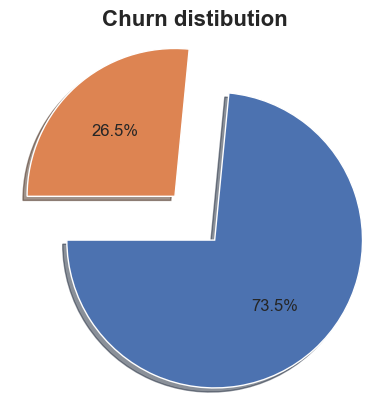

In [248]:
datas = telecom_dummies["churn"].value_counts(sort = True)
explode = [0.2,0.2]

plt.pie(datas, explode=explode,  autopct='%1.1f%%', shadow=True, startangle=180)
plt.title('Churn distibution',fontsize=16,fontweight='bold')
plt.show()

 ~27% of the customers churned

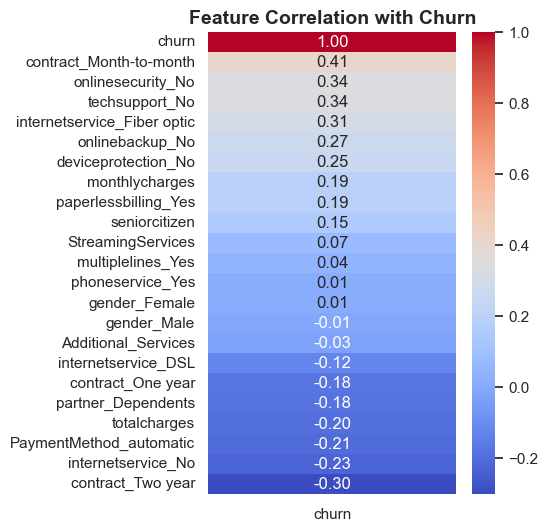

In [249]:
correlation_matrix = telecom_dummies.corr()

churn_correlations = correlation_matrix['churn'].sort_values(ascending=False)

# Plotting the correlation with 'Churn_Yes'
plt.figure(figsize=(4, 6))
sns.heatmap(correlation_matrix[['churn']].sort_values(by='churn', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation with Churn',fontsize=14,fontweight='bold')
plt.show()

#churn_correlations

The heatmap and bar plot of absolute correlations with churn reaffirm that month-to-month contracts, lack of online security and tech support, and the use of fiber optic internet service are significant factors in customer churn

contract_Month-to-month        0.405103
onlinesecurity_No              0.342637
techsupport_No                 0.337281
internetservice_Fiber optic    0.308020
onlinebackup_No                0.268005
deviceprotection_No            0.252481
monthlycharges                 0.193356
paperlessbilling_Yes           0.191825
seniorcitizen                  0.150889
StreamingServices              0.071162
multiplelines_Yes              0.040102
phoneservice_Yes               0.011942
gender_Female                  0.008612
gender_Male                   -0.008612
Additional_Services           -0.032243
internetservice_DSL           -0.124214
contract_One year             -0.177820
partner_Dependents            -0.184193
totalcharges                  -0.198324
PaymentMethod_automatic       -0.209902
internetservice_No            -0.227890
contract_Two year             -0.302253
Name: churn, dtype: float64


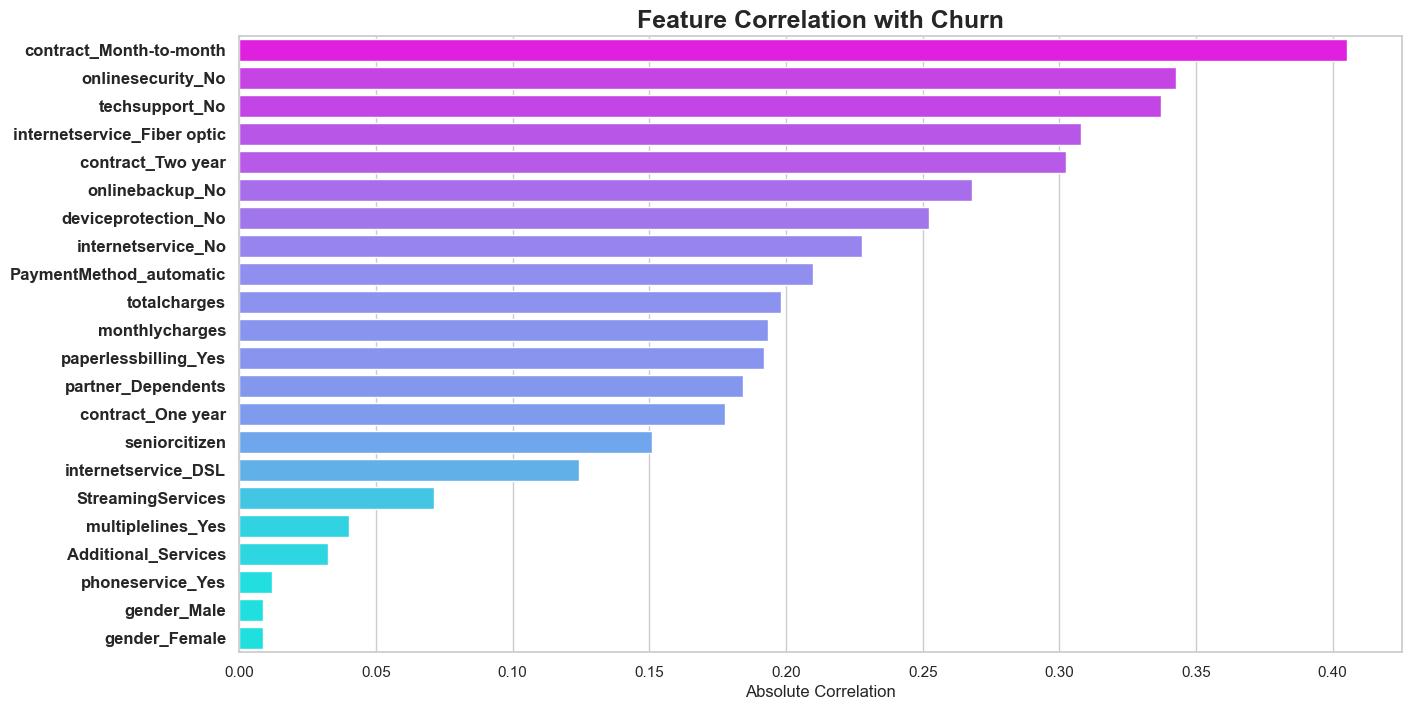

In [250]:
sort = telecom_dummies.corr()['churn'].drop('churn')
sort = sort.sort_values(ascending=False)
sort_abs =abs( sort.sort_values(ascending=False)).sort_values(ascending=False)

print(sort)
plt.figure(figsize=(15, 8))
sns.barplot(x=sort_abs.values, y=sort_abs.index, palette='cool', hue=sort_abs.values, dodge=False, legend=False)
plt.title("Feature Correlation with Churn",fontsize=18,fontweight='bold')
plt.xlabel("Absolute Correlation")
plt.ylabel("",fontsize=12)
plt.yticks(fontsize=12,fontweight='bold')
plt.show()

#sns.barplot(x=sort_abs.values, y=sort_abs.index, palette='cool',hue=sort_abs.values,legend=False)


* **Contract Type**<br>
Month-to-month contracts have the highest positive correlation with churn (0.405), indicating that customers with month-to-month contracts are more likely to churn.
Two-year contracts have a negative correlation with churn (-0.302), suggesting that customers with longer contracts are less likely to churn.
* **internet Service**<br>
*Fiber optic* internet service shows a significant positive correlation with churn (0.308). This might be due to higher costs or service issues.<br>
*No internet* service is negatively correlated with churn, indicating that customers without internet service are less likely to churn, though this could be due to a smaller segment size.
* **Online Security and Tech Support:**<br>
Lack of online security (0.343) and lack of tech support (0.337) are both positively correlated with churn. This suggests that customers without these services are more likely to leave.
* **Payment Method:**<br>
*Electronic check* payment method has a positive correlation with churn (0.302), indicating that customers who use this payment method are more likely to churn compared to those using automatic payment methods like bank transfer or credit card.
* **online backup & device protection:**<br>
Lack of online backup (0.268) and lack of device protection (0.252) are also positively correlated with churn, suggesting the importance of these additional services in customer retention.
* **Monthly and Total Charges:**<br>
Monthly charges (0.193) and total charges (0.198) have a positive but smaller correlation with churn, indicating that higher charges may contribute to churn but are not the primary factors.
* **Demographics**<br>
*Senior citizen* status has a smaller positive correlation (0.151) with churn, indicating that senior citizens are slightly more likely to churn.<br>
*Dependents* & *partner* status have smaller correlations, suggesting that while these factors do influence churn, they are not the strongest predictors.<br>
* **gender, phone service, and multiple lines** have very low correlations with churn, indicating they have little to no impact on whether a customer will churn.



Feature  Category  Distribution  Churn Rate
0       contract_Month-to-month       1.0     55.019168   42.709677
1   internetservice_Fiber optic       1.0     43.958540   41.892765
2             onlinesecurity_No       1.0     49.666335   41.766724
3                 seniorcitizen       1.0     16.214681   41.681261
4                techsupport_No       1.0     49.311373   41.635474
5               onlinebackup_No       1.0     43.844952   39.928756
6           deviceprotection_No       1.0     43.944342   39.127625
7       PaymentMethod_automatic       0.0     56.467414   34.674378
8            partner_Dependents       0.0     46.571063   34.237805
9             contract_Two year       0.0     75.933551   34.050112
10         paperlessbilling_Yes       1.0     59.221922   33.565092
11           internetservice_No       0.0     78.333097   31.828893
12            StreamingServices       1.0     22.135454   31.430404
13            contract_One year       0.0     79.085617   30.574506
14          internetservice_DSL       0.0     65.625444   30.506274
15            multiplelines_Yes       1.0     42.183729   28.609896
16                gender_Female       1.0     49.524350   26.920872
17                  gender_Male       0.0     49.524350   26.920872
18             phoneservice_Yes       1.0     90.316626   26.709637

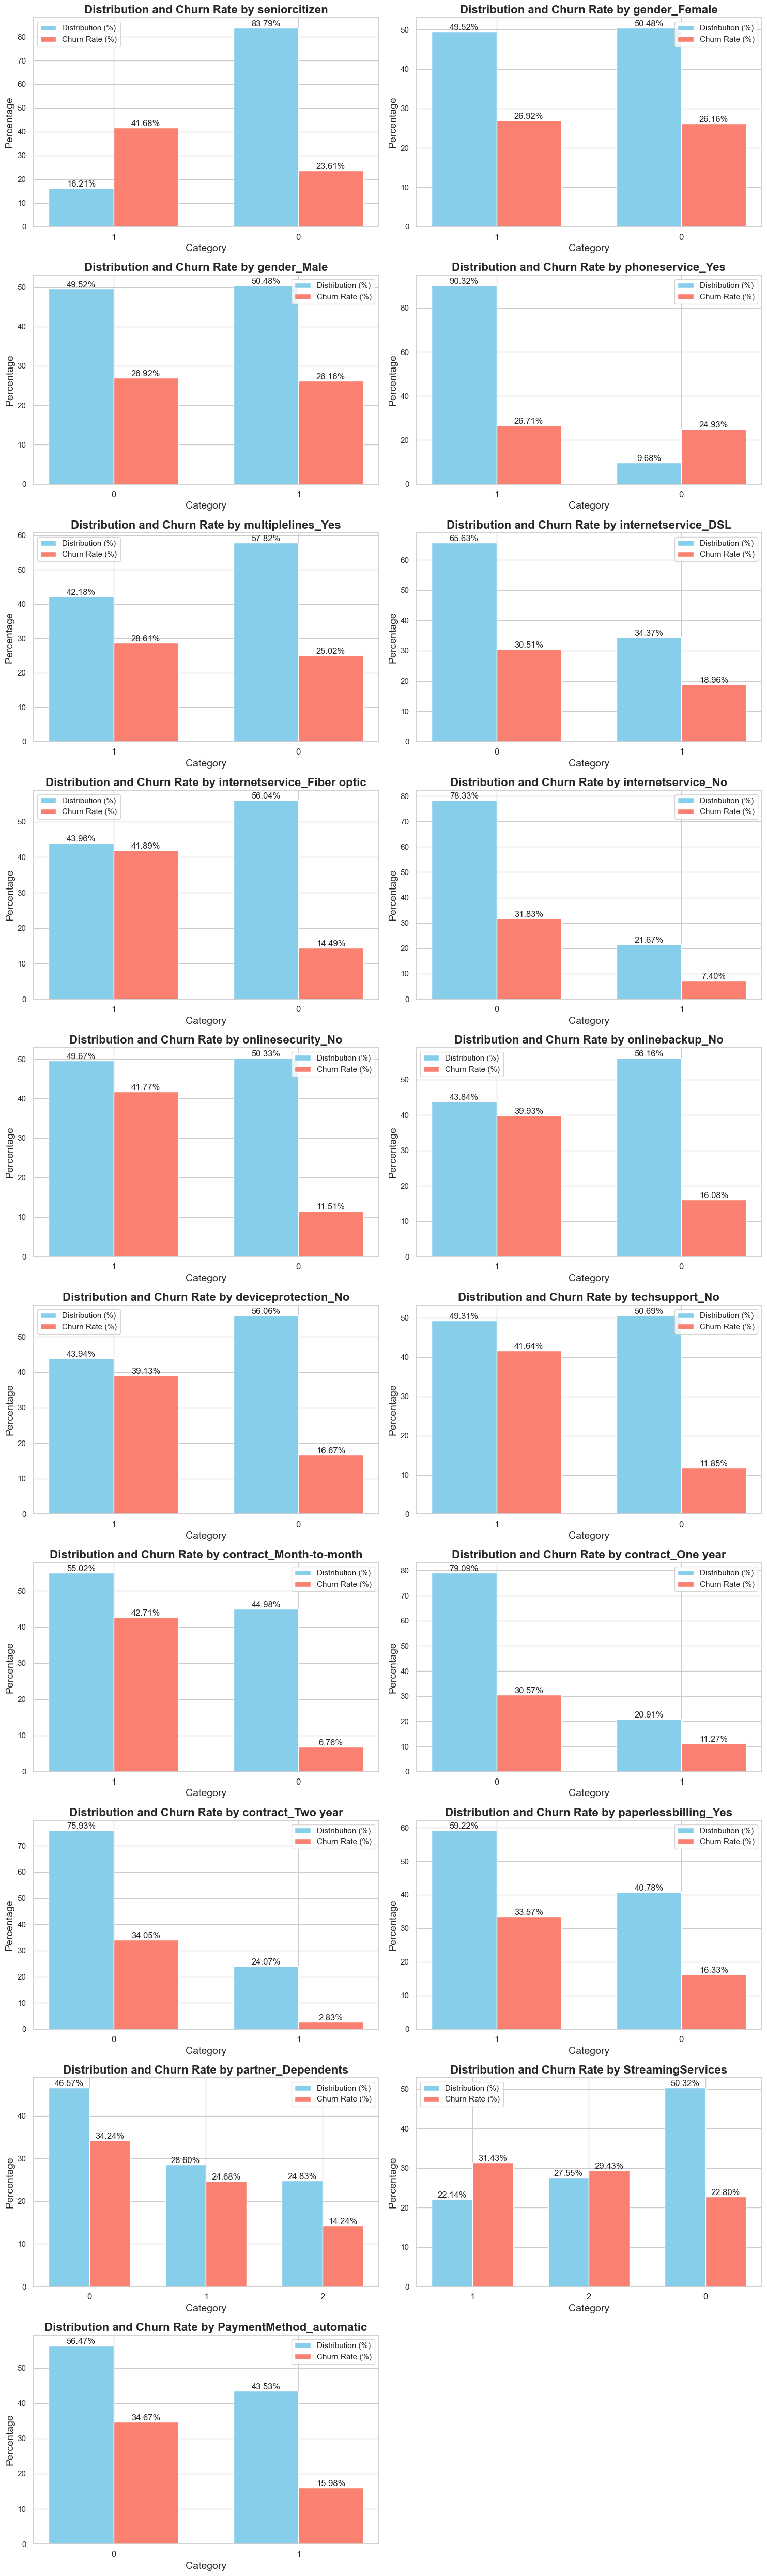

In [251]:

features=['seniorcitizen','gender_Female', 'gender_Male', 'phoneservice_Yes', 'multiplelines_Yes',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No', 'onlinebackup_No',
       'deviceprotection_No', 'techsupport_No', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year', 'paperlessbilling_Yes',
       'partner_Dependents', 'StreamingServices', 'PaymentMethod_automatic']

# Using cal_dist_Churn_Rate to calculate distrabutions and churn rate
df = (cal_dist_Churn_Rate(features,telecom_dummies).reset_index()).drop(columns='index',axis=1).sort_values(by=['Feature','Churn Rate'],ascending=[False,False]) 
bar_chart_dist_rate(features,df)

data=pd.DataFrame({'Feature': [],'Category': [],'Distribution': [], 'Churn Rate': []})

for col in features:
    x=df[df.Feature==col].head(1).reset_index().drop('index',axis=1)
    data=pd.concat([data,x],ignore_index=True)

top_features=data.sort_values('Churn Rate',ascending=False).reset_index().drop(columns='index',axis=1)

top_features

What are the statistics of the data?

In [252]:
telecom_dummies.describe()

seniorcitizen  monthlycharges  totalcharges        churn  \
count    7043.000000     7043.000000   7043.000000  7043.000000   
mean        0.162147       64.761692   2279.734304     0.265370   
std         0.368612       30.090047   2266.794470     0.441561   
min         0.000000       18.250000      0.000000     0.000000   
25%         0.000000       35.500000    398.550000     0.000000   
50%         0.000000       70.350000   1394.550000     0.000000   
75%         0.000000       89.850000   3786.600000     1.000000   
max         1.000000      118.750000   8684.800000     1.000000   

       gender_Female  gender_Male  phoneservice_Yes  multiplelines_Yes  \
count    7043.000000  7043.000000       7043.000000        7043.000000   
mean        0.495244     0.504756          0.903166           0.421837   
std         0.500013     0.500013          0.295752           0.493888   
min         0.000000     0.000000          0.000000           0.000000   
25%         0.000000     0.000000          1.000000           0.000000   
50%         0.000000     1.000000          1.000000           0.000000   
75%         1.000000     1.000000          1.000000           1.000000   
max         1.000000     1.000000          1.000000           1.000000   

       internetservice_DSL  internetservice_Fiber optic  ...  \
count          7043.000000                  7043.000000  ...   
mean              0.343746                     0.439585  ...   
std               0.474991                     0.496372  ...   
min               0.000000                     0.000000  ...   
25%               0.000000                     0.000000  ...   
50%               0.000000                     0.000000  ...   
75%               1.000000                     1.000000  ...   
max               1.000000                     1.000000  ...   

       deviceprotection_No  techsupport_No  contract_Month-to-month  \
count          7043.000000     7043.000000              7043.000000   
mean              0.439443        0.493114                 0.550192   
std               0.496355        0.499988                 0.497510   
min               0.000000        0.000000                 0.000000   
25%               0.000000        0.000000                 0.000000   
50%               0.000000        0.000000                 1.000000   
75%               1.000000        1.000000                 1.000000   
max               1.000000        1.000000                 1.000000   

       contract_One year  contract_Two year  paperlessbilling_Yes  \
count        7043.000000        7043.000000           7043.000000   
mean            0.209144           0.240664              0.592219   
std             0.406726           0.427517              0.491457   
min             0.000000           0.000000              0.000000   
25%             0.000000           0.000000              0.000000   
50%             0.000000           0.000000              1.000000   
75%             0.000000           0.000000              1.000000   
max             1.000000           1.000000              1.000000   

       partner_Dependents  StreamingServices  PaymentMethod_automatic  \
count         7043.000000        7043.000000              7043.000000   
mean             0.782621           0.772256                 0.435326   
std              0.816629           0.852573                 0.495835   
min              0.000000           0.000000                 0.000000   
25%              0.000000           0.000000                 0.000000   
50%              1.000000           0.000000                 0.000000   
75%              1.000000           2.000000                 1.000000   
max              2.000000           2.000000                 1.000000   

       Additional_Services  
count          7043.000000  
mean              2.821241  
std               2.113505  
min               0.000000  
25%               1.000000  
50%               3.000000  
75%               4.000000  
max    

*Conclusions:*

* **Contract Type:**<br>
Month-to-month contracts have a strong positive correlation with churn. Strategies to encourage customers to opt for longer-term contracts, like offering discounts or added benefits, can help reduce churn.

* **Online Security and Tech Support:**<br>
Customers without online security and tech support are more likely to churn. Enhancing these services and educating customers on their importance can help in retaining them.

* **Internet Service Type:**<br>
Customers with fiber optic internet service show higher churn rates. Investigating and addressing potential issues (e.g., cost, service quality) related to fiber optic services could mitigate churn.

* **Payment Method:**<br>
Customers using electronic checks are more likely to churn. Encouraging automatic payments via bank transfer or credit card might improve retention.

* **Additional Services:**<br>
Providing comprehensive services, such as online backup and device protection, can play a significant role in reducing churn.

* **Senior Citizen Status:**<br>
Senior citizens are slightly more likely to churn. Offering tailored plans and support services for senior citizens could help in retaining this segment.

# 3. ML Algorithms

## Improt and join with customerID

In [253]:
telecom_dummies=telecom_dummies.join(customerid)


In [254]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm
from sklearn.neighbors import KNeighborsClassifier  # Importing the algorithm
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # import the libraries
import numpy as np
def get_benchmark_predictions(x, benchmark_value): # The function returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value



## Train and Test split

Scikit-Learn is the most popular library for machine learning in Python. It includes functions for read, write and manipulate data, as lots of optimized machine learning algorithms.

The name derives from the combination <b>SCI</b>py tool<b>KIT</b> for machine <b>LEARN</b>ing. The library expands the capabilities of numpy, scipy, and pandas.

"sklearn" is how you type the "scikit-learn" name in pythonm

In [255]:
train, test = train_test_split(telecom_dummies, test_size=0.2, random_state=0, shuffle=True)

label = 'churn'
cust = 'customerid' 

x_train = train.drop(label, axis=1)
x_train = x_train.drop(cust, axis=1) ### New

y_train = train[label]

cust_train = train[cust] ### New

x_test = test.drop(label, axis=1)
x_test = x_test.drop(cust, axis=1) ### New
y_test = test[label]
cust_test = test[cust] ### New

In [256]:
x_train.shape, y_train.shape, cust_train.shape, x_test.shape, y_test.shape, cust_test.shape

((5634, 22), (5634,), (5634,), (1409, 22), (1409,), (1409,))

In [257]:
print("Shape of Training Data : ", "\nfeatures:", x_train.shape, ", target:", y_train.shape)
print("Target Label Distribution in train set : ", "\nChurn:", y_train.sum(), "Not Churn", len(y_train) - y_train.sum())
print("Percentage of Churn:", y_train.sum() / len(y_train) * 100)
print()
print("Shape of Test Data : ", "\nfeatures:", x_test.shape, ", target:", y_test.shape)
print("Target Label Distribution in test set : ", "\nChurn:", y_test.sum(), "Not Churn", len(y_test) - y_test.sum())
print("Percentage of Churn:", y_test.sum() / len(y_test) * 100)

Shape of Training Data :  
features: (5634, 22) , target: (5634,)
Target Label Distribution in train set :  
Churn: 1501 Not Churn 4133
Percentage of Churn: 26.641817536386224

Shape of Test Data :  
features: (1409, 22) , target: (1409,)
Target Label Distribution in test set :  
Churn: 368 Not Churn 1041
Percentage of Churn: 26.117814052519517


In [258]:
train

seniorcitizen  monthlycharges  totalcharges  churn  gender_Female  \
2920              0           85.10       6155.40      0              1   
2966              1           46.35        672.70      0              1   
6099              0           24.70       1810.55      0              1   
5482              0           73.90       2405.05      1              0   
2012              0           98.75       4533.70      1              1   
...             ...             ...           ...    ...            ...   
4931              0          103.45       1539.80      0              0   
3264              0           91.10        964.35      0              1   
1653              0           20.75       1185.95      0              0   
2607              1           69.75         69.75      1              0   
2732              0           20.40         94.50      0              1   

      gender_Male  phoneservice_Yes  multiplelines_Yes  internetservice_DSL  \
2920            0                 1                  0                    1   
2966            0                 0                  0                    1   
6099            0                 1                  1                    0   
5482            1                 1                  0                    1   
2012            0                 1                  1                    0   
...           ...               ...                ...                  ...   
4931            1                 1                  1                    0   
3264            0                 1                  0                    0   
1653            1                 1                  0                    0   
2607            1                 1                  0                    0   
2732            0                 1                  0                    0   

      internetservice_Fiber optic  ...  techsupport_No  \
2920                            0  ...               0   
2966                            0  ...               1   
6099                            0  ...               0   
5482                            0  ...               0   
2012                            1  ...               1   
...                           ...  ...             ...   
4931                            1  ...               0   
3264                            1  ...               0   
1653                            0  ...               0   
2607                            1  ...               1   
2732                            0  ...               0   

      contract_Month-to-month  contract_One year  contract_Two year  \
2920                        0                  0                  1   
2966                        1                  0                  0   
6099                        0                  0                  1   
5482                        0                  1                  0   
2012                        1                  0                  0   
...                       ...                ...                ...   
4931                        1                  0                  0   
3264                        1                  0                  0   
1653                        0                  0                  1   
2607                        1                  0                  0   
2732                        1                  0                  0   

      paperlessbilling_Yes  partner_Dependents  StreamingServices  \
2920                     0                   1                  2   
2966                     1                   0                  2   
6099                     0                   2                  0   
5482                     1                   2                  2   
2012                     1                   1                  1   
...                    ...                 ...                ...   
4931                     1                   1                  2   
3264                     1                   1        

In [259]:
test

seniorcitizen  monthlycharges  totalcharges  churn  gender_Female  \
2200              0           58.20       1045.25      0              1   
4627              0          116.60       7049.50      0              0   
3225              0           71.95        923.85      0              1   
2828              0           20.45         20.45      0              0   
3768              0           77.75       4266.40      0              1   
...             ...             ...           ...    ...            ...   
2631              1           99.25        665.45      1              0   
5333              0           88.35       1222.80      1              1   
6972              1          111.95       6418.90      1              1   
4598              0           56.25        969.85      0              0   
3065              0           45.80         45.80      0              0   

      gender_Male  phoneservice_Yes  multiplelines_Yes  internetservice_DSL  \
2200            0                 1                  0                    1   
4627            1                 1                  1                    0   
3225            0                 1                  0                    1   
2828            1                 1                  0                    0   
3768            0                 1                  1                    0   
...           ...               ...                ...                  ...   
2631            1                 1                  1                    0   
5333            0                 1                  0                    0   
6972            0                 1                  1                    0   
4598            1                 1                  1                    1   
3065            1                 1                  0                    1   

      internetservice_Fiber optic  ...  techsupport_No  \
2200                            0  ...               1   
4627                            1  ...               0   
3225                            0  ...               1   
2828                            0  ...               0   
3768                            1  ...               1   
...                           ...  ...             ...   
2631                            1  ...               1   
5333                            1  ...               1   
6972                            1  ...               0   
4598                            0  ...               1   
3065                            0  ...               1   

      contract_Month-to-month  contract_One year  contract_Two year  \
2200                        0                  1                  0   
4627                        0                  1                  0   
3225                        1                  0                  0   
2828                        0                  0                  1   
3768                        1                  0                  0   
...                       ...                ...                ...   
2631                        1                  0                  0   
5333                        1                  0                  0   
6972                        0                  1                  0   
4598                        1                  0                  0   
3065                        1                  0                  0   

      paperlessbilling_Yes  partner_Dependents  StreamingServices  \
2200                     0                   0                  1   
4627                     1                   0                  2   
3225                     1                   0                  2   
2828                     0                   0                  0   
3768                     1                   1                  0   
...                    ...                 ...                ...   
2631                     1                   1                  2   
5333                     0                   2        

In [260]:
x_train

seniorcitizen  monthlycharges  totalcharges  gender_Female  gender_Male  \
2920              0           85.10       6155.40              1            0   
2966              1           46.35        672.70              1            0   
6099              0           24.70       1810.55              1            0   
5482              0           73.90       2405.05              0            1   
2012              0           98.75       4533.70              1            0   
...             ...             ...           ...            ...          ...   
4931              0          103.45       1539.80              0            1   
3264              0           91.10        964.35              1            0   
1653              0           20.75       1185.95              0            1   
2607              1           69.75         69.75              0            1   
2732              0           20.40         94.50              1            0   

      phoneservice_Yes  multiplelines_Yes  internetservice_DSL  \
2920                 1                  0                    1   
2966                 0                  0                    1   
6099                 1                  1                    0   
5482                 1                  0                    1   
2012                 1                  1                    0   
...                ...                ...                  ...   
4931                 1                  1                    0   
3264                 1                  0                    0   
1653                 1                  0                    0   
2607                 1                  0                    0   
2732                 1                  0                    0   

      internetservice_Fiber optic  internetservice_No  ...  \
2920                            0                   0  ...   
2966                            0                   0  ...   
6099                            0                   1  ...   
5482                            0                   0  ...   
2012                            1                   0  ...   
...                           ...                 ...  ...   
4931                            1                   0  ...   
3264                            1                   0  ...   
1653                            0                   1  ...   
2607                            1                   0  ...   
2732                            0                   1  ...   

      deviceprotection_No  techsupport_No  contract_Month-to-month  \
2920                    0               0                        0   
2966                    1               1                        1   
6099                    0               0                        0   
5482                    0               0                        0   
2012                    0               1                        1   
...                   ...             ...                      ...   
4931                    0               0                        1   
3264                    0               0                        1   
1653                    0               0                        0   
2607                    1               1                        1   
2732                    0               0                        1   

      contract_One year  contract_Two year  paperlessbilling_Yes  \
2920                  0                  1                     0   
2966                  0                  0                     1   
6099                  0                  1                     0   
5482                  1                  0                     1   
2012                  0                  0                     1   
...                 ...                ...                   ...   
4931                  0                  0                     1   
3264                  0                  0                     1   
1653                  0                  1

In [261]:
y_train

2920    0
2966    0
6099    0
5482    1
2012    1
       ..
4931    0
3264    0
1653    0
2607    1
2732    0
Name: churn, Length: 5634, dtype: int64

In [262]:
x_test

seniorcitizen  monthlycharges  totalcharges  gender_Female  gender_Male  \
2200              0           58.20       1045.25              1            0   
4627              0          116.60       7049.50              0            1   
3225              0           71.95        923.85              1            0   
2828              0           20.45         20.45              0            1   
3768              0           77.75       4266.40              1            0   
...             ...             ...           ...            ...          ...   
2631              1           99.25        665.45              0            1   
5333              0           88.35       1222.80              1            0   
6972              1          111.95       6418.90              1            0   
4598              0           56.25        969.85              0            1   
3065              0           45.80         45.80              0            1   

      phoneservice_Yes  multiplelines_Yes  internetservice_DSL  \
2200                 1                  0                    1   
4627                 1                  1                    0   
3225                 1                  0                    1   
2828                 1                  0                    0   
3768                 1                  1                    0   
...                ...                ...                  ...   
2631                 1                  1                    0   
5333                 1                  0                    0   
6972                 1                  1                    0   
4598                 1                  1                    1   
3065                 1                  0                    1   

      internetservice_Fiber optic  internetservice_No  ...  \
2200                            0                   0  ...   
4627                            1                   0  ...   
3225                            0                   0  ...   
2828                            0                   1  ...   
3768                            1                   0  ...   
...                           ...                 ...  ...   
2631                            1                   0  ...   
5333                            1                   0  ...   
6972                            1                   0  ...   
4598                            0                   0  ...   
3065                            0                   0  ...   

      deviceprotection_No  techsupport_No  contract_Month-to-month  \
2200                    1               1                        0   
4627                    0               0                        0   
3225                    1               1                        1   
2828                    0               0                        0   
3768                    1               1                        1   
...                   ...             ...                      ...   
2631                    0               1                        1   
5333                    1               1                        1   
6972                    0               0                        0   
4598                    1               1                        1   
3065                    1               1                        1   

      contract_One year  contract_Two year  paperlessbilling_Yes  \
2200                  1                  0                     0   
4627                  1                  0                     1   
3225                  0                  0                     1   
2828                  0                  1                     0   
3768                  0                  0                     1   
...                 ...                ...                   ...   
2631                  0                  0                     1   
5333                  0                  0                     0   
6972                  1                  0

In [263]:
y_test

2200    0
4627    0
3225    0
2828    0
3768    0
       ..
2631    1
5333    1
6972    1
4598    0
3065    0
Name: churn, Length: 1409, dtype: int64

## Decision Tree

In [264]:
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm

clf = DecisionTreeClassifier(max_depth=6)
# define the algorithm:
    # arg:
        # max_depth = The maximum depth of the tree. (If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)


clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_DecisionTree = clf.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'customerid':cust_test, 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree}) # saving results to DataFrame
output

customerid  churn_what_actualy_happened  churn_predicted_by_model
2200  6296-DDOOR                            0                         0
4627  3680-CTHUH                            0                         0
3225  4931-TRZWN                            0                         0
2828  8559-WNQZS                            0                         0
3768  3537-HPKQT                            0                         0
...          ...                          ...                       ...
2631  6861-XWTWQ                            1                         1
5333  3143-JQEGI                            1                         0
6972  6664-FPDAC                            1                         0
4598  4929-ROART                            0                         0
3065  5133-POWUA                            0                         0

[1409 rows x 3 columns]

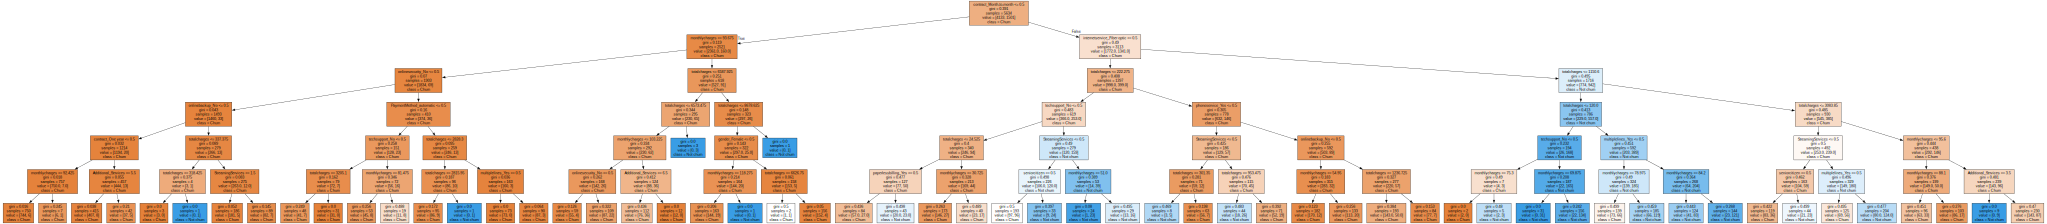

In [265]:
# Plotting the decision tree
# Importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# this is afunction that we can always use for plotting decision trees, the function expects 3 arg as follows
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

# Using the function above, with the 3 arg
    # tree
    # feaures
    # labels --> we'll go over the example and it will be clear
plot_tree(clf, x_train.columns, ['Churn', 'Not churn'])


## Random Forest model

In [266]:
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm

model = RandomForestClassifier(n_estimators=52, max_depth=10, random_state=1)
# define the algorithm:
    # arg:
        # n_estimators = number of trees
        # max_dept = the maximum depth of the trees
        # random_state =
            # basically, an algorithm is repeated a number of times using random selections of features and samples. The random_state parameter allows controlling these random choices.
            # if you call this with random_state=1 (or any other value), then each and every time, you'll get the same result.
            
model.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_RandomForest = model.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'customerid': cust_test, 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_RandomForest}) # saving results to DataFrame
output


customerid  churn_what_actualy_happened  churn_predicted_by_model
2200  6296-DDOOR                            0                         0
4627  3680-CTHUH                            0                         0
3225  4931-TRZWN                            0                         0
2828  8559-WNQZS                            0                         0
3768  3537-HPKQT                            0                         0
...          ...                          ...                       ...
2631  6861-XWTWQ                            1                         1
5333  3143-JQEGI                            1                         1
6972  6664-FPDAC                            1                         0
4598  4929-ROART                            0                         0
3065  5133-POWUA                            0                         1

[1409 rows x 3 columns]

## Random Forest Feature Importance

Let's look at the random forest feature importance

In [267]:
feature_importances = model.feature_importances_ # applying the method "feature_importances_" on the algorithm
feature_importances # Every feature importance (%)

array([0.01724845, 0.13723689, 0.202464  , 0.01354925, 0.01338014,
       0.00513261, 0.01598636, 0.0172121 , 0.05495863, 0.00934837,
       0.06668572, 0.03176073, 0.02155048, 0.0429859 , 0.14654631,
       0.01750455, 0.03158174, 0.02534061, 0.02866731, 0.02271172,
       0.03786373, 0.0402844 ])

In [268]:
features = x_train.columns # all the features
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
stats.sort_values('importance', ascending=False) # Sorting the data frame

feature  importance
2                  totalcharges    0.202464
14      contract_Month-to-month    0.146546
1                monthlycharges    0.137237
10            onlinesecurity_No    0.066686
8   internetservice_Fiber optic    0.054959
13               techsupport_No    0.042986
21          Additional_Services    0.040284
20      PaymentMethod_automatic    0.037864
11              onlinebackup_No    0.031761
16            contract_Two year    0.031582
18           partner_Dependents    0.028667
17         paperlessbilling_Yes    0.025341
19            StreamingServices    0.022712
12          deviceprotection_No    0.021550
15            contract_One year    0.017505
0                 seniorcitizen    0.017248
7           internetservice_DSL    0.017212
6             multiplelines_Yes    0.015986
3                 gender_Female    0.013549
4                   gender_Male    0.013380
9            internetservice_No    0.009348
5              phoneservice_Yes    0.005133

In [269]:
# If we'll sum all the imprtance we'll get 100% (each feature and its importance percentage)
stats.importance.sum()

1.0

Let's plot the features

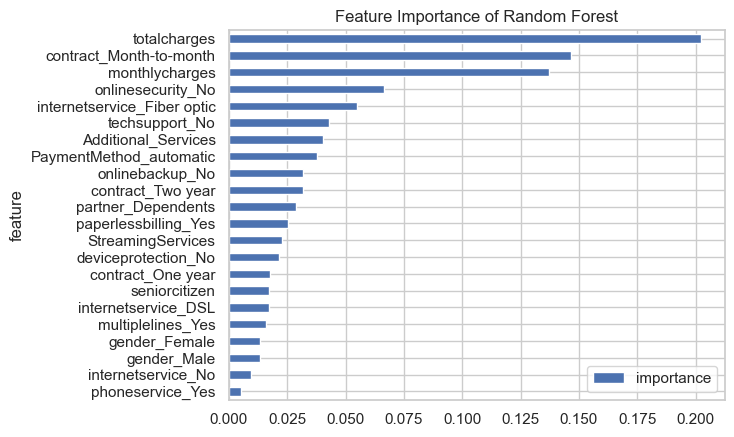

In [270]:
stats_sort = stats.sort_values('importance', ascending=True)
        
    
stats_sort.plot(y='importance', x='feature', kind='barh')    

        
plt.title('Feature Importance of Random Forest');

## KNN - K Nearest Neighbors

In [271]:
from sklearn.neighbors import KNeighborsClassifier  # Importing the algorithm

clf = KNeighborsClassifier(n_neighbors=51)
# define the algorithm:
    # arg:
        # n_neighbors = number of neighbors
        
clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_Knn = clf.predict(x_test) # making a prediction based on "test" data features

output = pd.DataFrame({'customerid': cust_test, 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_Knn}) # saving results to DataFrame
output



customerid  churn_what_actualy_happened  churn_predicted_by_model
2200  6296-DDOOR                            0                         0
4627  3680-CTHUH                            0                         0
3225  4931-TRZWN                            0                         0
2828  8559-WNQZS                            0                         0
3768  3537-HPKQT                            0                         0
...          ...                          ...                       ...
2631  6861-XWTWQ                            1                         0
5333  3143-JQEGI                            1                         0
6972  6664-FPDAC                            1                         0
4598  4929-ROART                            0                         0
3065  5133-POWUA                            0                         1

[1409 rows x 3 columns]

## Accuracy

In [272]:
# Evaluation for Decision Tree
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7849538679914834

In [273]:
# Evaluation for Random Forest
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.8097941802696949

In [274]:
# Evaluation for Knn
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7743080198722498

In [275]:
# Decision Tree  
max_depth=[6,7,8]
data={'depth':[],'accuracy':[]}


for depth in max_depth:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(x_train, y_train)
    y_test_pred_DecisionTree = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
    data['depth'].append(depth)
    data['accuracy'].append(test_acc)
    print(f'Decision Tree- accuracy_score with max_depth {depth} is {test_acc}')

data=pd.DataFrame(data)
maxDepth=data[data.accuracy==data.accuracy.max()].iloc[0,0]
maxAccuracy=data[data.accuracy==data.accuracy.max()].iloc[0,1]
print(f'Decision Tree- The highest Accuracy is {maxAccuracy} with depth {maxDepth}')

Decision Tree- accuracy_score with max_depth 6 is 0.7849538679914834
Decision Tree- accuracy_score with max_depth 7 is 0.7778566359119943
Decision Tree- accuracy_score with max_depth 8 is 0.7785663591199432
Decision Tree- The highest Accuracy is 0.7849538679914834 with depth 6


In [276]:
# Random Forest - max_depth 10
n_estimators=[101,201,11,9,7]
max_depth=[10]


data={'n_estimators':[],'max_depth':[],'accuracy':[]}

for estimators in n_estimators:
    for depth in max_depth:
        model = RandomForestClassifier(n_estimators=estimators, max_depth=depth, random_state=1)        
        model.fit(x_train, y_train)
        y_test_pred_RandomForest = model.predict(x_test)
        test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
        data['n_estimators'].append(estimators)
        data['max_depth'].append(depth)
        data['accuracy'].append(test_acc)
        print(f'Random Forest- accuracy_score with max_depth={depth} and n_estimators={estimators} is {test_acc}')

data=pd.DataFrame(data)
n_estimators=data[data.accuracy==data.accuracy.max()].iloc[0,0] 
max_depth=data[data.accuracy==data.accuracy.max()].iloc[0,1] 
accuracy=data[data.accuracy==data.accuracy.max()].iloc[0,2] 

print(f'Random Forest= The highest Accuracy is {accuracy} with n_estimators {n_estimators} depth {maxDepth}')

Random Forest- accuracy_score with max_depth=10 and n_estimators=101 is 0.7984386089425124
Random Forest- accuracy_score with max_depth=10 and n_estimators=201 is 0.7991483321504613
Random Forest- accuracy_score with max_depth=10 and n_estimators=11 is 0.7856635911994322
Random Forest- accuracy_score with max_depth=10 and n_estimators=9 is 0.7842441447835344
Random Forest- accuracy_score with max_depth=10 and n_estimators=7 is 0.7828246983676366
Random Forest= The highest Accuracy is 0.7991483321504613 with n_estimators 201 depth 6


In [277]:
# Random Forest --n_estimators 

data={'n_estimators':[],'max_depth':[],'accuracy':[]}


n_estimators=[101]
max_depth=[5,9,21,7]

for estimators in n_estimators:
    for depth in max_depth:
        model = RandomForestClassifier(n_estimators=estimators, max_depth=depth, random_state=1)        
        model.fit(x_train, y_train)
        y_test_pred_RandomForest = model.predict(x_test)
        test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
        data['n_estimators'].append(estimators)
        data['max_depth'].append(depth)
        data['accuracy'].append(test_acc)
        print(f'Random Forest- accuracy_score with max_depth={depth} and n_estimators={estimators} is {test_acc}')

data=pd.DataFrame(data)
n_estimators=data[data.accuracy==data.accuracy.max()].iloc[0,0] 
max_depth=data[data.accuracy==data.accuracy.max()].iloc[0,1] 
accuracy=data[data.accuracy==data.accuracy.max()].iloc[0,2] 

print(f'Random Forest-The highest Accuracy is {accuracy} with n_estimators {n_estimators} and depth {maxDepth}')    



Random Forest- accuracy_score with max_depth=5 and n_estimators=101 is 0.7899219304471257
Random Forest- accuracy_score with max_depth=9 and n_estimators=101 is 0.794889992902768
Random Forest- accuracy_score with max_depth=21 and n_estimators=101 is 0.772888573456352
Random Forest- accuracy_score with max_depth=7 and n_estimators=101 is 0.7963094393186657
Random Forest-The highest Accuracy is 0.7963094393186657 with n_estimators 101 and depth 6


In [278]:
# Knn -- n_neighbors = 3 (like before)

n_neighbors=[51,101,301]

data={'n_neighbors':[],'accuracy':[]}

for neighbors in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=neighbors)
    clf.fit(x_train, y_train)
    y_test_pred_Knn = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred_Knn)
    data['n_neighbors'].append(neighbors)
    data['accuracy'].append(test_acc)

    print(f'Knn- accuracy_score with n_neighbors= {neighbors} is {test_acc}')

data=pd.DataFrame(data)
neighbors=data[data.accuracy==data.accuracy.max()].iloc[0,0] 
accuracy=data[data.accuracy==data.accuracy.max()].iloc[0,1] 


print(f'Knn- The highest Accuracy is {accuracy} with {neighbors} neighbors ')

Knn- accuracy_score with n_neighbors= 51 is 0.7743080198722498
Knn- accuracy_score with n_neighbors= 101 is 0.765791341376863
Knn- accuracy_score with n_neighbors= 301 is 0.758694109297374
Knn- The highest Accuracy is 0.7743080198722498 with 51 neighbors 


 Seems like the algorithm overfits a bit, also we know that KNN can highly suffer from features that are in different scales. So let's scale the x values first

In [279]:
from sklearn.preprocessing import StandardScaler # import the libraries

scaler = StandardScaler() # define
x_train_scaled = scaler.fit_transform(x_train) # Fit to data, then transform it.
x_test_scaled = scaler.transform(x_test) # Perform standardization by centering and scaling

data={'n_neighbors':[],'accuracy':[]}

n_neighbors=[51,101,301]

for neighbors in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=neighbors)
    clf.fit(x_train_scaled, y_train)
    y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)
    test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
    data['n_neighbors'].append(neighbors)
    data['accuracy'].append(test_acc)
    print(f'Knn by model scaled- accuracy_score with n_neighbors= {neighbors} is {test_acc}')

data=pd.DataFrame(data)
neighbors=data[data.accuracy==data.accuracy.max()].iloc[0,0] 
accuracy=data[data.accuracy==data.accuracy.max()].iloc[0,1] 
print(f'Knn- The highest Accuracy is {accuracy} with {neighbors} neighbors ')






Knn by model scaled- accuracy_score with n_neighbors= 51 is 0.7920511000709723
Knn by model scaled- accuracy_score with n_neighbors= 101 is 0.7806955287437899
Knn by model scaled- accuracy_score with n_neighbors= 301 is 0.7757274662881476
Knn- The highest Accuracy is 0.7920511000709723 with 51 neighbors 


In [280]:
clf = KNeighborsClassifier(n_neighbors=51)
clf.fit(x_train_scaled, y_train)
y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)

clf.fit(x_train, y_train) # running\training the algorithm with the train data
y_test_pred_Knn = clf.predict(x_test) 
output = pd.DataFrame({'customerid':cust_test, 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_Knn, 'churn_predicted_by_model_scaled':y_test_pred_Knn_Scaled}) # saving results to DataFrame
output

customerid  churn_what_actualy_happened  churn_predicted_by_model  \
2200  6296-DDOOR                            0                         0   
4627  3680-CTHUH                            0                         0   
3225  4931-TRZWN                            0                         0   
2828  8559-WNQZS                            0                         0   
3768  3537-HPKQT                            0                         0   
...          ...                          ...                       ...   
2631  6861-XWTWQ                            1                         0   
5333  3143-JQEGI                            1                         0   
6972  6664-FPDAC                            1                         0   
4598  4929-ROART                            0                         0   
3065  5133-POWUA                            0                         1   

      churn_predicted_by_model_scaled  
2200                                0  
4627                                0  
3225                                0  
2828                                0  
3768                                1  
...                               ...  
2631                                1  
5333                                1  
6972                                0  
4598                                0  
3065                                1  

[1409 rows x 4 columns]

## Overfitting

### Overfitting in Decision Tree


In [281]:
# Evaluation for Decision Tree

data={'depth':[], 'accuracy_test':[], 'accuracy_train':[] }

Max=150
MaxDepth=range(1,Max)

for num in MaxDepth:
    clf = DecisionTreeClassifier(max_depth=num)
    clf.fit(x_train, y_train)
    y_test_pred_DecisionTree = clf.predict(x_test)
    y_train_pred_DecisionTree = clf.predict(x_train)
    test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
    train_acc = accuracy_score(y_train, y_train_pred_DecisionTree)
    data['depth'].append(num)
    data['accuracy_test'].append(test_acc)
    data['accuracy_train'].append(train_acc)


######################################################    

data_DecisionTree=pd.DataFrame(data)
max_DecisionTree=data_DecisionTree[data_DecisionTree.accuracy_test==data_DecisionTree.accuracy_test.max()]
max_depth_DecisionTree=max_DecisionTree.iloc[0,0]
max_accuracy_DecisionTree=round(max_DecisionTree.iloc[0,1],5)
print(f'max_depth: {max_depth_DecisionTree}, accuracy {max_accuracy_DecisionTree}')

max_depth: 6, accuracy 0.78495


In [282]:
clf_DecisionTree = DecisionTreeClassifier(max_depth=max_depth_DecisionTree)
clf_DecisionTree.fit(x_train, y_train)
y_test_pred_DecisionTree = clf_DecisionTree.predict(x_test)
output_DecisionTree = pd.DataFrame({'customerID': cust_test, 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree}) # saving results to DataFrame
output_DecisionTree

customerID  churn_what_actualy_happened  churn_predicted_by_model
2200  6296-DDOOR                            0                         0
4627  3680-CTHUH                            0                         0
3225  4931-TRZWN                            0                         0
2828  8559-WNQZS                            0                         0
3768  3537-HPKQT                            0                         0
...          ...                          ...                       ...
2631  6861-XWTWQ                            1                         1
5333  3143-JQEGI                            1                         0
6972  6664-FPDAC                            1                         0
4598  4929-ROART                            0                         0
3065  5133-POWUA                            0                         0

[1409 rows x 3 columns]

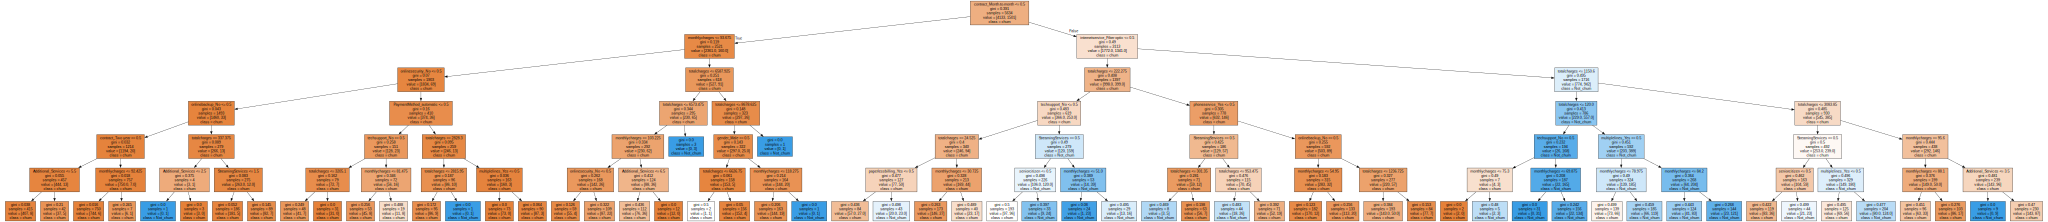

In [283]:
# this is function that we can always use for plotting decision trees, the function expects 3 arg as follows
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(clf_DecisionTree, x_train.columns, ['churn', 'Not_churn'])


Decision Tree-best depth: 6, best accuracy 0.78495 after checking 150 depths


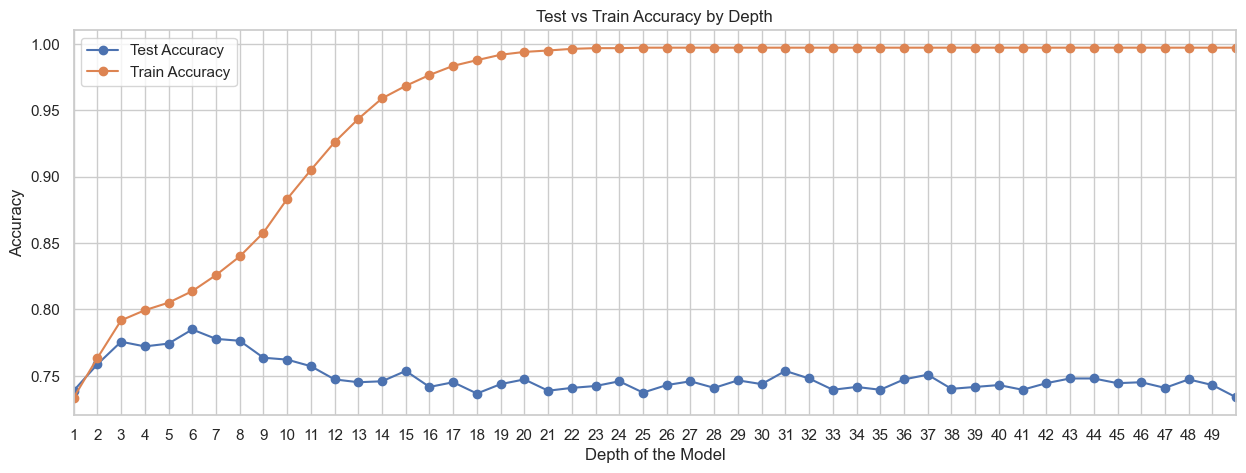

In [284]:
# Decision Tree- visualize the results 
print(f'Decision Tree-best depth: {max_depth_DecisionTree}, best accuracy {max_accuracy_DecisionTree} after checking {Max} depths')
plt.figure(figsize=(15, 5))
plt.plot(data_DecisionTree['depth'], data_DecisionTree['accuracy_test'], label='Test Accuracy', marker='o')
plt.plot(data['depth'], data['accuracy_train'], label='Train Accuracy', marker='o')
plt.title('Test vs Train Accuracy by Depth')
plt.xlabel('Depth of the Model')
plt.ylabel('Accuracy')
plt.xticks(list(range(1,50,1)))
plt.xlim(1,50)
plt.legend()
plt.grid(True)
plt.show()

### Overfitting in Random Forest

In [285]:
# Random Forest
max_estimators=60
max_depth=15
n_estimators_range = range(1, max_estimators)  
max_depth_range = range(1, max_depth)  

results = {'n_estimators':[],'max_depth':[],'test_accuracy':[],'train_accuracy':[]}

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=1)
        model.fit(x_train, y_train)

        y_test_pred_RandomForest = model.predict(x_test)
        y_train_pred_RandomForest = model.predict(x_train)
        test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
        train_acc = accuracy_score(y_train, y_train_pred_RandomForest)
        results['n_estimators'].append(n_estimators)
        results['max_depth'].append(max_depth)
        results['test_accuracy'].append(test_acc)
        results['train_accuracy'].append(train_acc)



results_RandomForest = pd.DataFrame(results)

best_results_RandomForest = results_RandomForest.loc[results_RandomForest['test_accuracy'].idxmax()]

best_n_estimators=int(best_results_RandomForest.n_estimators )     
best_max_depth=int(best_results_RandomForest.max_depth)
best_test_accuracy=round(best_results_RandomForest.test_accuracy,5)

print(f'''Best parameters found: {best_n_estimators} 
best_max_depth: {best_max_depth}
best_test_accuracy: {best_test_accuracy}''')

Best parameters found: 52 
best_max_depth: 10
best_test_accuracy: 0.80979


In [286]:
best_model_RandomForest = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=1)
best_model_RandomForest.fit(x_train, y_train)
y_test_pred_RandomForest = best_model_RandomForest.predict(x_test)

In [287]:
feature_importances= best_model_RandomForest.feature_importances_ # applying the method "feature_importances_" on the algorithm
feature_importances # Every feature importance (%)

array([0.01724845, 0.13723689, 0.202464  , 0.01354925, 0.01338014,
       0.00513261, 0.01598636, 0.0172121 , 0.05495863, 0.00934837,
       0.06668572, 0.03176073, 0.02155048, 0.0429859 , 0.14654631,
       0.01750455, 0.03158174, 0.02534061, 0.02866731, 0.02271172,
       0.03786373, 0.0402844 ])

In [288]:
features = x_train.columns # all the features
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
Feature_Importances=stats.sort_values('importance', ascending=False) # Sorting the data frame
Feature_Importances

feature  importance
2                  totalcharges    0.202464
14      contract_Month-to-month    0.146546
1                monthlycharges    0.137237
10            onlinesecurity_No    0.066686
8   internetservice_Fiber optic    0.054959
13               techsupport_No    0.042986
21          Additional_Services    0.040284
20      PaymentMethod_automatic    0.037864
11              onlinebackup_No    0.031761
16            contract_Two year    0.031582
18           partner_Dependents    0.028667
17         paperlessbilling_Yes    0.025341
19            StreamingServices    0.022712
12          deviceprotection_No    0.021550
15            contract_One year    0.017505
0                 seniorcitizen    0.017248
7           internetservice_DSL    0.017212
6             multiplelines_Yes    0.015986
3                 gender_Female    0.013549
4                   gender_Male    0.013380
9            internetservice_No    0.009348
5              phoneservice_Yes    0.005133

In [289]:
# If we'll sum all the imprtance we'll get 100% (each feature and its importance percentage)
stats.importance.sum()

1.0

In [290]:
stats_sort

feature  importance
5              phoneservice_Yes    0.005133
9            internetservice_No    0.009348
4                   gender_Male    0.013380
3                 gender_Female    0.013549
6             multiplelines_Yes    0.015986
7           internetservice_DSL    0.017212
0                 seniorcitizen    0.017248
15            contract_One year    0.017505
12          deviceprotection_No    0.021550
19            StreamingServices    0.022712
17         paperlessbilling_Yes    0.025341
18           partner_Dependents    0.028667
16            contract_Two year    0.031582
11              onlinebackup_No    0.031761
20      PaymentMethod_automatic    0.037864
21          Additional_Services    0.040284
13               techsupport_No    0.042986
8   internetservice_Fiber optic    0.054959
10            onlinesecurity_No    0.066686
1                monthlycharges    0.137237
14      contract_Month-to-month    0.146546
2                  totalcharges    0.202464

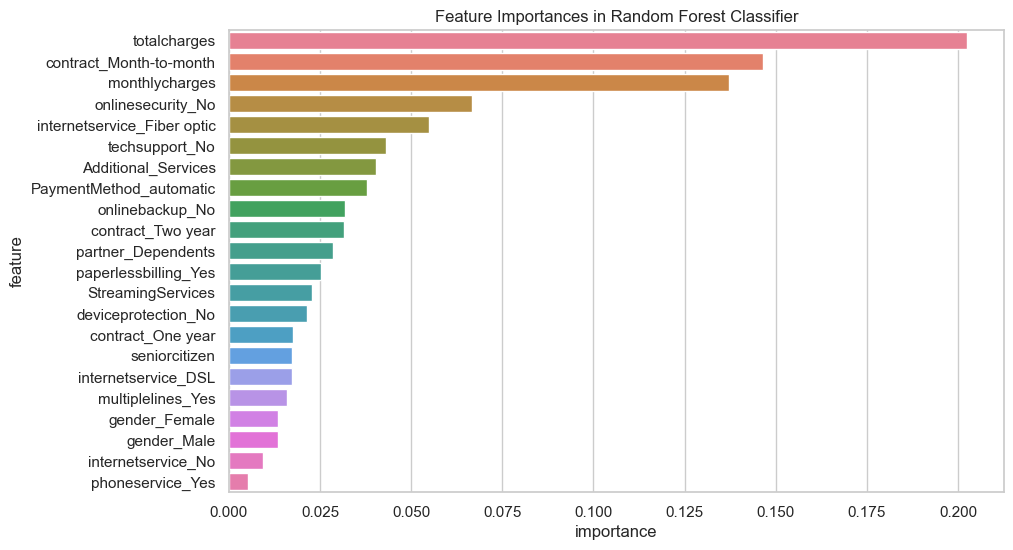

In [291]:
stats_sort = stats.sort_values('importance', ascending=False)  

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=stats_sort, hue='feature', dodge=False)
plt.title('Feature Importances in Random Forest Classifier')
plt.show()

best_n_estimators- 52 
best_max_depth - 10 
best_test_accuracy - 0.80979


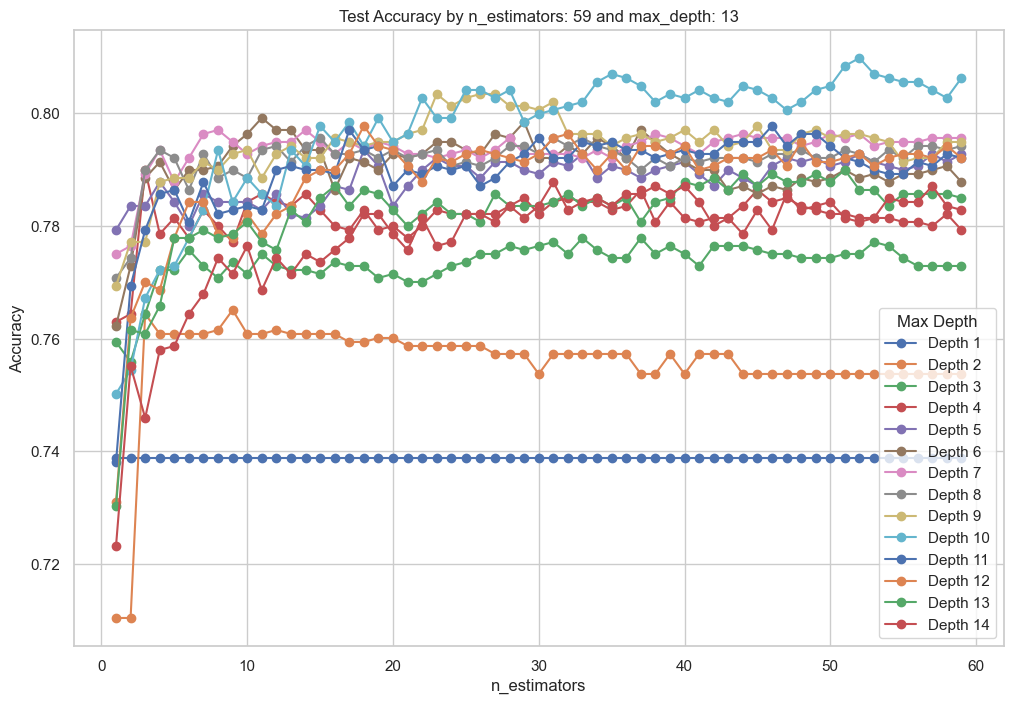

In [292]:
print(f'''best_n_estimators- {best_n_estimators} 
best_max_depth - {best_max_depth} 
best_test_accuracy - {best_test_accuracy}''')

fig, ax = plt.subplots(figsize=(12, 8))

for depth in max_depth_range:
    subset = results_RandomForest[results_RandomForest['max_depth'] == depth]
    ax.plot(subset['n_estimators'], subset['test_accuracy'], marker='o', label=f'Depth {depth}')

ax.set_title(f'Test Accuracy by n_estimators: {max_estimators-1} and max_depth: {max_depth-1}')
ax.set_xlabel('n_estimators')
ax.set_ylabel('Accuracy')
ax.legend(title='Max Depth')
ax.get_xticklabels(list(range(1,20,1)))
ax.grid(True)
plt.show()


### Overfitting in Knn

In [293]:
# Evaluation for Knn

scaler = StandardScaler() # define

x_train_scaled = scaler.fit_transform(x_train) # Fit to data, then transform it.
x_test_scaled = scaler.transform(x_test) # Perform standardization by centering and scaling

data={'neighbors':[], 'accuracy_test':[], 'accuracy_train':[] }

MaxNeighbors=102
Neighbors=range(1,MaxNeighbors)
for num in Neighbors:
    clf = KNeighborsClassifier(n_neighbors=num)
    clf.fit(x_train_scaled, y_train)
   
    y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)
    y_train_pred_Knn_Scaled = clf.predict(x_train_scaled) 

    test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
    train_acc = accuracy_score(y_train, y_train_pred_Knn_Scaled)
    data['neighbors'].append(num)
    data['accuracy_test'].append(test_acc)
    data['accuracy_train'].append(train_acc)



data=pd.DataFrame(data)
max=data[data.accuracy_test==data.accuracy_test.max()]
max_neighbors=max.iloc[0,0]
max_accuracy=round(max.iloc[0,1],5)
print(f'max_neighbor: {max_neighbors}, accuracy {max_accuracy}')


max_neighbor: 51, accuracy 0.79205


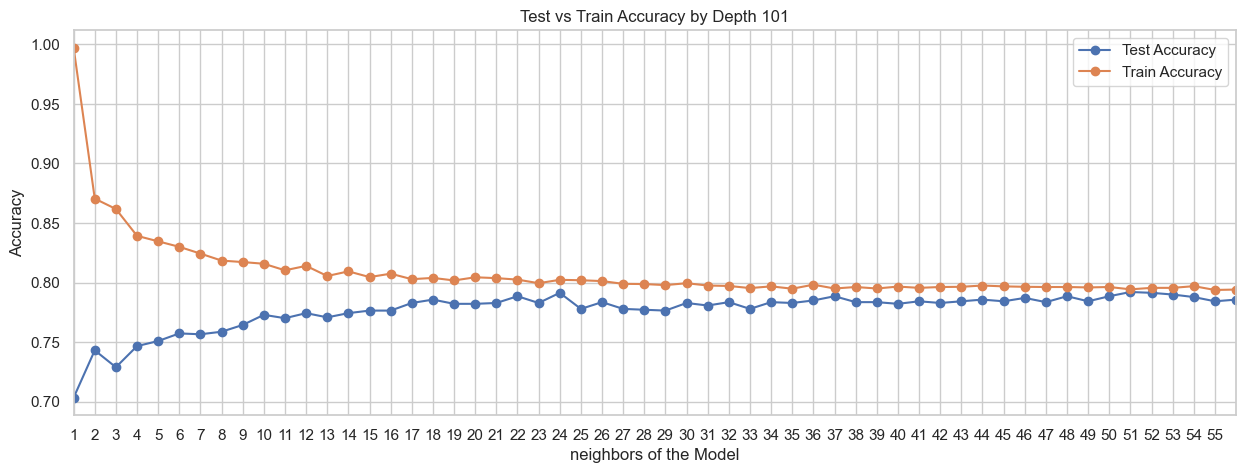

In [294]:
# Knn - visualize the results 


plt.figure(figsize=(15, 5))
plt.plot(data['neighbors'], data['accuracy_test'], label='Test Accuracy', marker='o')
plt.plot(data['neighbors'], data['accuracy_train'], label='Train Accuracy', marker='o')
plt.title(f'Test vs Train Accuracy by Depth {MaxNeighbors-1}')
plt.xlabel('neighbors of the Model')
plt.ylabel('Accuracy')
plt.xlim(1,max_neighbors+5)
plt.xticks(list(range(1,max_neighbors+5,1)))
plt.legend()
plt.grid(True)
plt.show()

## Evaluation + Benchmark


In [295]:
# The benchmark would be the most common label in the train set

y_train.value_counts(normalize=True)
benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark
# Basicly, our benchmark predicts, always 0 (zero) 

test_acc = round(accuracy_score(y_test, y_test_pred_Benchmark),5)
test_acc

0.73882

# 3.1 summary ML Algorithms Best Results

In [296]:
print(f'DecisionTree: accuracy {max_accuracy_DecisionTree}        best_depth: {max_depth_DecisionTree}')
print(f'RandomForest: accuracy: {best_test_accuracy }       Best estimators: {best_n_estimators} best_depth: {best_max_depth}')
print(f'Knn:          accuracy {max_accuracy}         with {max_neighbors} neighbors')
print(f'Benchmark:    accuracy {test_acc}')

DecisionTree: accuracy 0.78495        best_depth: 6
RandomForest: accuracy: 0.80979       Best estimators: 52 best_depth: 10
Knn:          accuracy 0.79205         with 51 neighbors
Benchmark:    accuracy 0.73882


****RandomForest - Feature importances****

In [297]:
Feature_Importances
Feature_Importances.sort_values(by='importance', ascending=False)

feature  importance
2                  totalcharges    0.202464
14      contract_Month-to-month    0.146546
1                monthlycharges    0.137237
10            onlinesecurity_No    0.066686
8   internetservice_Fiber optic    0.054959
13               techsupport_No    0.042986
21          Additional_Services    0.040284
20      PaymentMethod_automatic    0.037864
11              onlinebackup_No    0.031761
16            contract_Two year    0.031582
18           partner_Dependents    0.028667
17         paperlessbilling_Yes    0.025341
19            StreamingServices    0.022712
12          deviceprotection_No    0.021550
15            contract_One year    0.017505
0                 seniorcitizen    0.017248
7           internetservice_DSL    0.017212
6             multiplelines_Yes    0.015986
3                 gender_Female    0.013549
4                   gender_Male    0.013380
9            internetservice_No    0.009348
5              phoneservice_Yes    0.005133

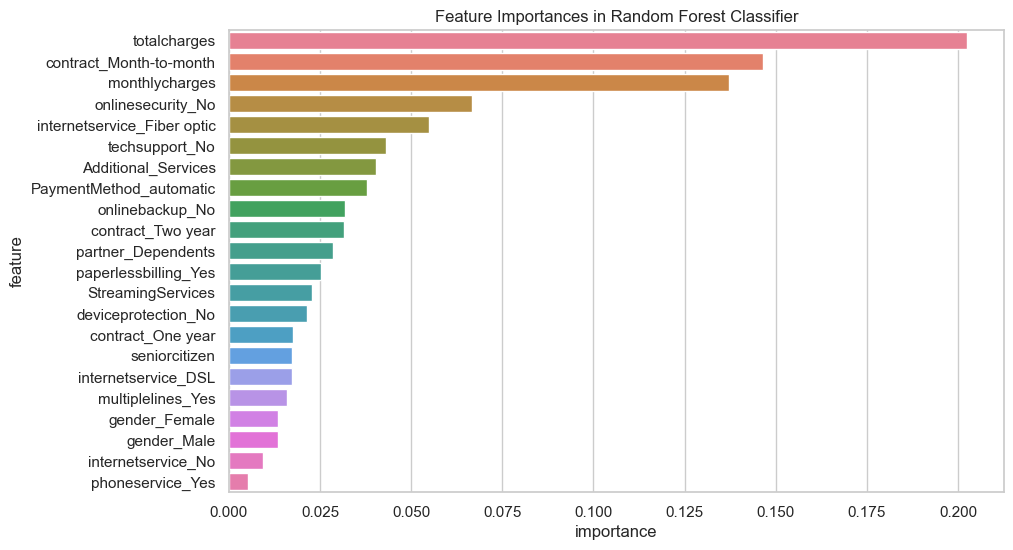

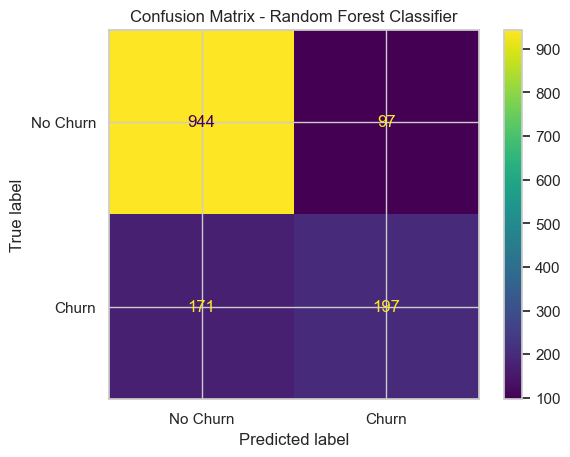

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Create a DataFrame for visualization

df=Feature_Importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=df,hue='feature', dodge=False)
plt.title('Feature Importances in Random Forest Classifier')
plt.show()

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred_RandomForest)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Churn', 'Churn'])

# Plot confusion matrix
cmd.plot()
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

